# Optimizing Retail Strategy: Evaluating Forecasting Models and Clustering Algorithms for Enhanced Insights and Decision-Making.

Ladringan, Christine Love L. | 10 February 2024

# INTRODUCTION


The retail industry is expected to continue to grow in the coming years, driven by factors such as population growth and the rise of ecommerce. However, as the industry rises, so is the need for a strategic supply management and efficient clustering approach to handle the increasing number of customers with different needs, preferences, behaviors, and characteristics. Accurately forecasting sales becomes vital in this industry, necessitating the utilization of advanced analytics and predictive modeling techniques to anticipate demand fluctuations and optimize inventory levels. Concurrently, conducting comprehensive customer segmentation becomes critical for retailers to adapt to evolving consumer expectations. However, the challenge lies in selecting an appropriate forecasting model for a large number of time series and suitable customer segmentation approach in the retail sector. Therefore, this project aims to evaluating forecasting models and clustering algorithms. Specifically, it aims to: (1) Compare and Autoregressive Integrated Moving Average (ARIMA) and Seasonal ARIMA (SARIMA) to forecast sales in the next years using various error metrics; (2) Examine K-Means and Hiearchical Clustering in segmenting retail customers based on Recency, Frequency and Monetary (RFM) using different evaluation metrics. This project is expected to aid retail industry in their data-driven approaches and help them in their strategy optimization.

***

# METHODOLOGY

The image below displays the framework of this project.

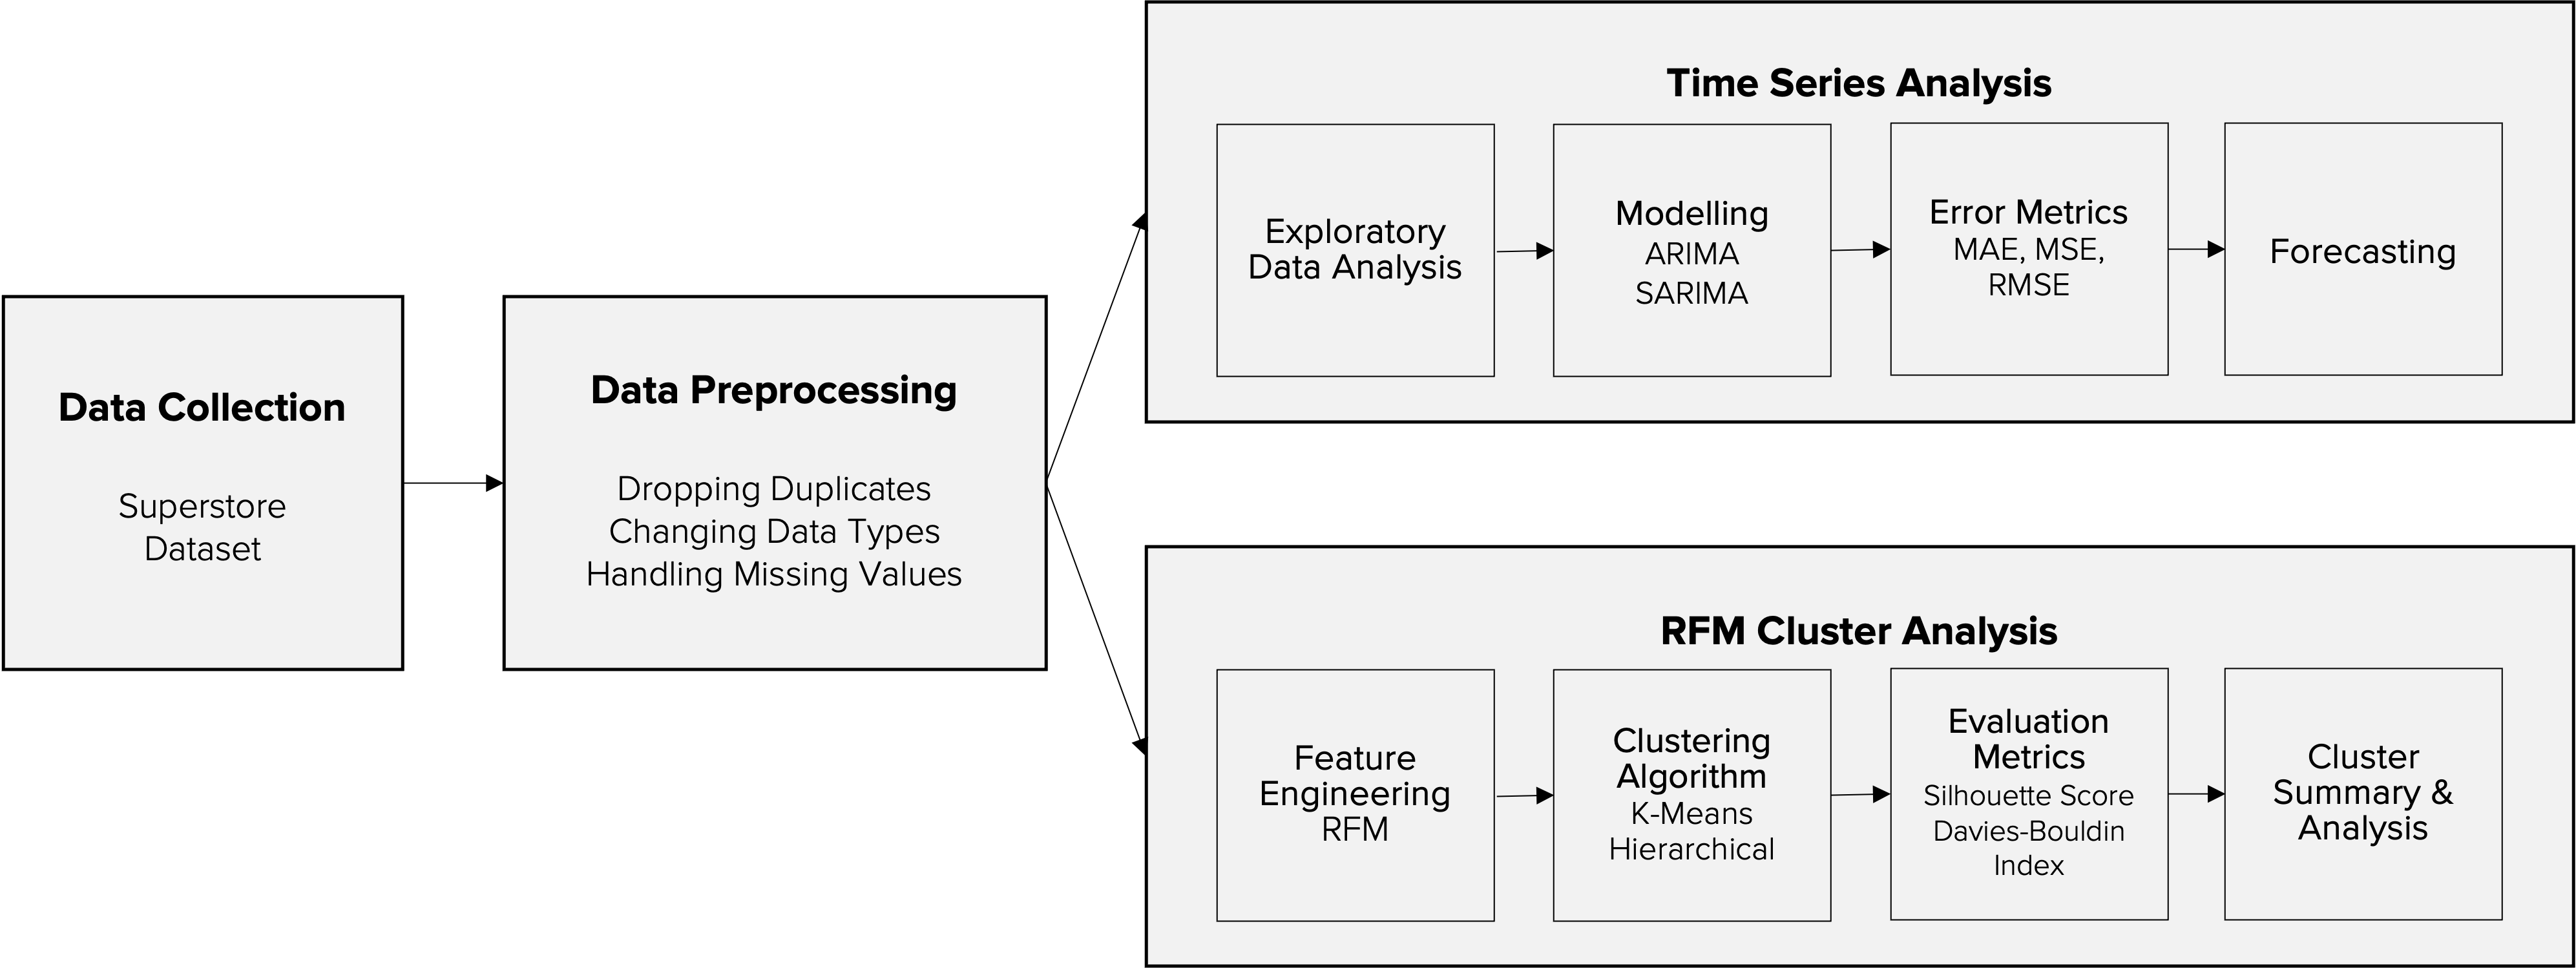

***

In [1]:
# Importing necessary librarires

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# A. Data Collection

The dataset used in this study is the Superstore Sales dataset available at Kaggle (Sahoo, 2021). It contains information on 9800 sales transactions for about 4 years from a retail superstore. It involves columns such as Order Id, Customer ID, Product ID, and Sales. In this project, this dataset was applied for time series and RFM clustering analysis to help provide valuable insights into retail sales dynamics and customer behavior. This enables the business to make data-driven decisions and optimize their strategies for improved performance and profitability.

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
df

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9795    SH-19975     Sally Hughsby  Corporate  United States          Chicago   
9796    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9797    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9798    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9799    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   

           State  Postal Code   Region       Product ID         Category  \
0       Kentucky      42420.0    South  FUR-BO-10001798        Furniture   
1       Kentucky      42420.0    South  FUR-CH-10000454        Furniture   
2     California      90036.0     West  OFF-LA-10000240  Office Supplies   
3        Florida      33311.0    South  FUR-TA-10000577        Furniture   
4        Florida      33311.0    South  OFF-ST-10000760  Office Supplies   
...          ...          ...      ...              ...              ...   
9795    Illinois      60610.0  Central  OFF-BI-10003429  Office Supplies   
9796        Ohio      43615.0     East  OFF-AR-10001374  Office Supplies   
9797        Ohio      43615.0     East  TEC-PH-10004977       Technology   
9798        Ohio      43615.0     East  TEC-PH-10000912       Technology   
9799        Ohio      43615.0     East  TEC-AC-10000487       Technology   

     Sub-Category                                       Product Name     Sales  
0       Bookcases                  Bush Somerset Collection Bookcase  261.9600  
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2          Labels  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3          Tables      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4         Storage                     Eldon Fold 'N Roll Cart System   22.3680  
...           ...                                                ...       ...  
9795      Binders  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.7980  
9796          Art           BIC Brite Liner Highlighters, Chisel Tip   10.3680  
9797       Phones                                        GE 30524EE4  235.1880  
9798       Phones           Anker 24W Portable Micro USB Car Charger   26.3760  
9799  Accessories                SanDisk Cruzer 4 GB USB Flash Drive   10.3840  

[9800 rows x 18 columns]

In [4]:
df.shape

(9800, 18)

# B. Data Preprocessing

Prior to conducting any analysis, the dataset was first preprocessed to prepare the data. Preprocessing techniques such as dropping duplicates, changing data types, and handling missing values were applied. After this, the data was then used for time series and RFM clustering analysis

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
df = df[['Order Date','Order ID', 'Customer ID', 'Sales']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order Date   9800 non-null   object 
 1   Order ID     9800 non-null   object 
 2   Customer ID  9800 non-null   object 
 3   Sales        9800 non-null   float64
dtypes: float64(1), object(3)
memory usage: 306.4+ KB


In [8]:
df.dtypes

Order Date      object
Order ID        object
Customer ID     object
Sales          float64
dtype: object

In [9]:
df = df.copy()
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

In [10]:
df.isna().sum()

Order Date     0
Order ID       0
Customer ID    0
Sales          0
dtype: int64

In [11]:
df[df.duplicated(keep=False)]

Order Date        Order ID Customer ID    Sales
3276 2015-04-05  CA-2015-102988    GM-14695   22.960
3279 2015-04-05  CA-2015-102988    GM-14695   22.960
3405 2015-04-23  US-2015-150119    LB-16795  281.372
3406 2015-04-23  US-2015-150119    LB-16795  281.372

In [12]:
df = df.drop_duplicates(keep='first').reset_index(drop = True)

In [13]:
df.shape

(9798, 4)

# C. Time Series Analysis

Exploratory Data Analysis (EDA) was initially conducted which encompasses plotting the time series data, performing time series decomposition, and examining autocorrelation and partial autocorrelation functions (ACF and PACF plots). These techniques aid to understand the structure of the data and guide model selection. The autoregressive term of the ARIMA can be estimated from the PACF plot while its moving average term, can be approximated from the ACF plot. For modelling, the ARIMA and SARIMA models were utilized. ARIMA models capture the autocorrelation in the data while SARIMA extends ARIMA to account for seasonal patterns. Error metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) are then used to evaluate the performance of the models. The better model between the two was used for forecasting, projecting sales data for the next four years.

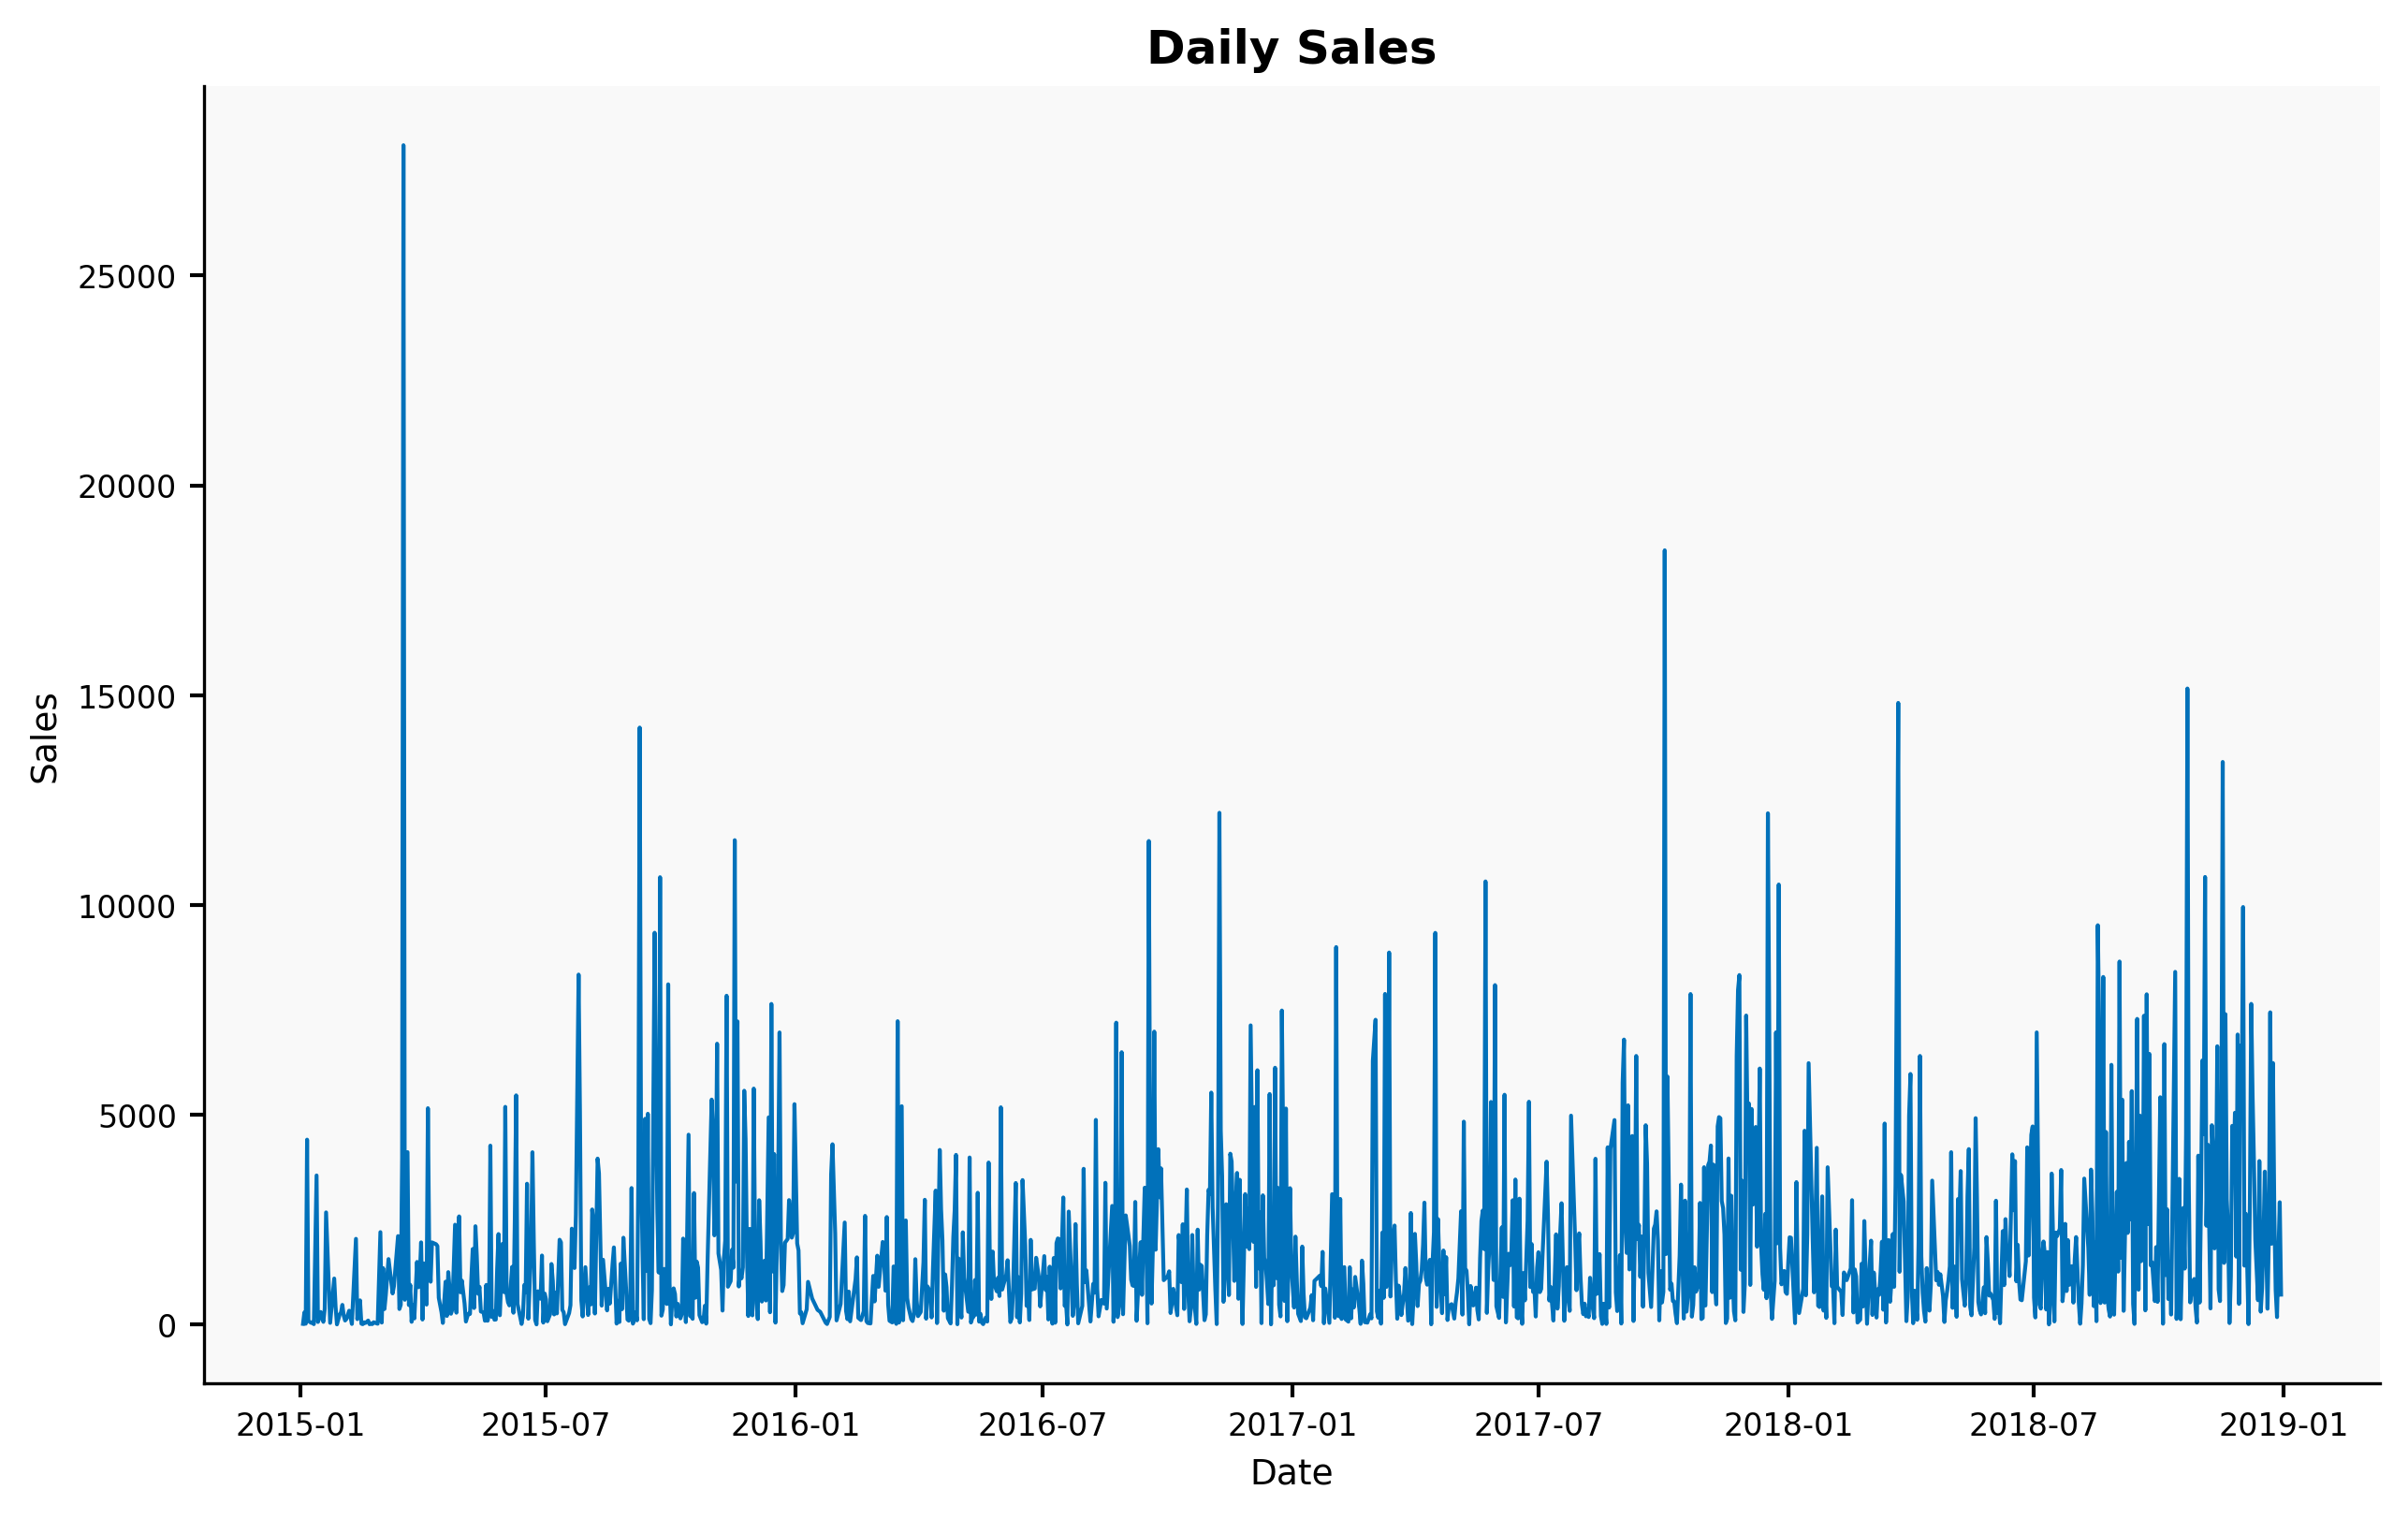

In [14]:
def plot_daily(df):
    df = pd.DataFrame(df.groupby('Order Date').sum()['Sales'].reset_index())
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    sns.lineplot(data=df, x=df['Order Date'], y=df['Sales'], color='#0171BA', ax=ax, linewidth=1)

    sns.despine(top=True, right=True, left=False, bottom=False)
    ax.set_title('Daily Sales', fontweight='bold')
    ax.set_xlabel('Date', fontsize = 9)
    ax.set_ylabel('Sales', fontsize = 9)
    
    ax.tick_params(axis='x', width=1)
    ax.tick_params(axis='y', width=1)
    ax.tick_params(axis='both', colors='black', labelsize=8)
    ax.set_facecolor('#F9F9F9')
    
    plt.show()
    
plot_daily(df)

In [15]:
df_ts = df.copy()

In [16]:
df_ts['Year Month'] = df_ts['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

df_timeseries = pd.DataFrame(df_ts.groupby('Year Month').sum()['Sales'].reset_index())
df_timeseries.set_index('Year Month', inplace=True)

In [17]:
df_timeseries.index = pd.to_datetime(df_timeseries.index, format='%Y-%m')

In [18]:
df_timeseries.head(10)

Sales
Year Month            
2015-01-01  14205.7070
2015-02-01   4519.8920
2015-03-01  55205.7970
2015-04-01  27602.5230
2015-05-01  23644.3030
2015-06-01  34322.9356
2015-07-01  33781.5430
2015-08-01  27117.5365
2015-09-01  81623.5268
2015-10-01  31453.3930

## Exploratory Data Analysis

In [19]:
def plot_monthly(df):
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    sns.lineplot(data=df, x=df.index, y='Sales', color='#0171BA', ax=ax, linewidth=2)

    sns.despine(top=True, right=True, left=False, bottom=False)
    ax.set_title('Monthly Sales', fontweight='bold')
    ax.set_xlabel('Date', fontsize = 9)
    ax.set_ylabel('Sales', fontsize = 9)
    ax.grid(True, color='#DFDFDF', linewidth=0.5)
    
    ax.tick_params(axis='x', width=1)
    ax.tick_params(axis='y', width=1)
    ax.tick_params(axis='both', colors='black', labelsize=8)
    ax.set_facecolor('#F9F9F9')
    
    plt.show()

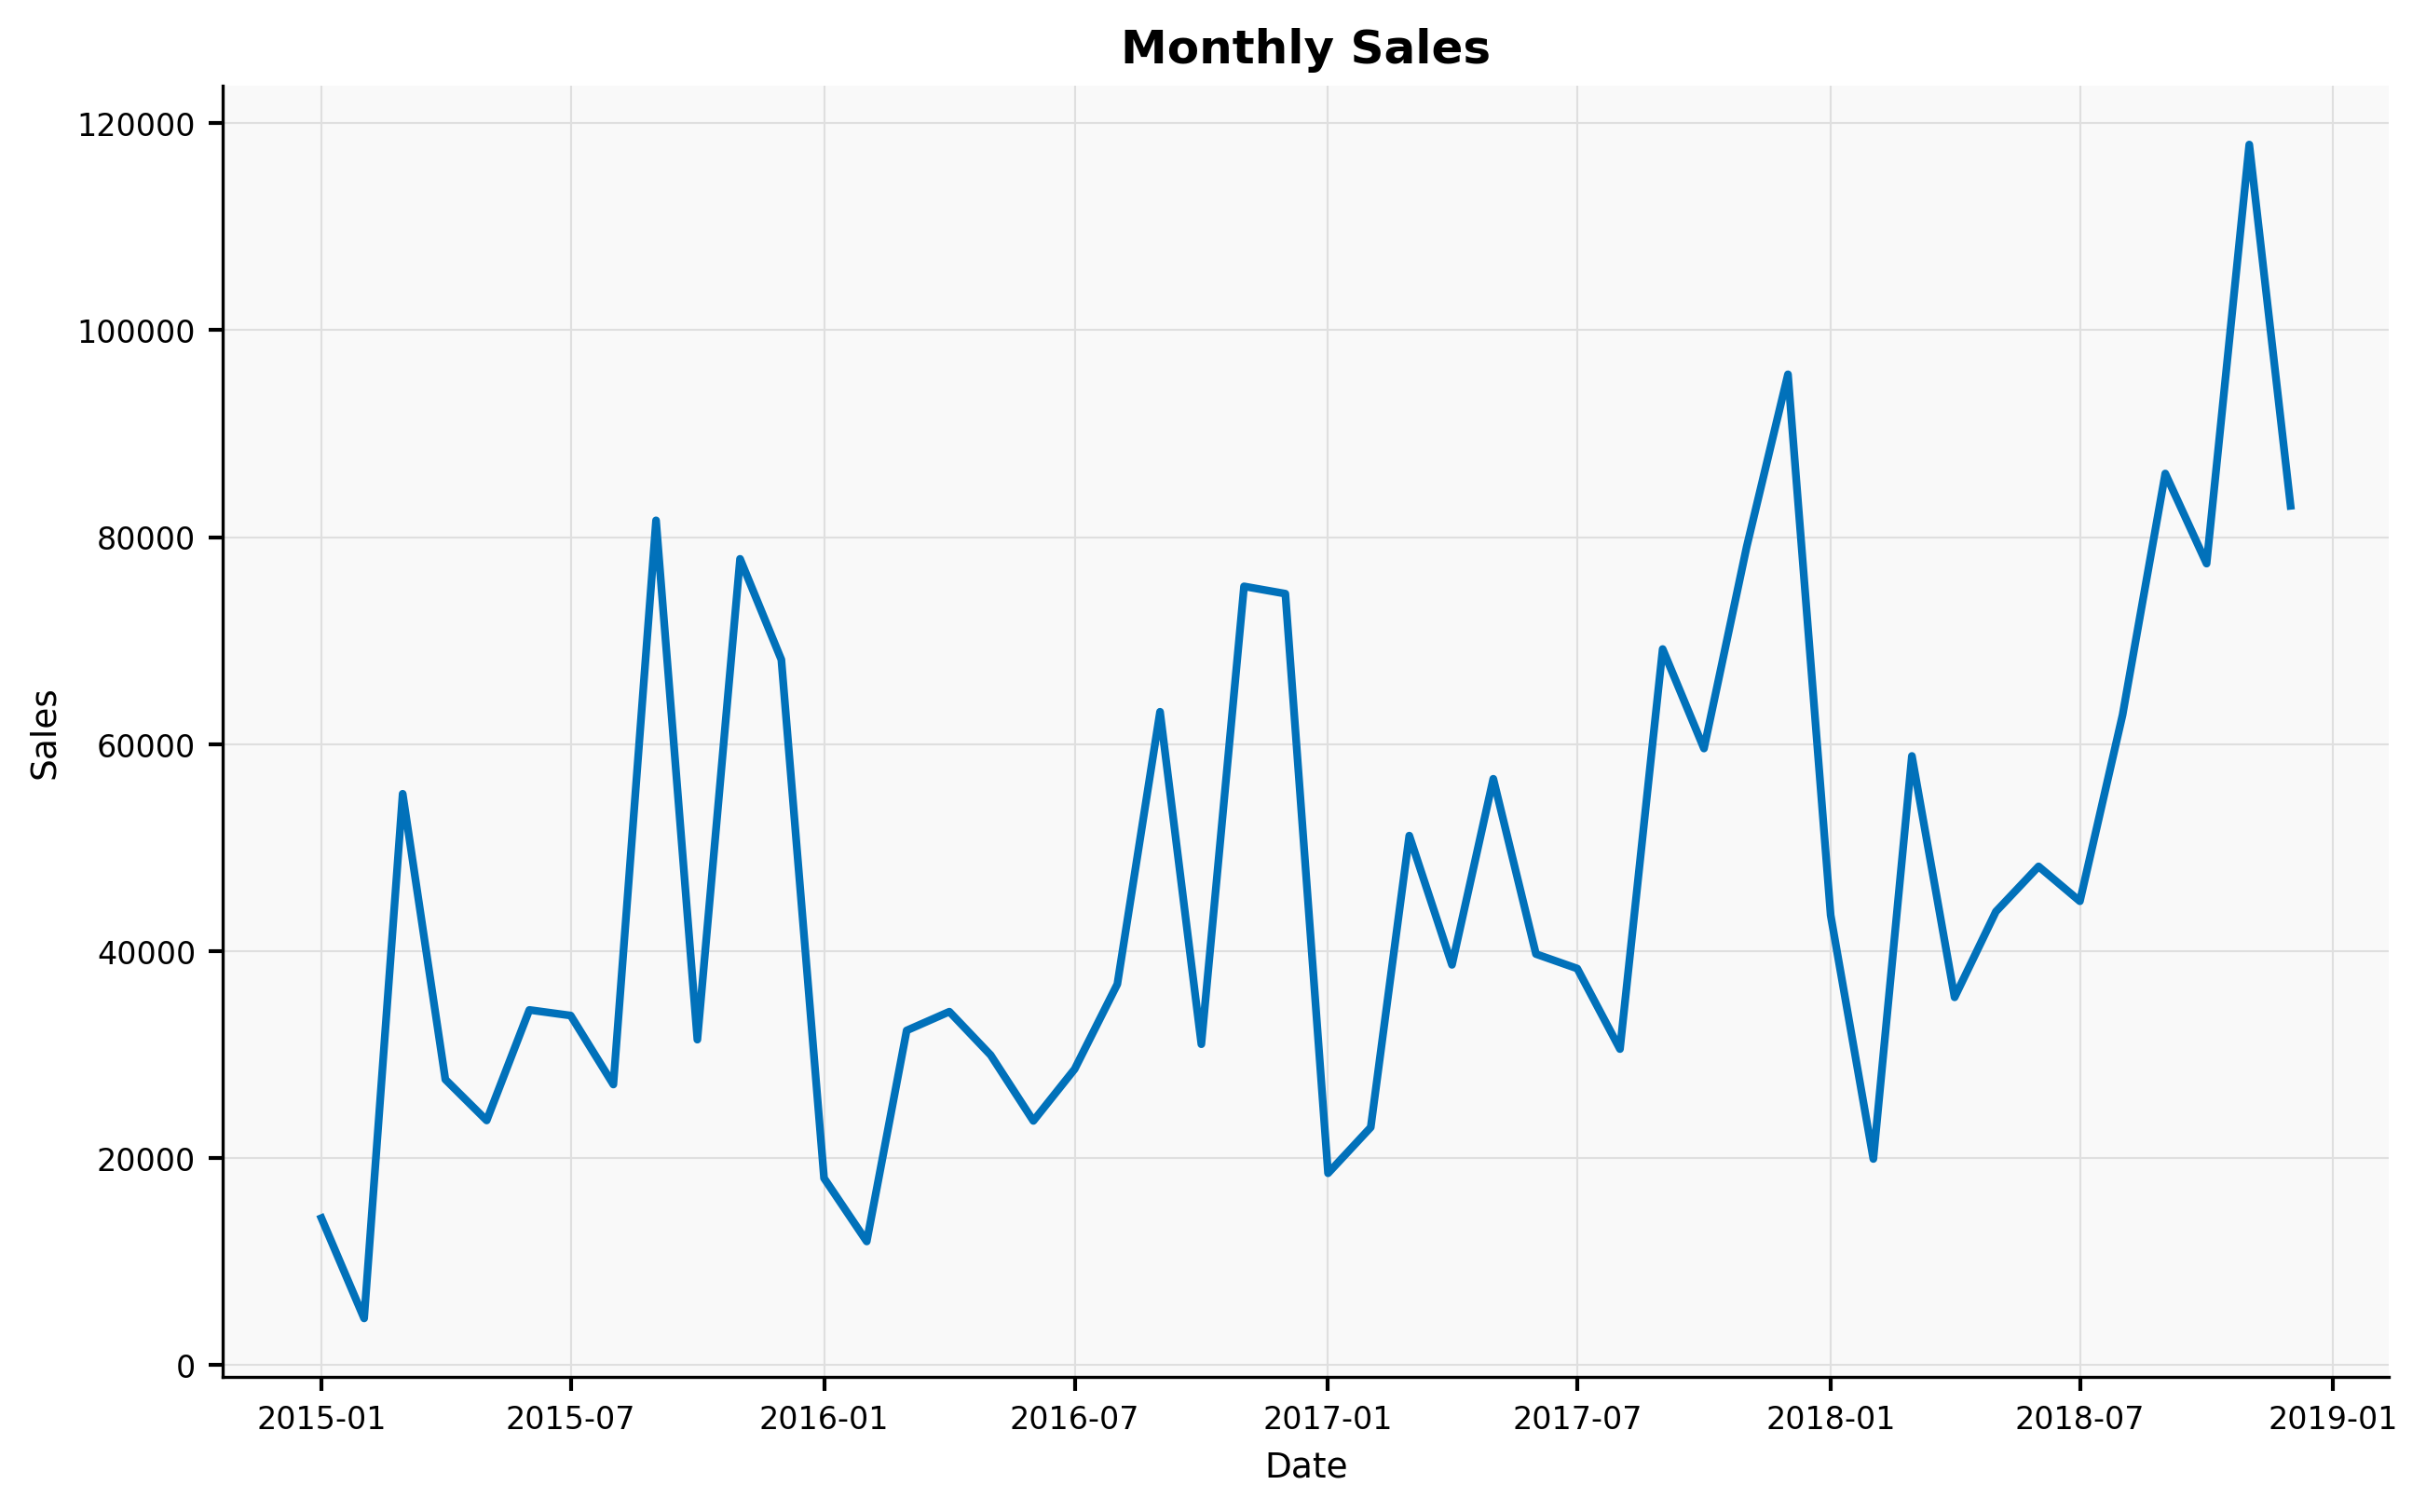

In [20]:
plot_monthly(df_timeseries)

> This represents the monthly sales data from the Superstore dataset over a 4-year period. It can be observed that there is an overall upward trend and significant peaks around August and December of every year. 

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_seasonal_decomposition(df):
    decomposition = seasonal_decompose(df['Sales'], model='additive')
    
    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(10, 6), dpi=300, frameon=False)
    axes = axes.flatten()
    
    # Plot each component
    for i, (component, label) in enumerate(zip([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid], ['Observed', 'Trend', 'Seasonal', 'Residual'])):
        if label == 'Residual':
            axes[i].scatter(component.index, component, color='#0171BA', s=20)
            axes[i].axhline(y=0, color='black', linestyle='--', linewidth=1)  # Add horizontal line at 0
        else:
            component.plot(ax=axes[i], color='#0171BA', linewidth=2)
            axes[i].grid(True, color='#DFDFDF', linewidth=0.5)
        
        sns.despine(ax=axes[i], top=True, right=True, left=False, bottom=False)
        axes[i].set_title(label, fontsize=11, fontweight='bold')
        axes[i].tick_params(axis='both', labelsize=6)
        axes[i].set_ylabel(label, fontsize=9)
        axes[i].set_facecolor('#F9F9F9')
        
    fig.patch.set_visible(False)
    plt.tight_layout()
    plt.suptitle('Seasonal Decomposition', fontsize=14, fontweight='bold', y=1.05)
    plt.show()


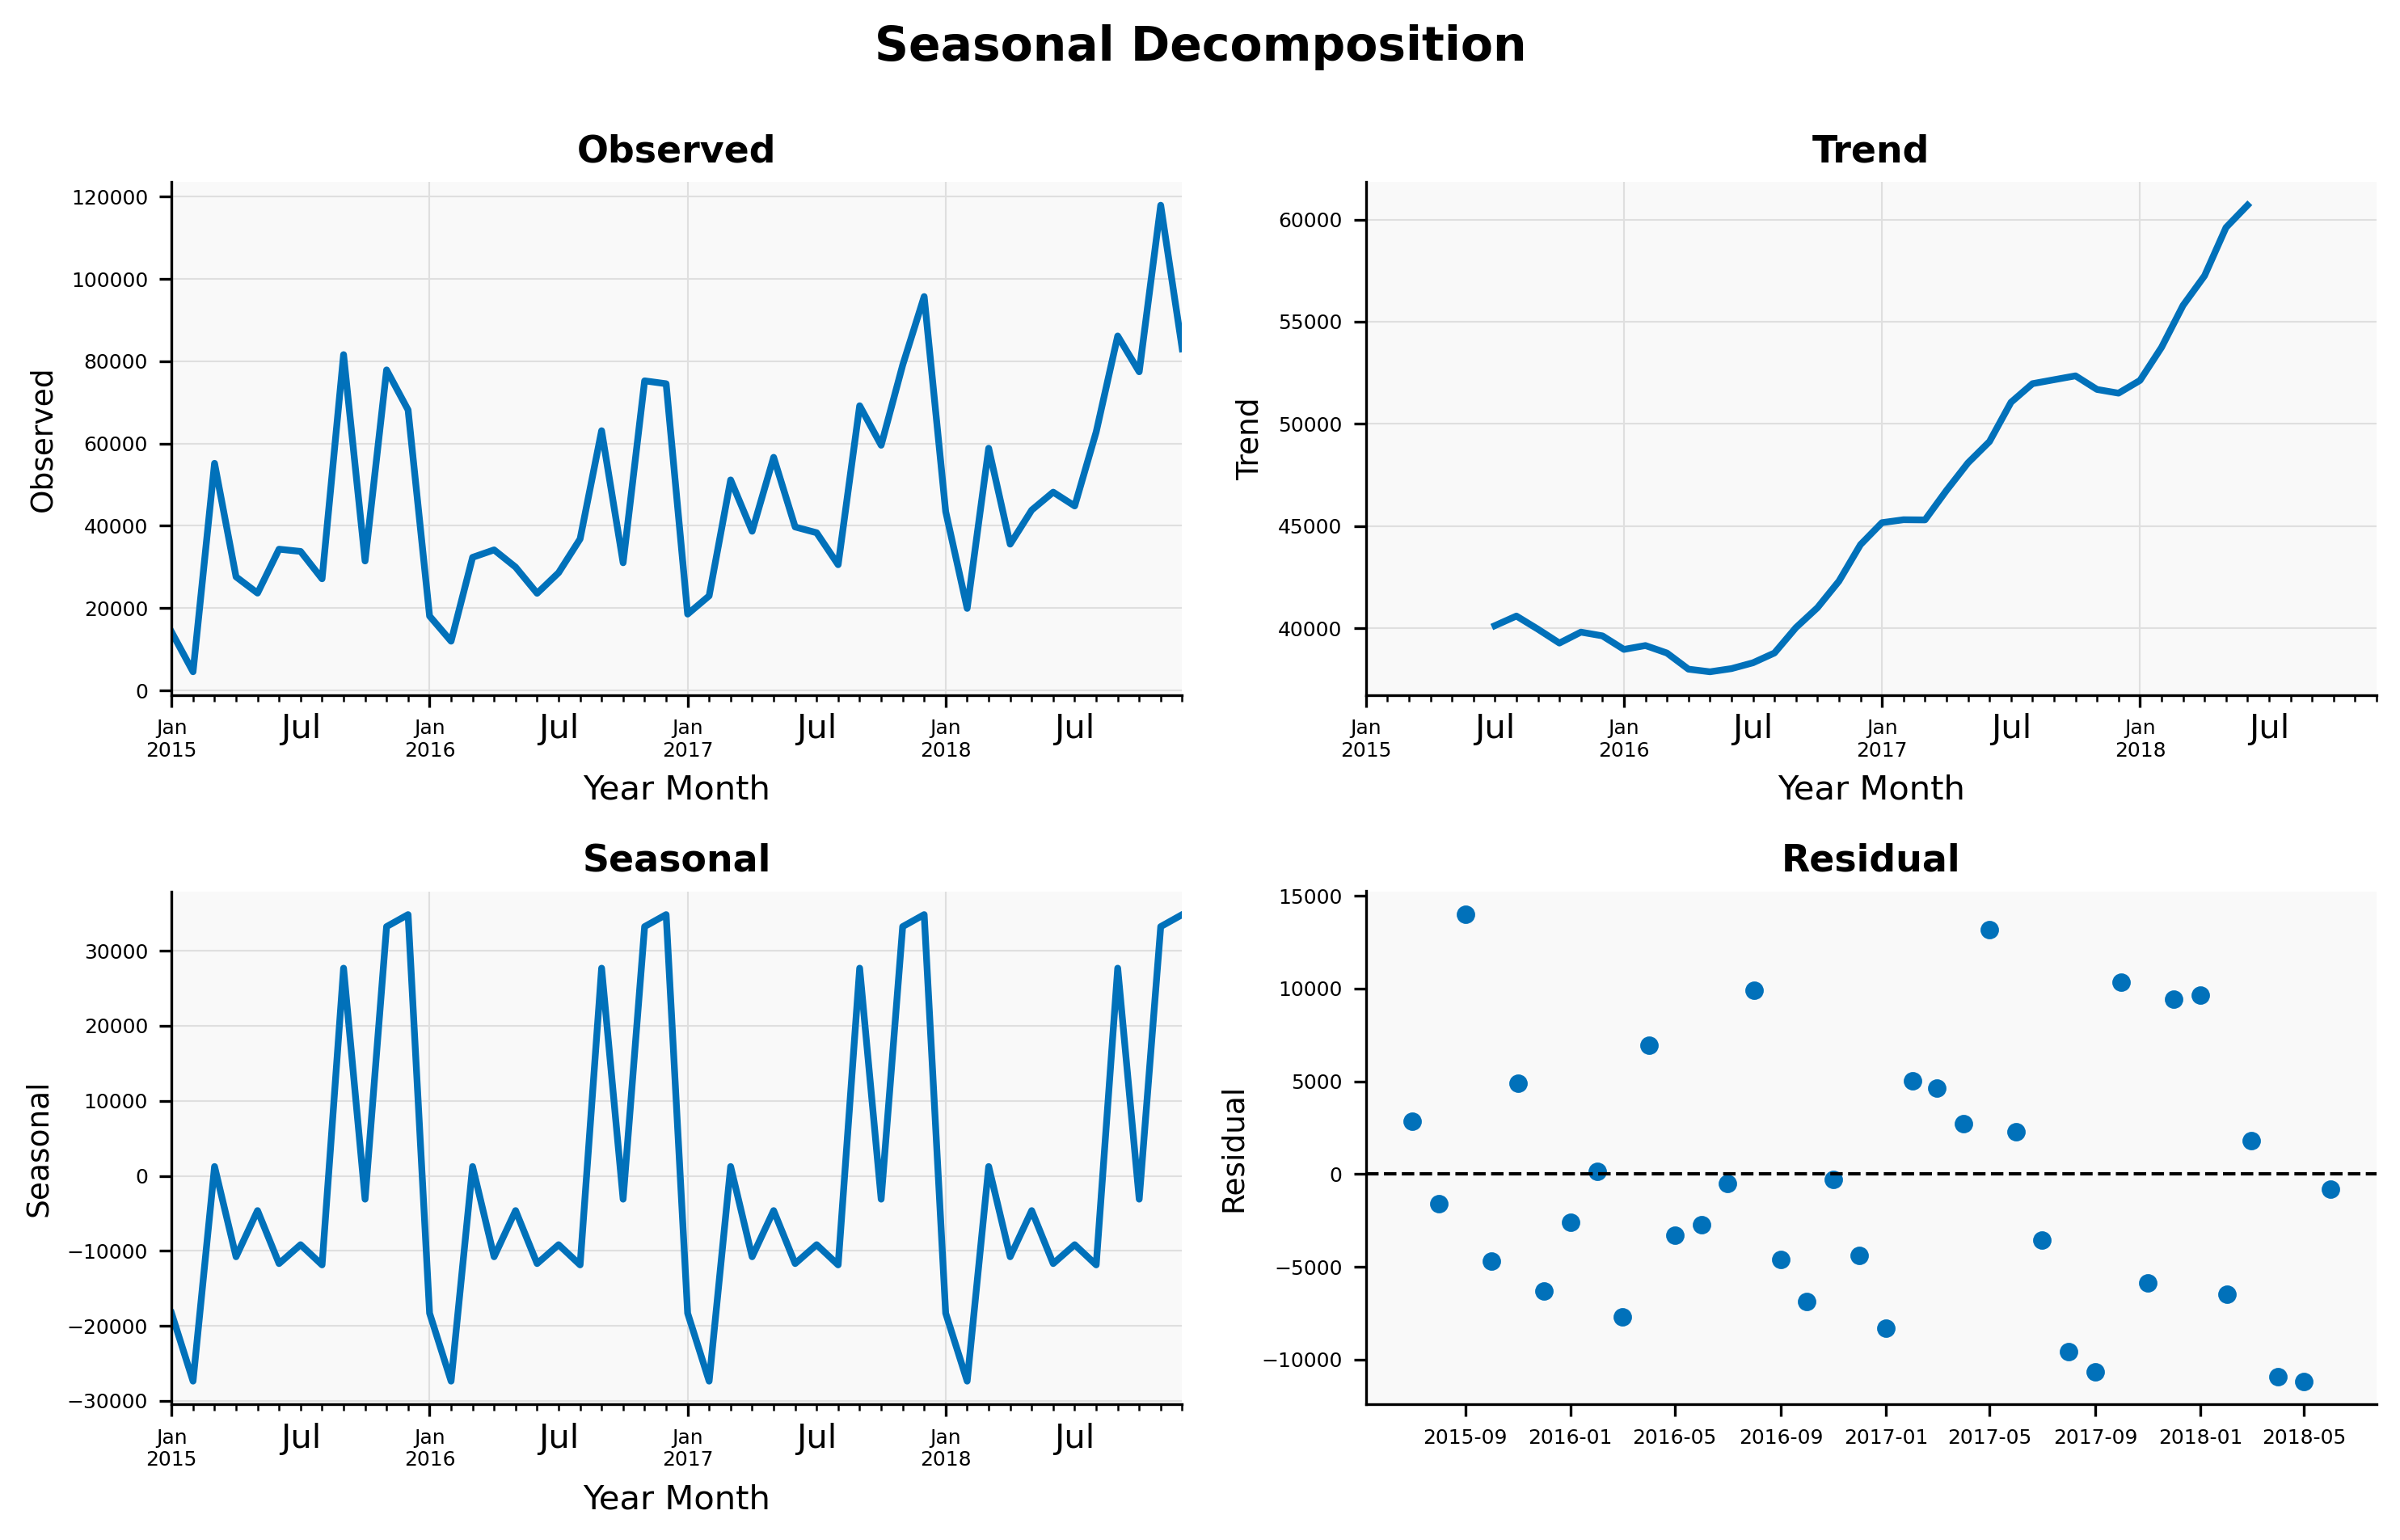

In [22]:
plot_seasonal_decomposition(df_timeseries)

> The plot above can be used to validate the initial observations as it decomposes the time series. By decomposing the data, an increasing trend is evident with seasonal graph revealing consistent oscillations. The residual graph is centered around zero, suggesting that most of the variations in the data can be explained by the trend and seasonality.

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.collections import PolyCollection

def plot_acf_pacf(data, lags=20):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), dpi=300)

    plot_acf(data, ax=ax1, lags=lags, color='#0171BA', vlines_kwargs={"colors": '#0171BA'})
    for item in ax1.collections:
        if isinstance(item, PolyCollection):
            item.set_facecolor('#0171BA')  
    ax1.set_title('AutoCorrelation Function (ACF)', fontweight='bold')
    sns.despine(ax=ax1, top=True, right=True, left=False, bottom=False)
    ax1.set_facecolor('#F9F9F9')
    
    plot_pacf(data, ax=ax2, lags=lags, method='ywm', color='#0171BA', vlines_kwargs={"colors": '#0171BA'})
    for item in ax2.collections:
        if isinstance(item, PolyCollection):
            item.set_facecolor('#0171BA')  
    ax2.set_title('Partial AutoCorrelation Function (PACF)', fontweight='bold')
    sns.despine(ax=ax2, top=True, right=True, left=False, bottom=False)
    ax2.set_facecolor('#F9F9F9')
    
    plt.tight_layout()
    plt.show()

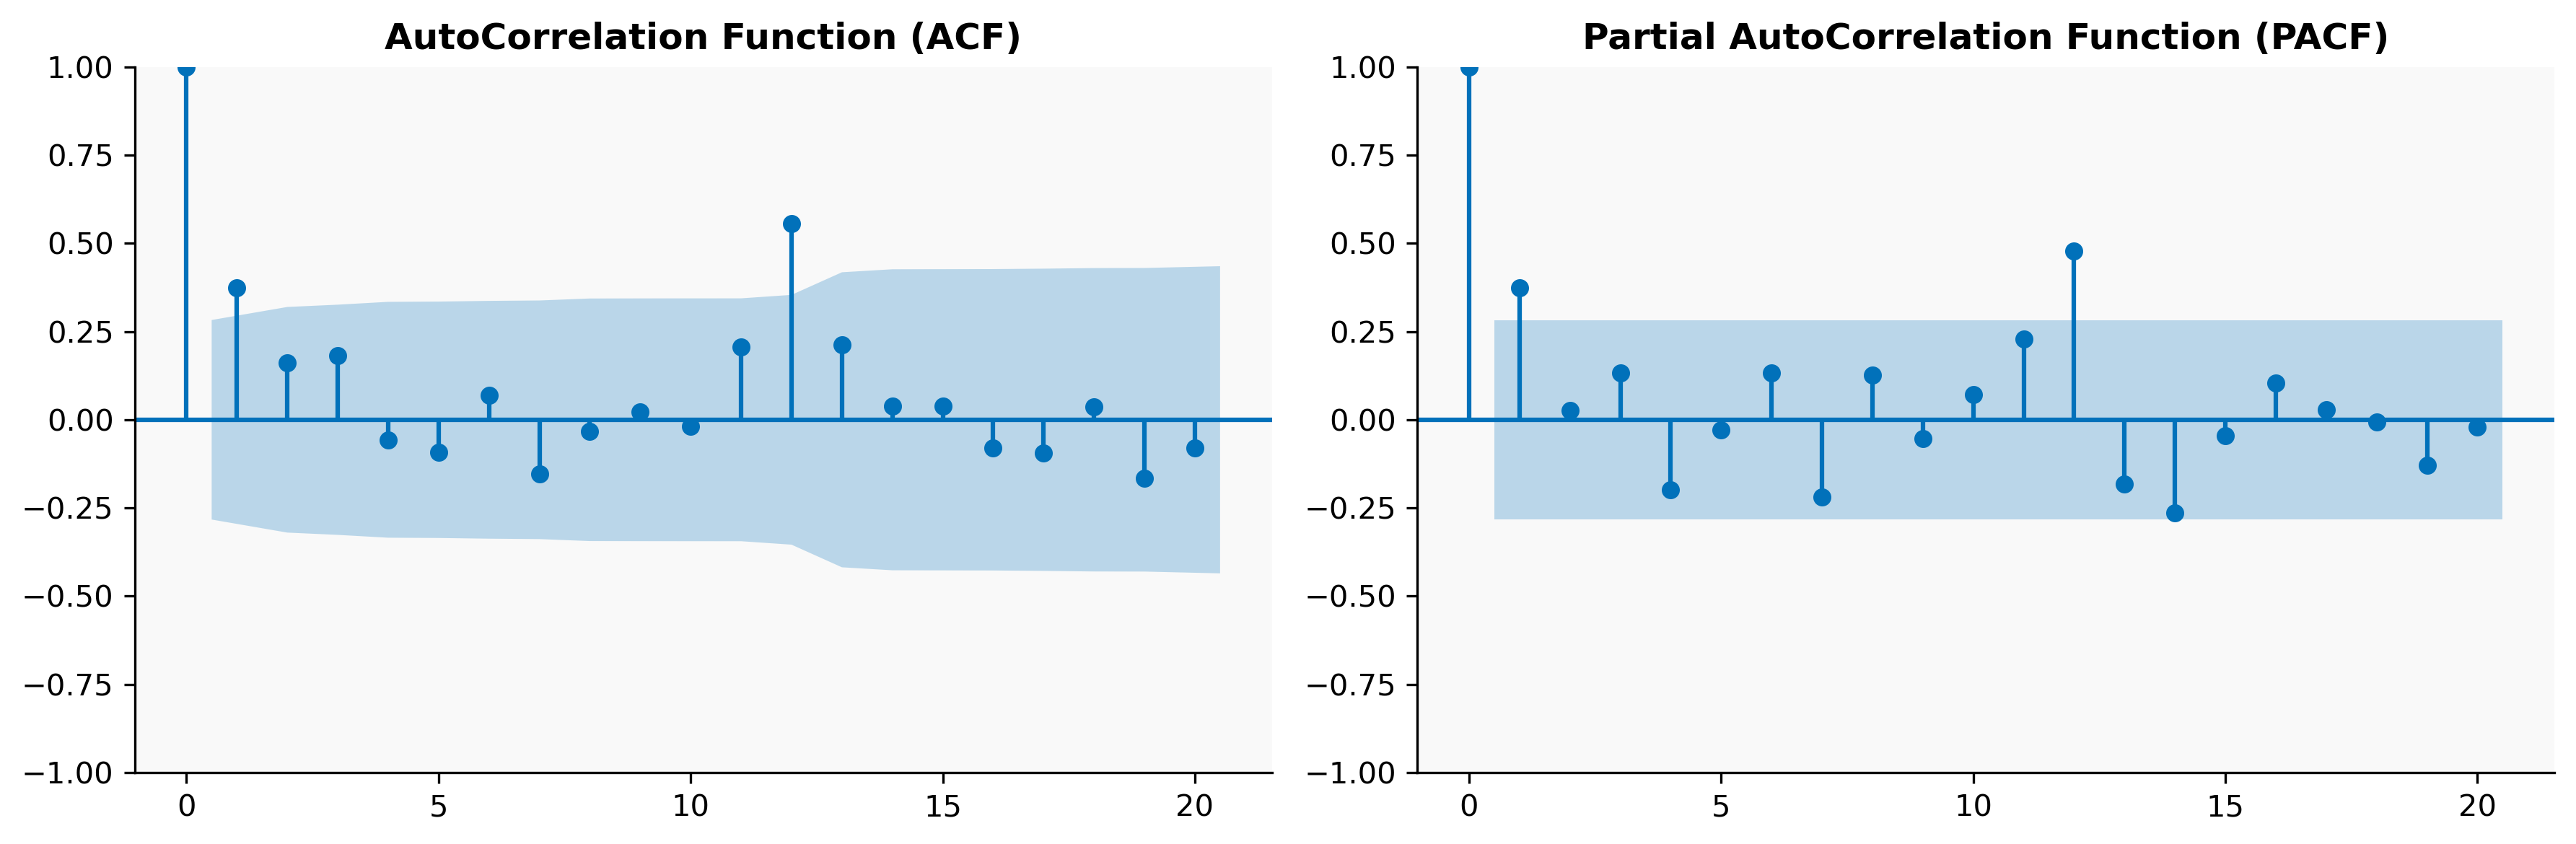

In [24]:
plot_acf_pacf(df_timeseries['Sales'])

> To identify the appropriate model and parameters, the plots presented in Figure 4 can be utilized. From both plots, it is evident that there is a significant pike at lag 1 suggesting that p=1 and q=1. Nonetheless, these are only initial estimates and may need refinement.

## Modelling

## a. ARIMA Model

In [25]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(df_timeseries[1:], seasonal=False)
arima_model.fit(df_timeseries[1:])
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   47
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -528.970
Date:                Sat, 10 Feb 2024   AIC                           1061.941
Time:                        16:59:01   BIC                           1065.598
Sample:                    02-01-2015   HQIC                          1063.311
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6503      0.123     -5.273      0.000      -0.892      -0.409
sigma2      5.912e+08   1.04e-13   5.69e+21      0.000    5.91e+08    5.91e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.72   Prob(JB):                         0.92
Heteroskedasticity (H):               0.93   Skew:                             0.00
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

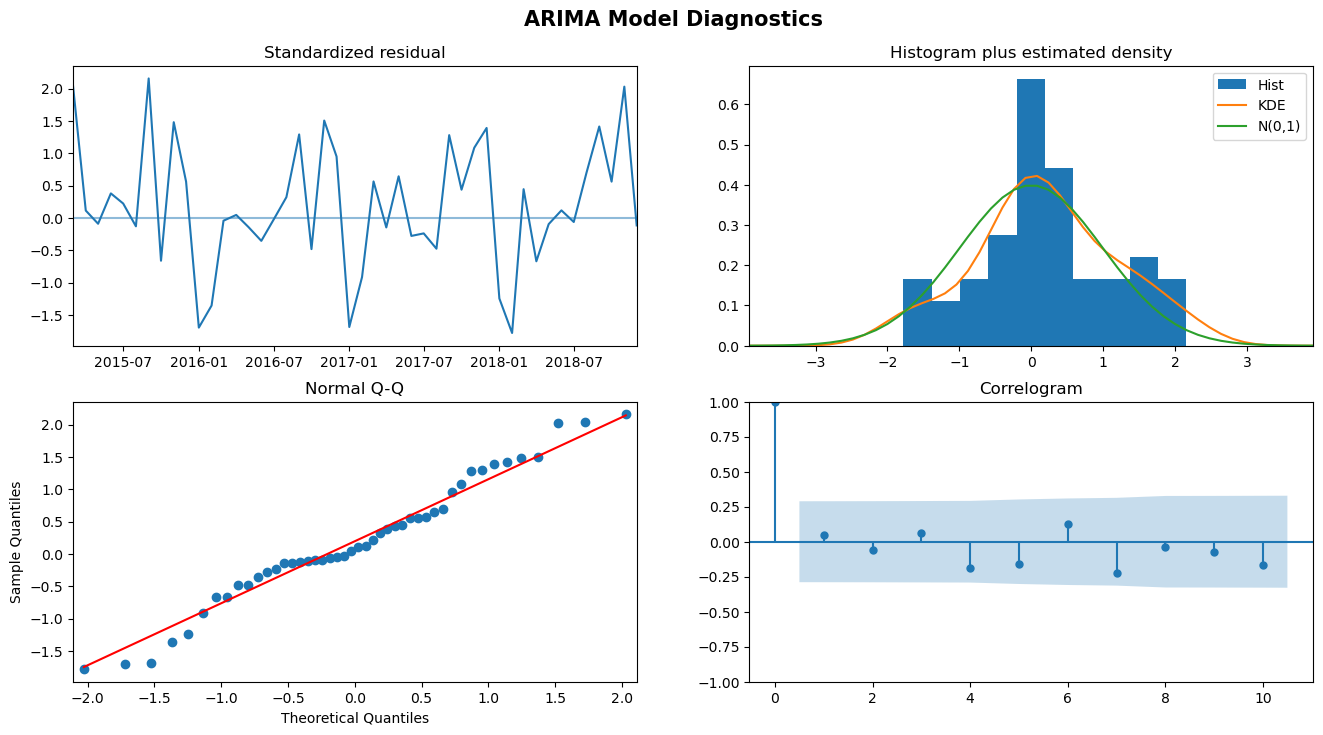

In [26]:
arima_model.plot_diagnostics(figsize=(16, 8))
plt.suptitle('ARIMA Model Diagnostics', fontweight='bold', y=0.95, fontsize = 15)
plt.show()

In [27]:
start_date = '2018-01-01'
end_date = '2019-01-01'
def plot_fitted(df, model, title, label, color):
    pred = model.predict(n_periods=len(df[start_date:end_date]), return_conf_int=True)
    
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    sns.despine(top=True, right=True, left=False, bottom=False)

    sns.lineplot(data=df_timeseries, x=df_timeseries.index, y='Sales', label='Observed', color='#0171BA', ax=ax, linewidth = 2)
    sns.lineplot(data=df_timeseries[start_date:end_date], x=df_timeseries[start_date:end_date].index, y=pred[0], label=label, color=color, ax=ax, linewidth = 2)
    ax.fill_between(df_timeseries[start_date:end_date].index, pred[1][:, 0], pred[1][:, 1], color=color, alpha=0.2)

    ax.set_xlabel('Year')
    ax.set_ylabel('Sales')
    ax.set_title(title, fontweight = 'bold')
    ax.grid(True, color='#DFDFDF', linewidth=0.5)
    
    ax.tick_params(axis='x', width=1)
    ax.tick_params(axis='y', width=1)
    ax.tick_params(axis='both', colors='black', labelsize=8)
    ax.set_facecolor('#F9F9F9')
    ax.legend()
    
    plt.show()


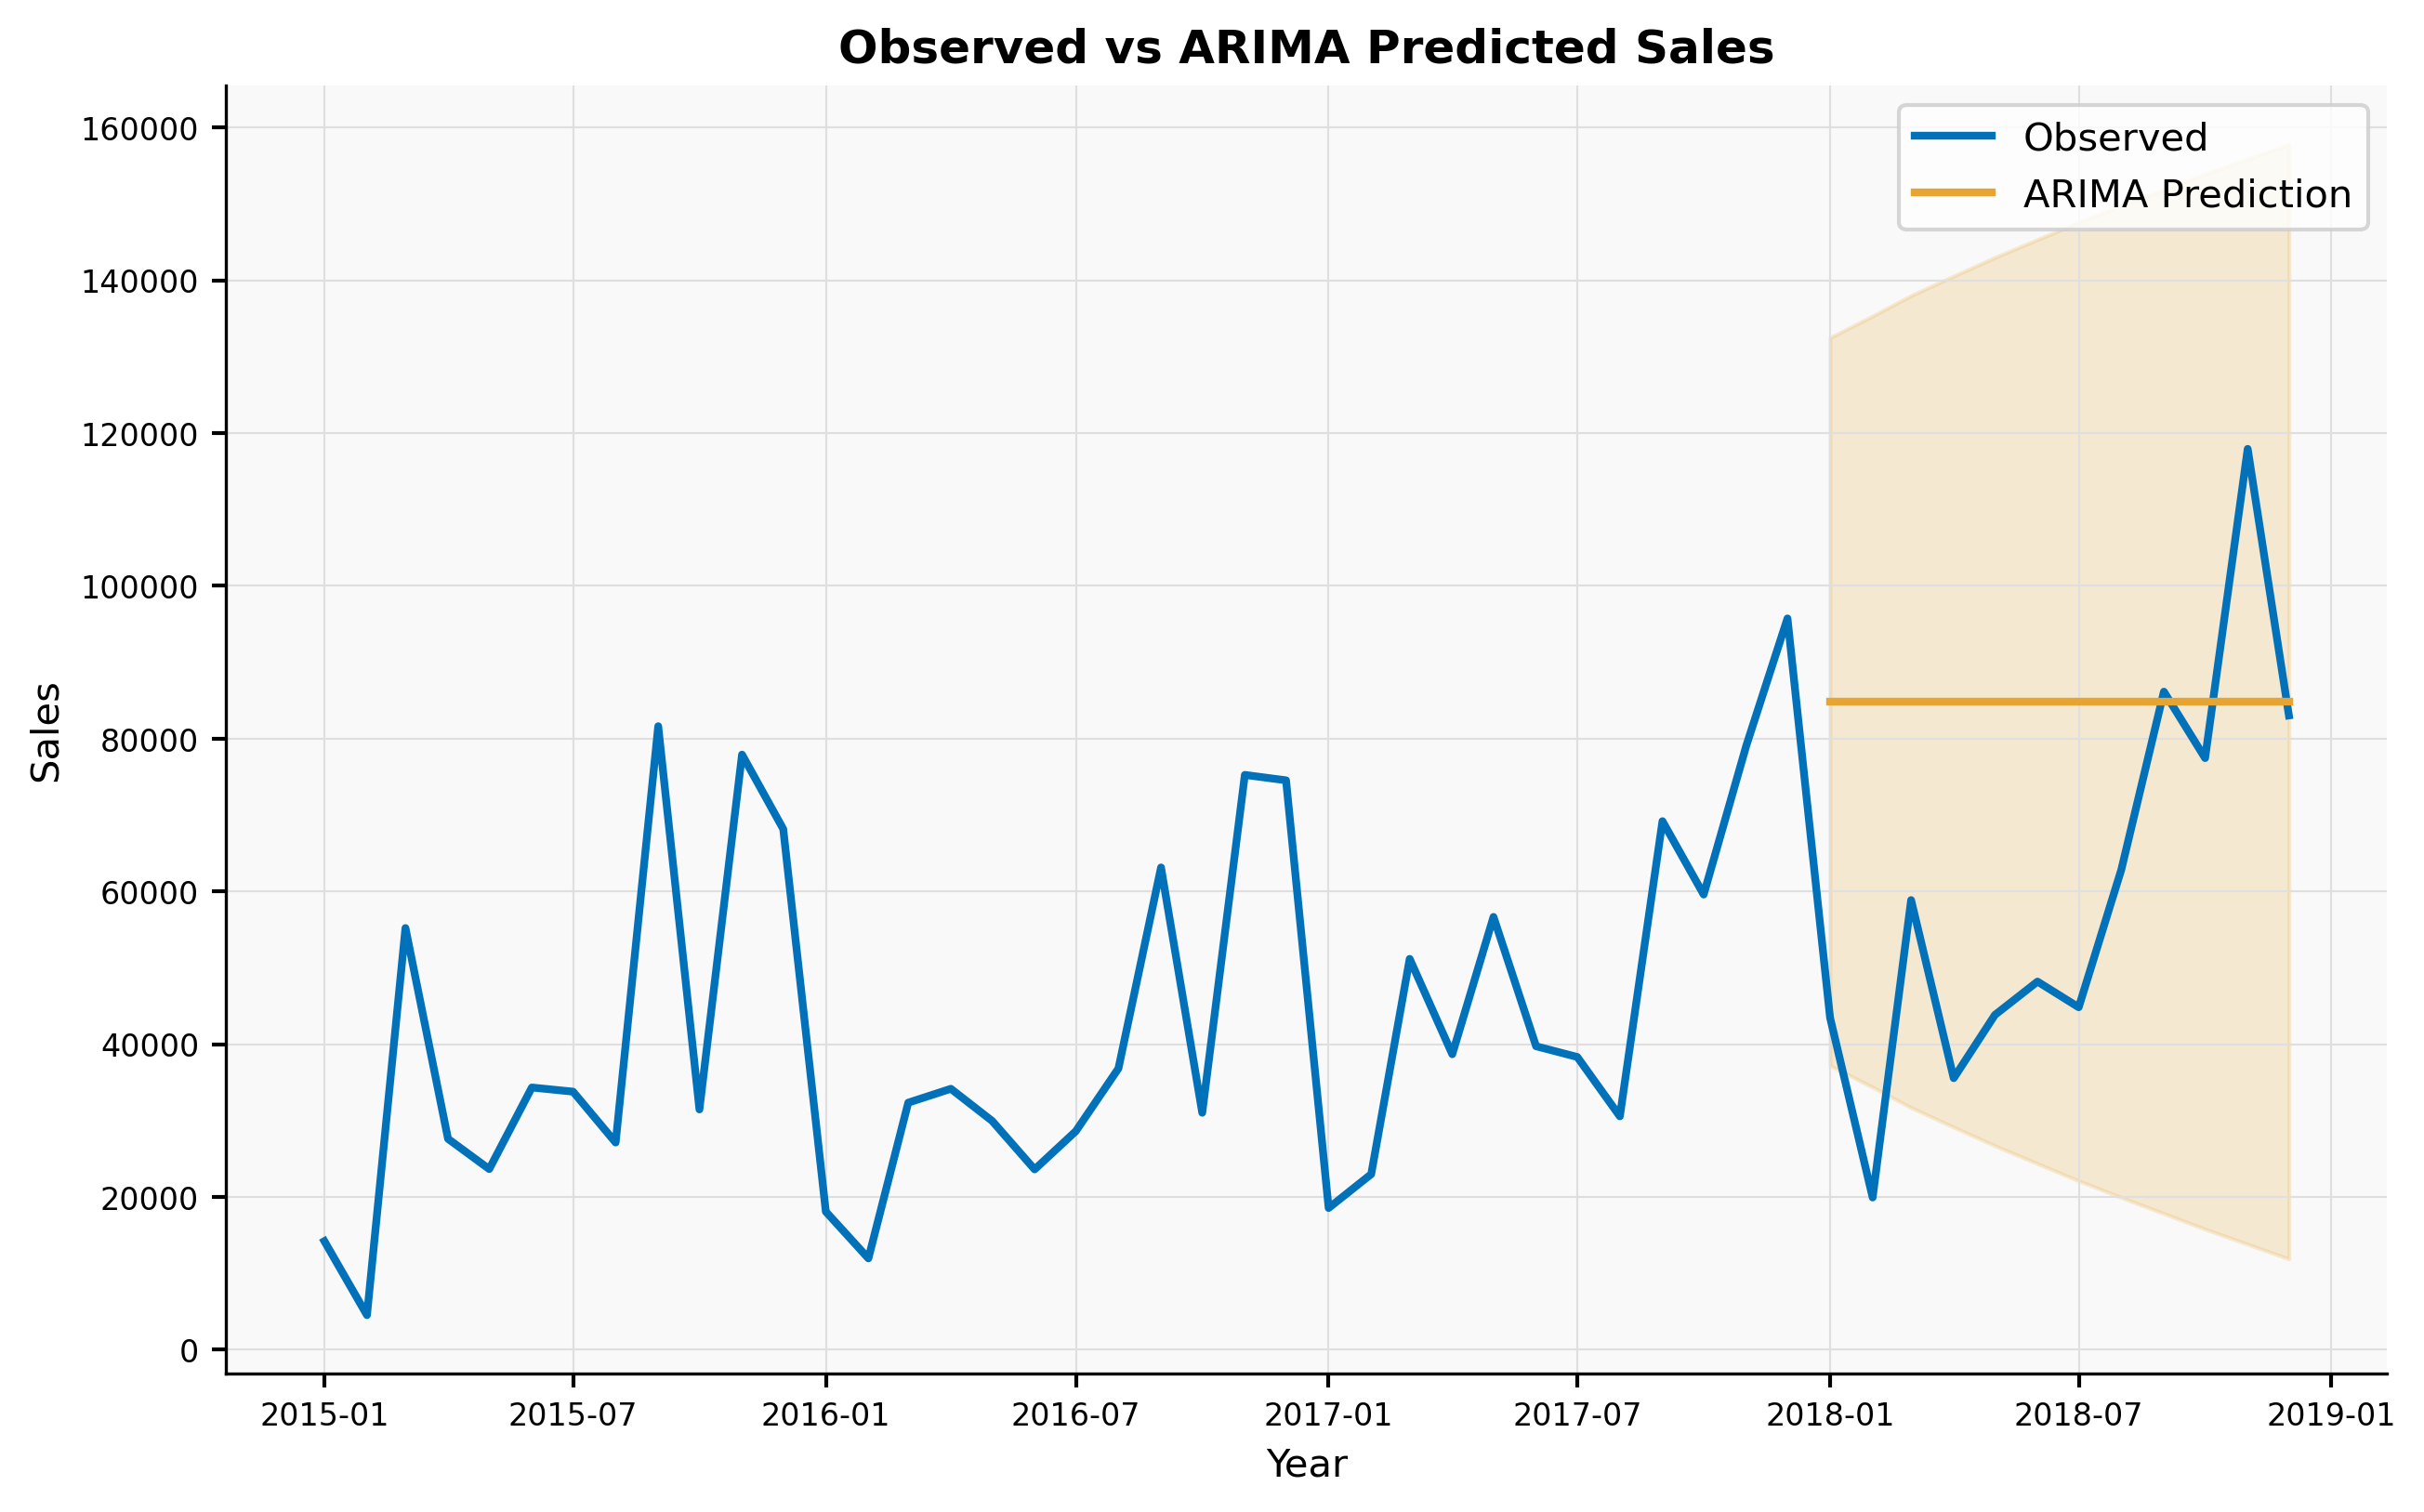

In [28]:
plot_fitted(df_timeseries, arima_model, title = 'Observed vs ARIMA Predicted Sales', 
            label = 'ARIMA Prediction', color = '#E6A532')

> The ARIMA model used in this study is the ARIMA (0,1,1), indicating a non-seasonal differencing of order 1 and a moving average term of order 1. This model was obtained using the Auto ARIMA functionality in Python. The said model has an AIC value of 1061.941 and Log Likelihood of -528.970. The plot above shows that although the ARIMA model prediction does not exactly match the observed sales with its steady predictions, the observed values do fall within the predicted 95% confidence interval.

In [29]:
df_timeseries.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Year Month', freq=None)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def calculate_error_metrics(observed, predicted):
    mae = mean_absolute_error(observed, predicted)
    mse = mean_squared_error(observed, predicted)
    rmse = np.sqrt(mse)
    
    return mae, mse, rmse

observed = df_timeseries[start_date:end_date]['Sales']
predicted_arima = arima_model.predict(n_periods=len(df_timeseries[start_date:end_date]), return_conf_int=True)
mae, mse, rmse = calculate_error_metrics(observed, predicted_arima[0])

print('ARIMA Model Error Metrics\n')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

ARIMA Model Error Metrics

Mean Absolute Error (MAE): 30410.105993656194
Mean Squared Error (MSE): 1275125410.5910919
Root Mean Squared Error (RMSE): 35708.89819906366


## b. SARIMA Model

In [31]:
from pmdarima.arima import auto_arima

sarima_model = auto_arima(df_timeseries[1:], seasonal=True, m=12)
sarima_model.fit(df_timeseries[1:])
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   47
Model:             SARIMAX(1, 0, 3)x(0, 1, [1], 12)   Log Likelihood                -372.681
Date:                              Sat, 10 Feb 2024   AIC                            759.362
Time:                                      16:59:31   BIC                            770.250
Sample:                                  02-01-2015   HQIC                           763.121
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9265.5250   3.14e+05      0.030      0.976   -6.06e+05    6.24e+05
ar.L1          0.1352     29.282      0.005      0.996     -57.256      57.527
ma.L1          0.1577     29.305      0.005      0.996     -57.280      57.595
ma.L2         -0.6104      8.472     -0.072      0.943     -17.216      15.995
ma.L3          0.0720     16.802      0.004      0.997     -32.859      33.003
ma.S.L12      -0.4135      0.143     -2.897      0.004      -0.693      -0.134
sigma2      1.021e+08   2031.982   5.03e+04      0.000    1.02e+08    1.02e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.75
Prob(Q):                              0.79   Prob(JB):                         0.42
Heteroskedasticity (H):               2.93   Skew:                             0.54
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.11e+20. Standard errors may be unstable.
"""

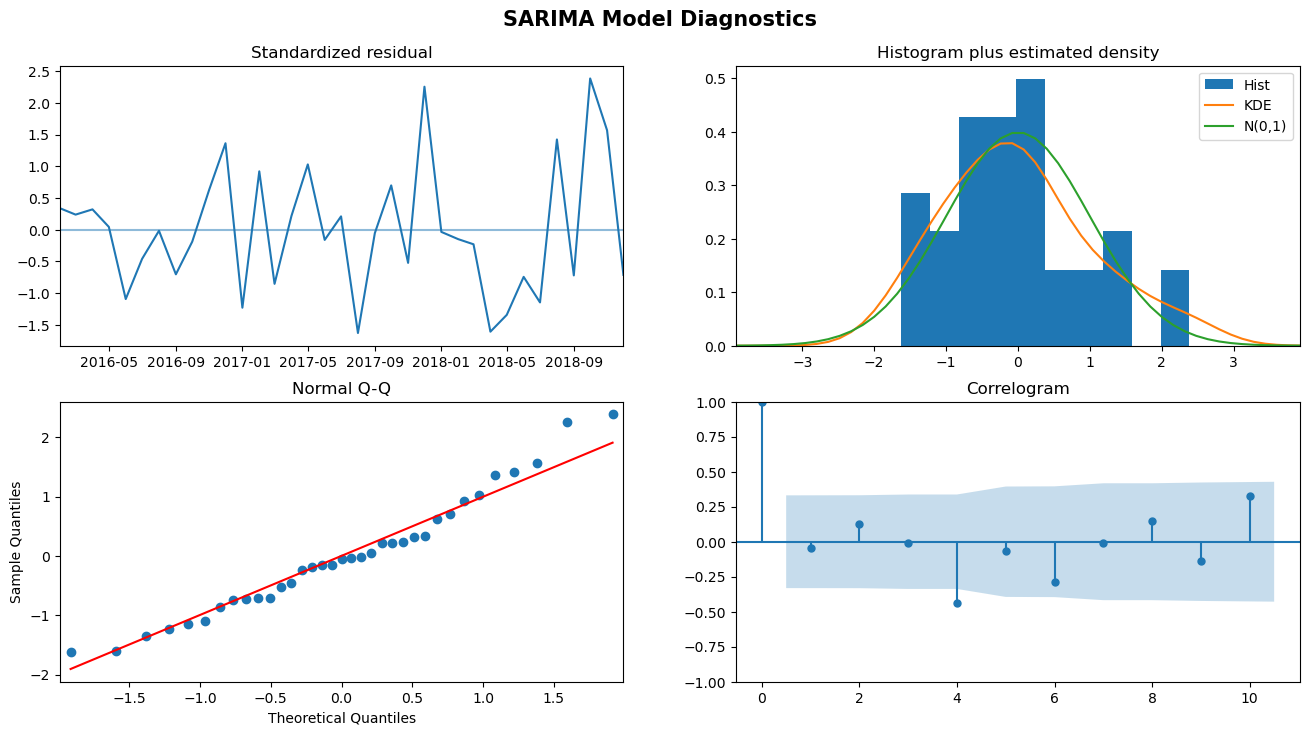

In [32]:
sarima_model.plot_diagnostics(figsize=(16, 8))
plt.suptitle('SARIMA Model Diagnostics', fontweight='bold', y=0.95, fontsize = 15)
plt.show()

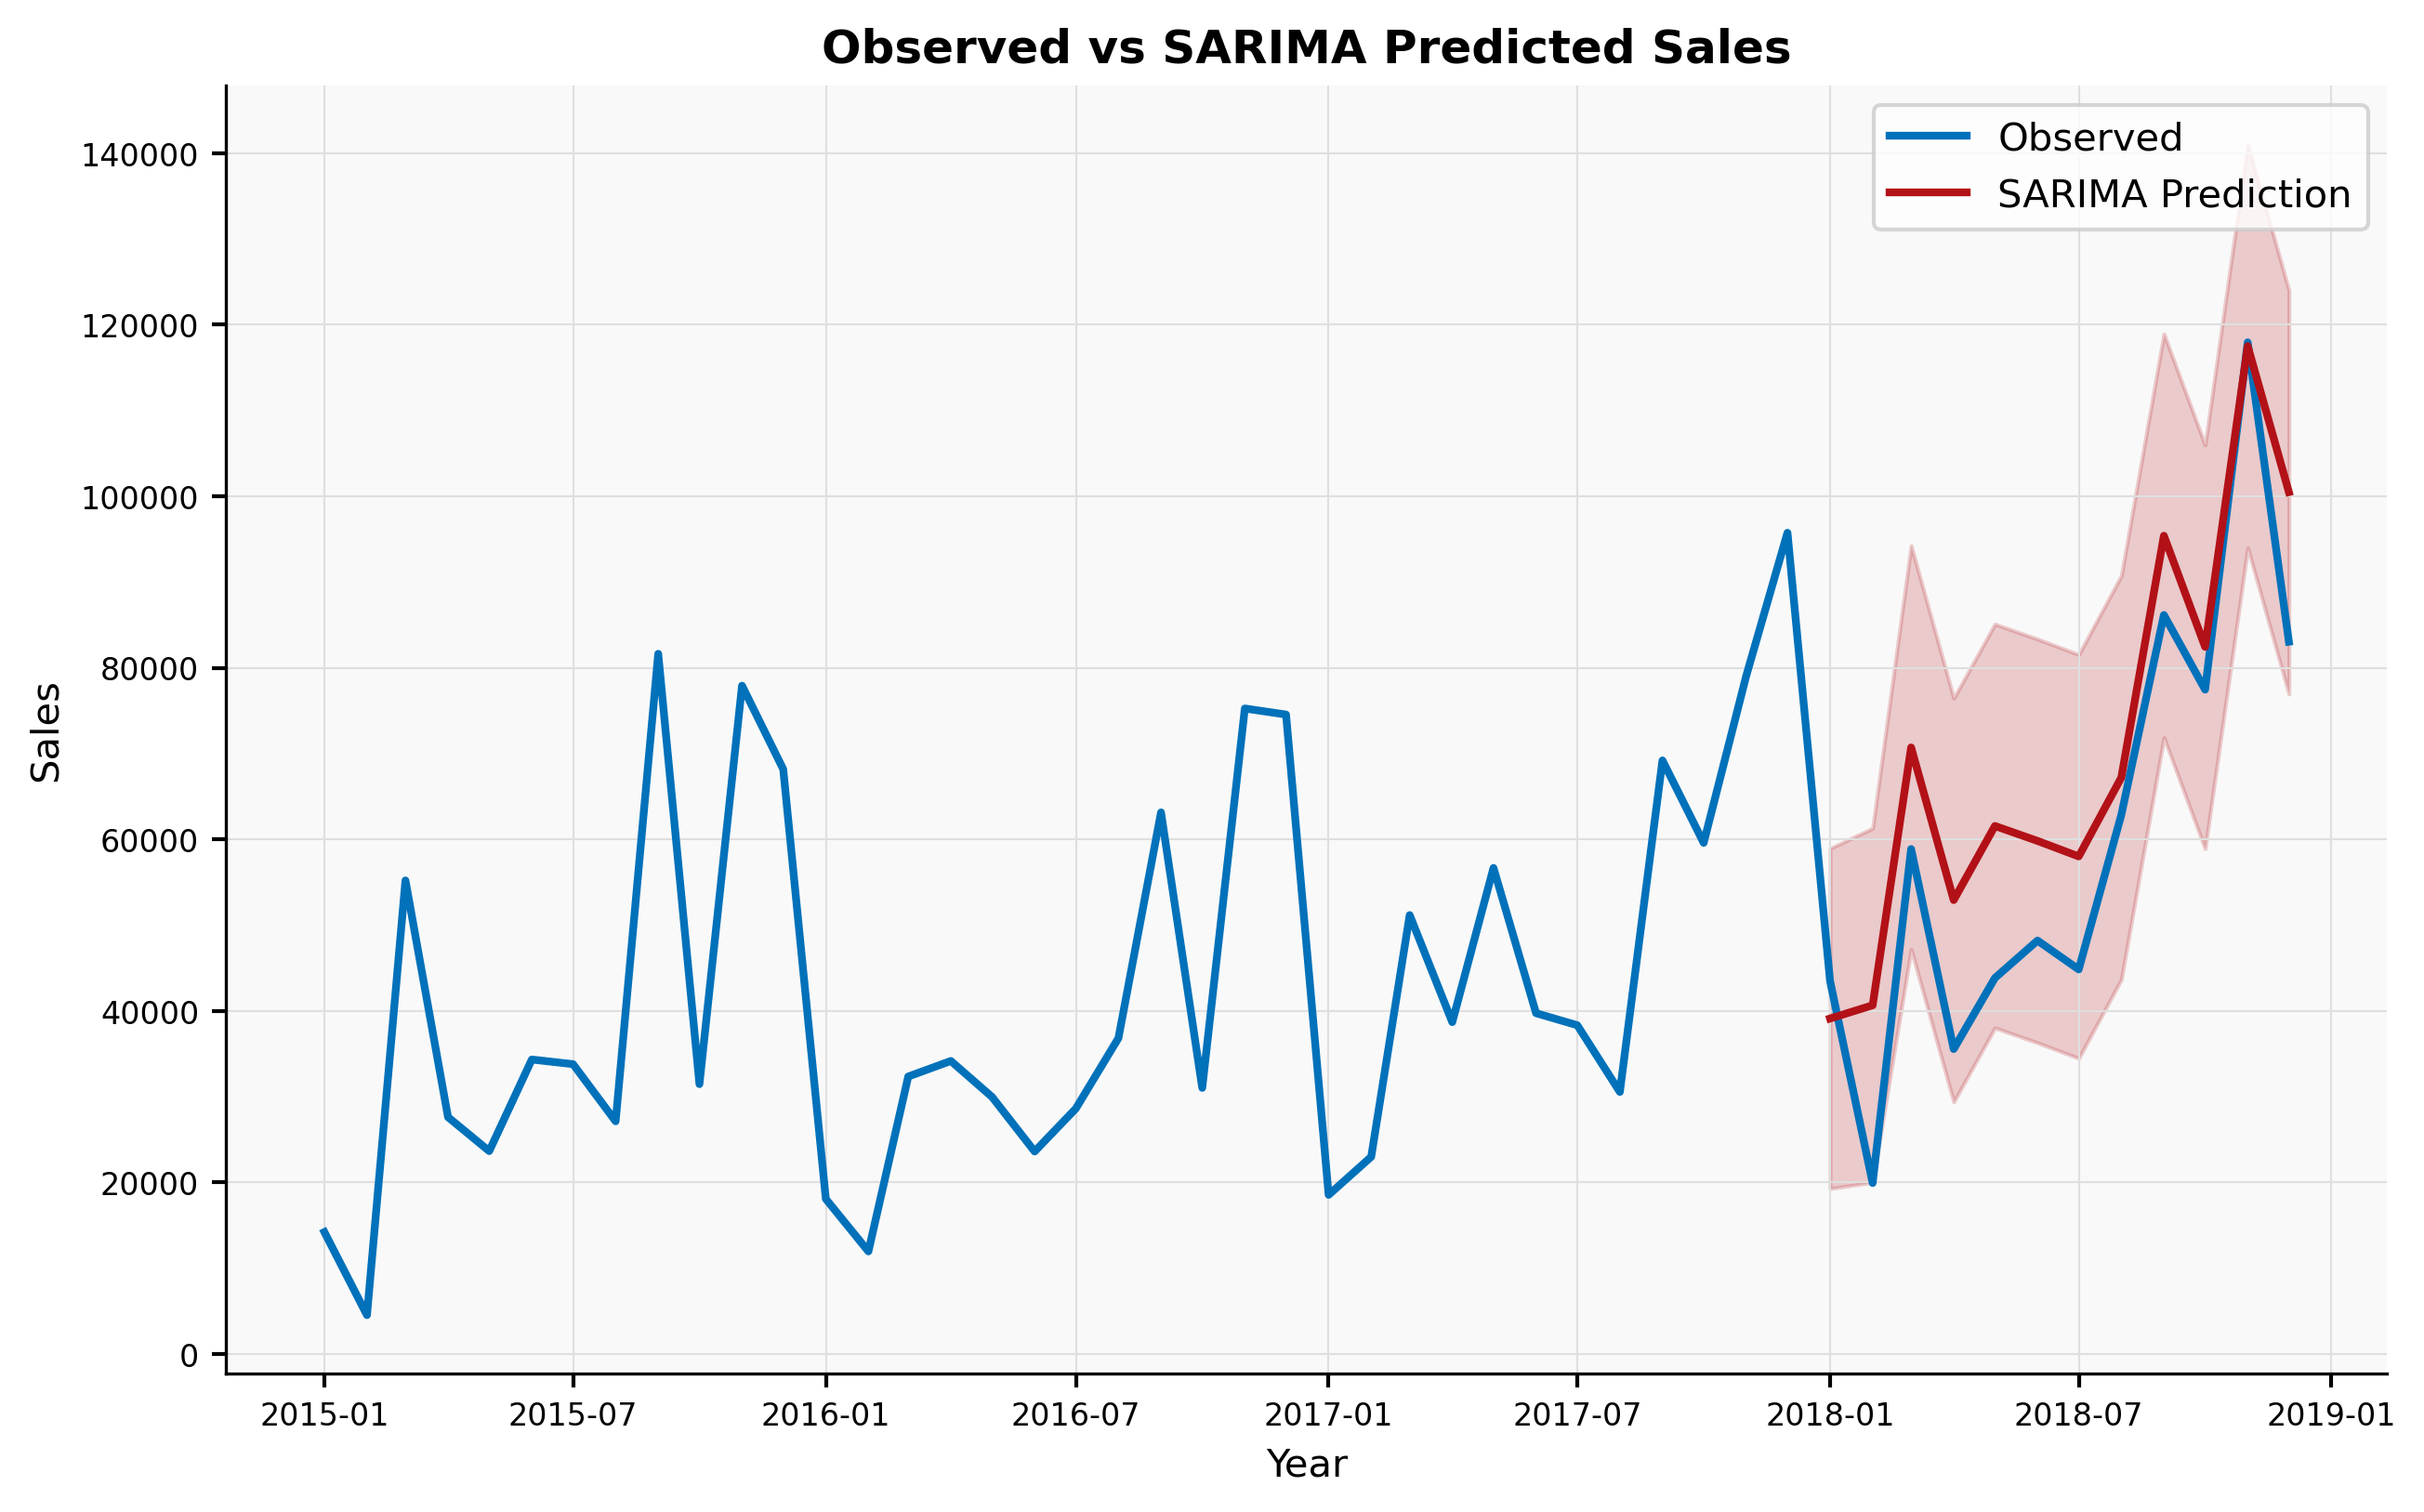

In [33]:
import matplotlib.pyplot as plt

plot_fitted(df_timeseries, sarima_model, title = 'Observed vs SARIMA Predicted Sales', label = 'SARIMA Prediction', color = '#B21117')

> Moreover, the plot above presents the predicted values of the SARIMA (1, 0, 3)x(0, 1, [1], 12) model with Log Likelihood of -372.681 and AIC of 759.362. Form the graph above, the SARIMA model closely follows the observed sales data, indicating its effectiveness in predicting actual values. Moreover, its 95% confidence interval for the predictions, displays how it captures and predicts recurring patterns within specific time intervals effectively unlike the ARIMA’s steady predictions. 

In [34]:
observed = df_timeseries[start_date:end_date]['Sales']
predicted_arima = sarima_model.predict(n_periods=len(df_timeseries[start_date:end_date]), return_conf_int=True)
mae, mse, rmse = calculate_error_metrics(observed, predicted_arima[0])

print('SARIMA Model Error Metrics\n')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

SARIMA Model Error Metrics

Mean Absolute Error (MAE): 11107.70982672976
Mean Squared Error (MSE): 162255681.1451517
Root Mean Squared Error (RMSE): 12737.962205358897


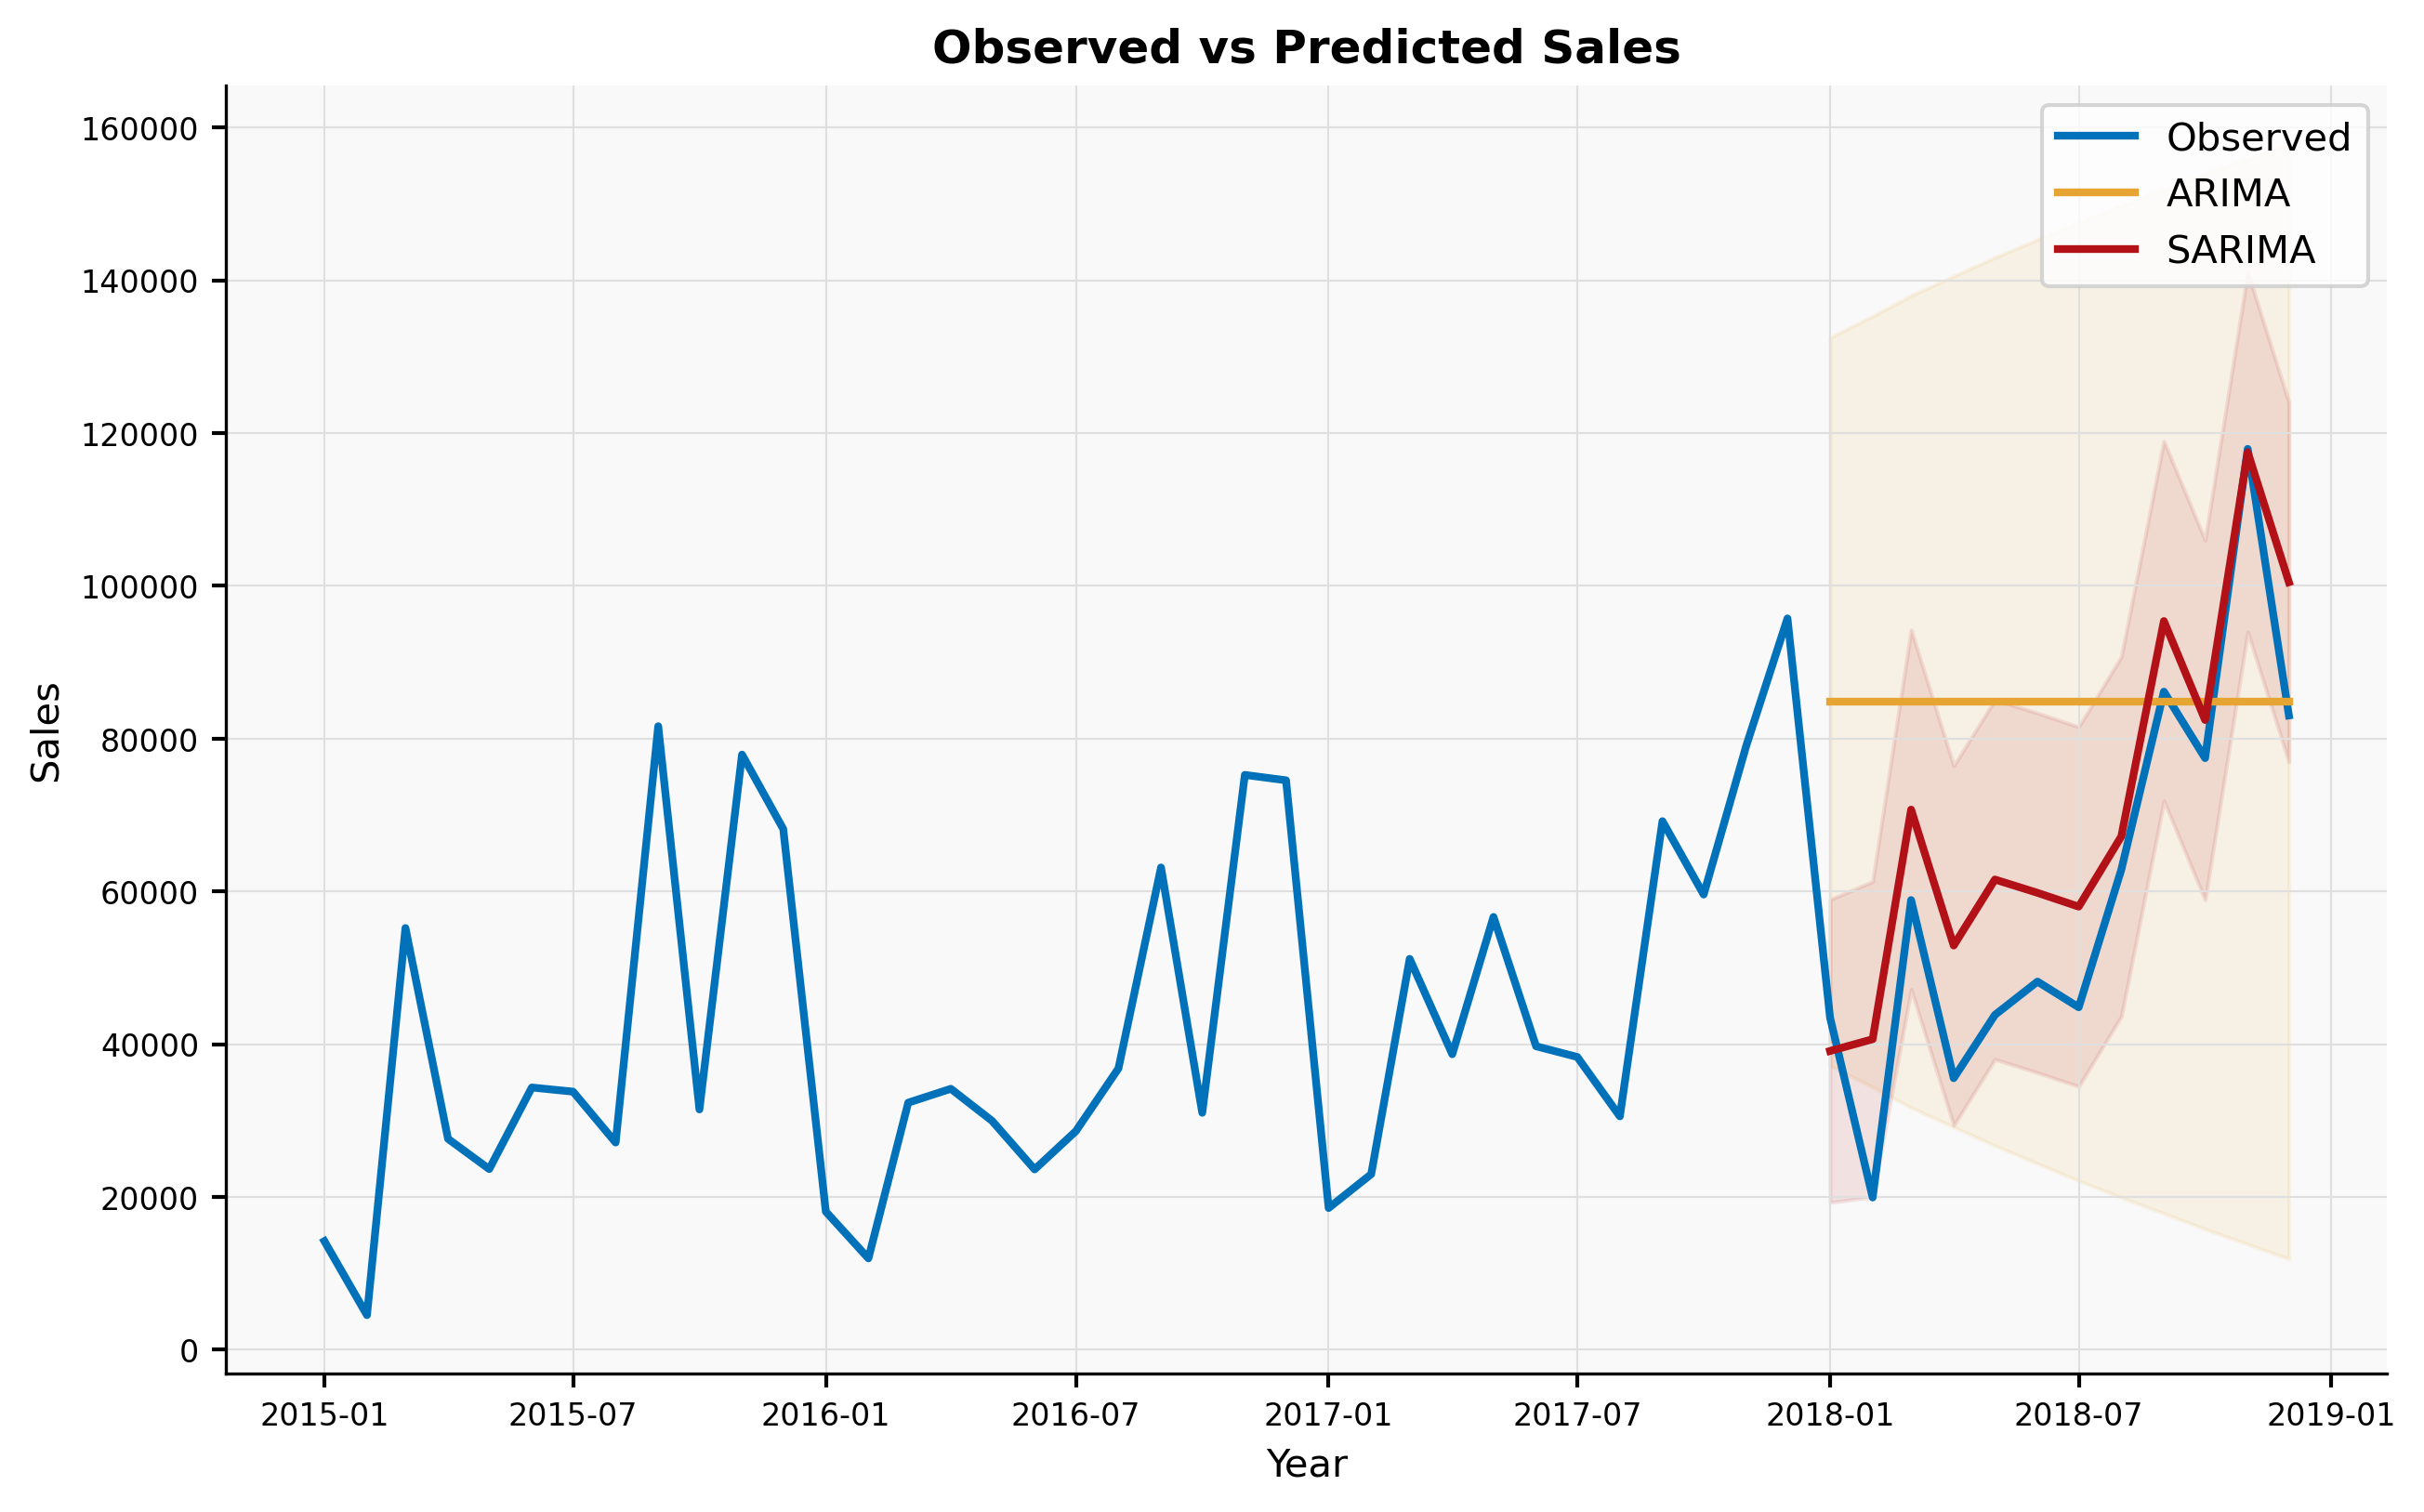

In [35]:
start_date = '2018-01-01'
end_date = '2019-01-01'

def plot_fitted(df, models, titles, labels):
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    sns.despine(top=True, right=True, left=False, bottom=False)
    
    sns.lineplot(data=df, x=df.index, y='Sales', label='Observed', color='#0171BA', ax=ax, linewidth=2)
    
    for model, title, label, color in zip(models, titles, labels, ['#E6A532', '#B21117']):  
        pred = model.predict(n_periods=len(df[start_date:end_date]), return_conf_int=True)
        sns.lineplot(data=df[start_date:end_date], x=df[start_date:end_date].index, y=pred[0], label=label, color=color, ax=ax, linewidth=2)
        ax.fill_between(df[start_date:end_date].index, pred[1][:, 0], pred[1][:, 1], alpha=0.1, color=color)
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Sales')
    ax.set_title('Observed vs Predicted Sales', fontweight='bold')
    ax.grid(True, color='#DFDFDF', linewidth=0.5)
    ax.tick_params(axis='x', width=1)
    ax.tick_params(axis='y', width=1)
    ax.tick_params(axis='both', colors='black', labelsize=8)
    ax.set_facecolor('#F9F9F9')
    ax.legend()

    plt.show()

plot_fitted(df_timeseries, [arima_model, sarima_model], ['ARIMA Prediction', 'SARIMA Prediction'], ['ARIMA', 'SARIMA'])

> By comparing the predictions of the two (2) models, the plot above displays how the ARIMA does not capture the fluctuations in the observed data. On the other hand, the SARIMA model closely follows the trend of the observed data, including its fluctuations. This suggests that it’s more effective in predicting actual sales values. The more accurate prediction of SARIMA is attributed to its incorporation of seasonality, allowing it to capture and predict recurring patterns within specific time intervals effectively. The Table below also validates these results with the error metrics of SARIMA being significantly lower than the ARIMA. For instance, the RMSE of SARIMA is 12737.96 while for ARIMA is 35708.89. 

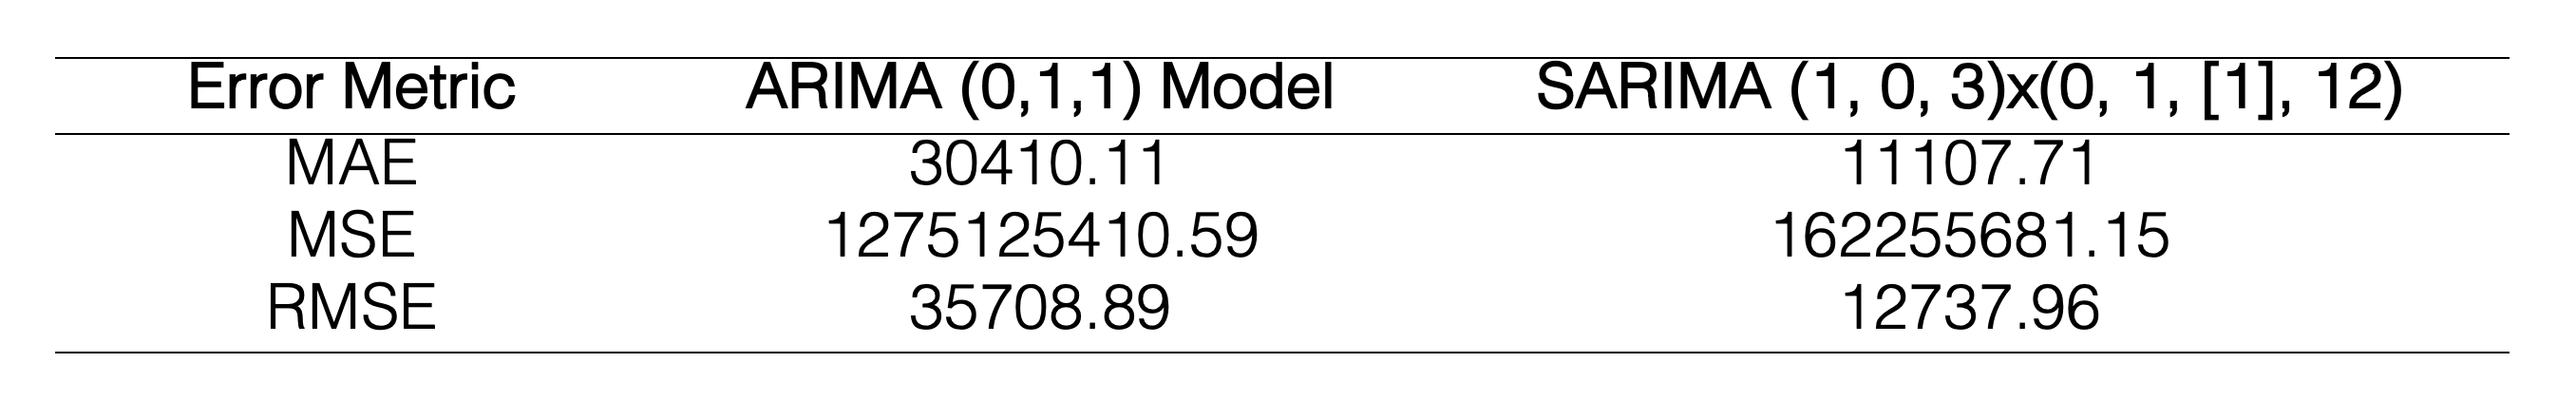

## Forecasting

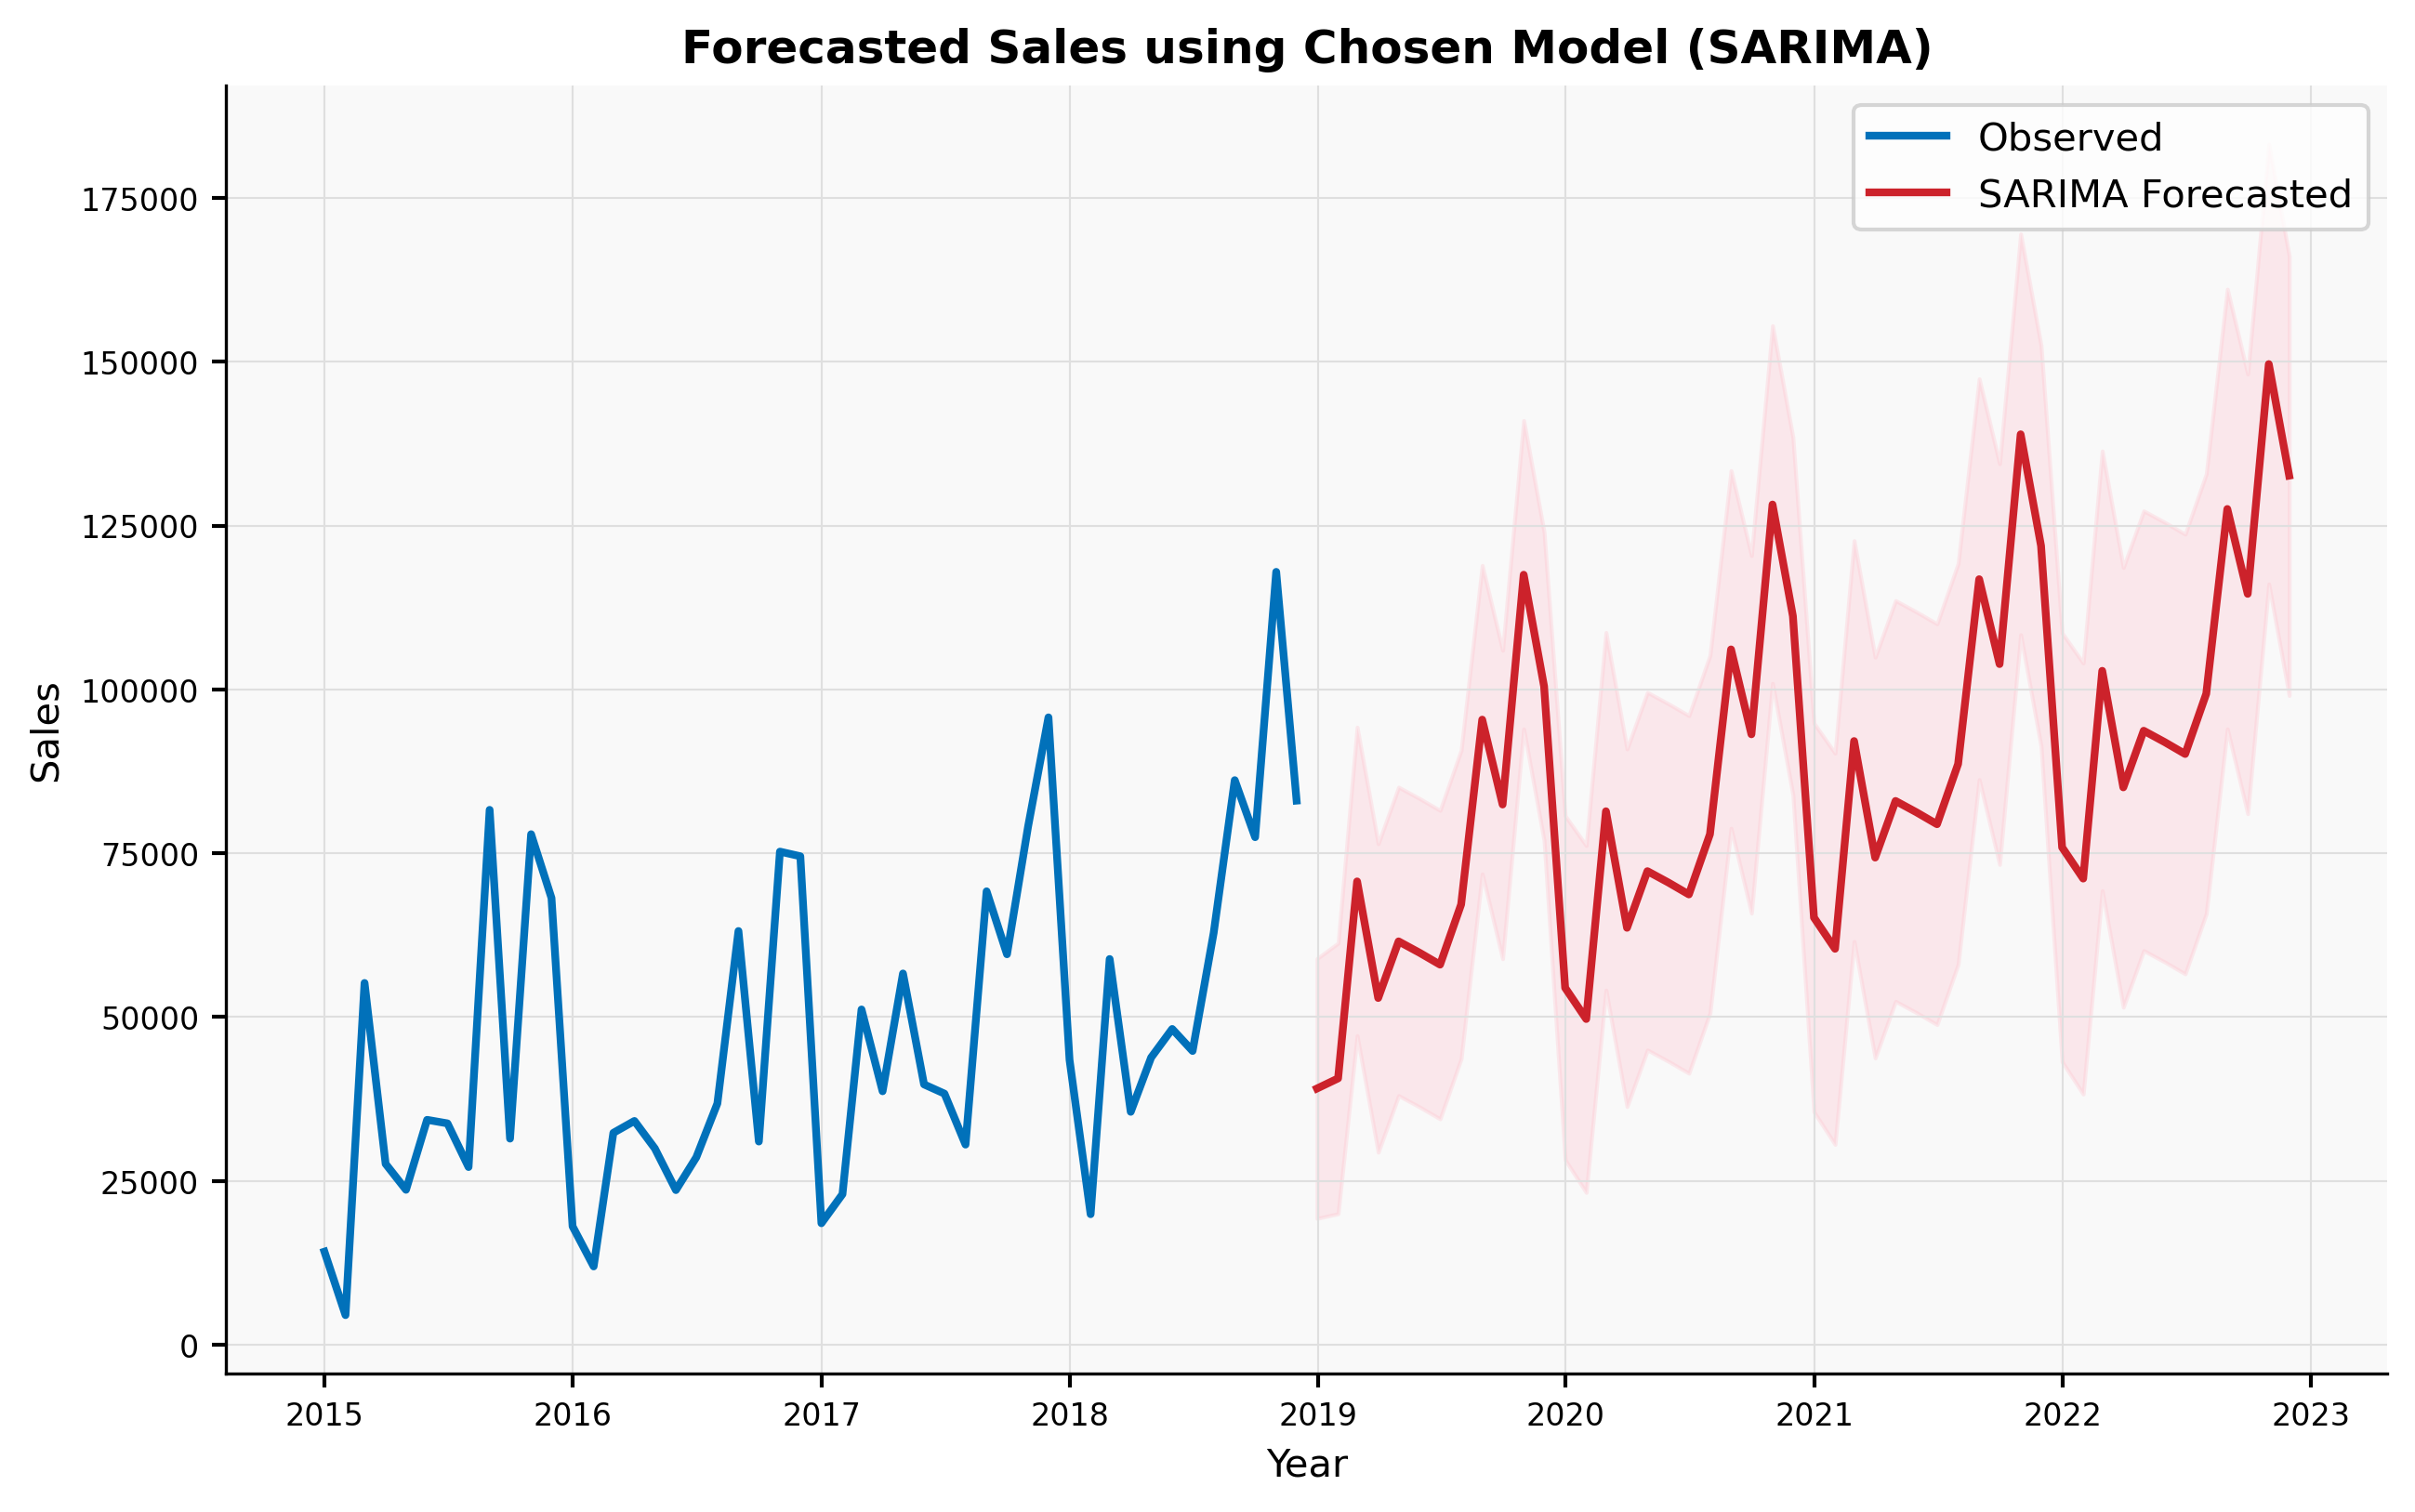

In [36]:
def plot_forecasts(df):
    
    pred, pred_conf_int = sarima_model.predict(n_periods=48, return_conf_int=True)
    pred_index = pd.date_range(start=df.index[-1], periods=len(pred), freq='M')  # Monthly frequency

    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    sns.despine(top=True, right=True, left=False, bottom=False)

    sns.lineplot(data=df, x=df.index, y='Sales', label='Observed', color='#0171BA', ax=ax, linewidth=2)
    sns.lineplot(data=pd.Series(pred, index=pred_index), x=pred_index, y = pred, label='SARIMA Forecasted', color='#CC222B', ax=ax, linewidth=2)
    ax.fill_between(pred_index, pred_conf_int[:, 0], pred_conf_int[:, 1], color='pink', alpha=0.3)

    ax.set_xlabel('Year')
    ax.set_ylabel('Sales')
    ax.set_title('Forecasted Sales using Chosen Model (SARIMA)', fontweight='bold')
    ax.grid(True, color='#DFDFDF', linewidth=0.5)
    
    ax.tick_params(axis='x', width=1)
    ax.tick_params(axis='y', width=1)
    ax.tick_params(axis='both', colors='black', labelsize=8)
    ax.set_facecolor('#F9F9F9')
    ax.legend()
    
    plt.show()

plot_forecasts(df_timeseries)

> The SARIMA model was utilized for forecasting since it provided better fitting results with the observed data. The forecasted sales show a continuation of the upward trend observed in the past data, suggesting an overall increase in sales over time as shown in plot above. Additionally, the forecasted data also captures the seasonal fluctuations, with sales rising and falling at regular intervals throughout the year. This is a characteristic feature of the SARIMA model, which can model and predict seasonal patterns in the data.

In [37]:
forecasted_sarima = sarima_model.predict(n_periods=48)
forecasted_sarima

2019-01-01     39102.300142
2019-02-01     40645.340124
2019-03-01     70706.005333
2019-04-01     52909.484155
2019-05-01     61553.636371
2019-06-01     59810.008548
2019-07-01     58000.543921
2019-08-01     67195.528678
2019-09-01     95391.235692
2019-10-01     82434.231209
2019-11-01    117503.024943
2019-12-01    100474.590176
2020-01-01     54471.282462
2020-02-01     49705.233366
2020-03-01     81410.195090
2020-04-01     63622.240807
2020-05-01     72267.551287
2020-06-01     70524.080064
2020-07-01     68714.636610
2020-08-01     77909.624229
2020-09-01    106105.331631
2020-10-01     93148.327200
2020-11-01    128217.120941
2020-12-01    111188.686175
2021-01-01     65185.378461
2021-02-01     60419.329365
2021-03-01     92124.291089
2021-04-01     74336.336806
2021-05-01     82981.647286
2021-06-01     81238.176063
2021-07-01     79428.732609
2021-08-01     88623.720228
2021-09-01    116819.427630
2021-10-01    103862.423199
2021-11-01    138931.216940
2021-12-01    121902

***
# D. Cluster Analysis

For clustering, feature engineering was first performed by computing the new set of features, RFM, for single row representation of the data. EDA then followed by plotting the distribution of RFM to assess skewness, applying log transformation to mitigate skewness, conducting multicollinearity analysis to identify redundant variables, and standardizing data for clustering. K-Means and hierarchical clustering analysis were conducted, and the resulting clusters were compared. K-Means partitions data into k clusters by minimizing within-cluster variance. Hierarchical clustering creates a hierarchy of clusters by iteratively merging or splitting clusters based on distance metrics, forming a dendrogram to visualize cluster. 

For the K-Means, elbow method was the approach used to determine the optimal number of clusters. On the other hand, a dendrogram was used for the hierarchical clustering. Principal Component Analysis (PCA) was then applied for dimensionality reduction and visualization of the clusters performed. Both clustering methods were then compared based on their performance on evaluation metrics such as Silhouette Score and Davies-Bouldin Index. The silhouette score measures how similar an object is to its own cluster compared to other clusters. The higher score, the better. For the Davies-Bouldin Index, this measures the average similarity between each cluster and its most similar cluster, where lower values indicate better clustering. The clusters formed of the cluster algorithm which obtained better results on the metrics was summarized. Insights were provided for such clusters and their recommended strategies for the business. 

## Feature Engineering



In [38]:
df_cluster = df.copy()

In [39]:
df_cluster.dtypes

Order Date     datetime64[ns]
Order ID               object
Customer ID            object
Sales                 float64
dtype: object

In [40]:
df_cluster['Customer ID'].nunique()

793

In [41]:
df_cluster['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

In [42]:
reference_date = pd.to_datetime('2018-12-31')

def calculate_rfm_metrics(data):
    data['Recency'] = (reference_date - data.groupby('Customer ID')['Order Date'].transform('max')).dt.days.astype('float')
    data['Frequency'] = data.groupby('Customer ID')['Order Date'].transform('count').astype('float')
    data['Monetary'] = data.groupby('Customer ID')['Sales'].transform('sum').astype('float')  
    
    rfm_grouped = data.groupby('Customer ID')[['Recency', 'Frequency', 'Monetary']].max()
    transaction_counts = data.groupby('Customer ID').size().reset_index(name='Transaction_Count')
    merged_df = transaction_counts.merge(rfm_grouped, on='Customer ID', how='left')
    merged_df[['Recency', 'Frequency', 'Monetary']] = merged_df[['Recency', 'Frequency', 'Monetary']].fillna(0)

    return_df = merged_df[['Customer ID', 'Transaction_Count', 'Recency', 'Frequency', 'Monetary']]
    return_df = return_df.sort_values(by='Transaction_Count', ascending=False)  
    
    return return_df

In [43]:
rfm_df = calculate_rfm_metrics(df_cluster).reset_index(drop = True)
rfm_df = rfm_df.drop(['Transaction_Count'], axis = 1)
rfm_df

Customer ID  Recency  Frequency  Monetary
0      WB-21850     21.0       35.0  6129.710
1      MA-17560     65.0       34.0  4299.161
2      PP-18955     98.0       34.0  7252.608
3      JL-15835     22.0       33.0  9576.343
4      CK-12205     40.0       32.0  3154.855
..          ...      ...        ...       ...
788    SC-20845    415.0        1.0    14.112
789    LD-16855    553.0        1.0     5.304
790    JR-15700     69.0        1.0   863.880
791    RE-19405   1098.0        1.0    48.360
792    CJ-11875    366.0        1.0    16.520

[793 rows x 4 columns]

## Exploratory Data Analysis

In [44]:
def plot_numeric_histograms(data, title, color):
    data['Customer ID'] = data['Customer ID'].astype('object')
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=300)
    axes = axes.flatten()
    sns.despine(top=True, right=True)

    for i, col in enumerate(data.select_dtypes(include='float64').columns):
        sns.histplot(data[col], kde=True, ax=axes[i], bins=30, edgecolor='#F2F2F2', color=color)
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].set_facecolor('#F9F9F9')
    
    #axes[-1].set_visible(False)

    fig.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

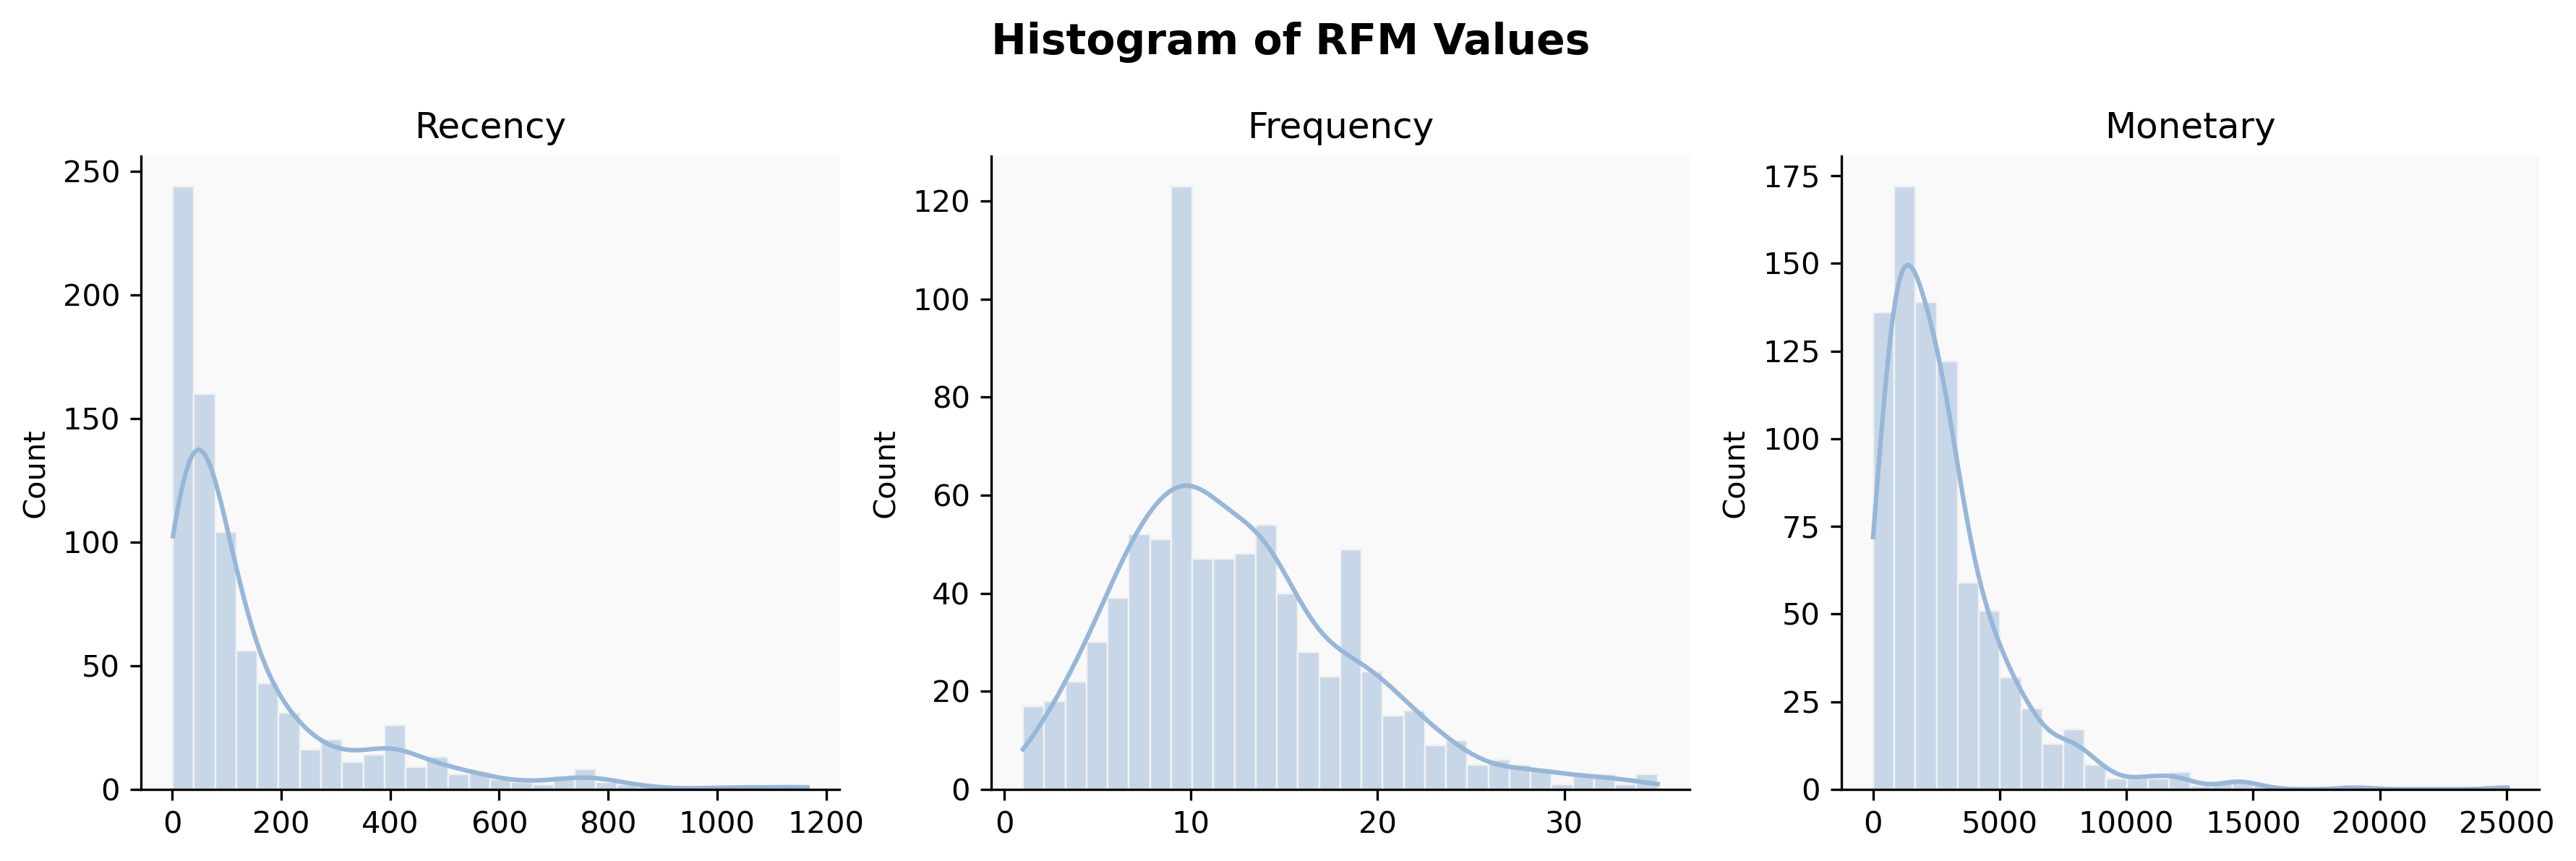

In [45]:
plot_numeric_histograms(rfm_df, 'Histogram of RFM Values', '#97B7D9')

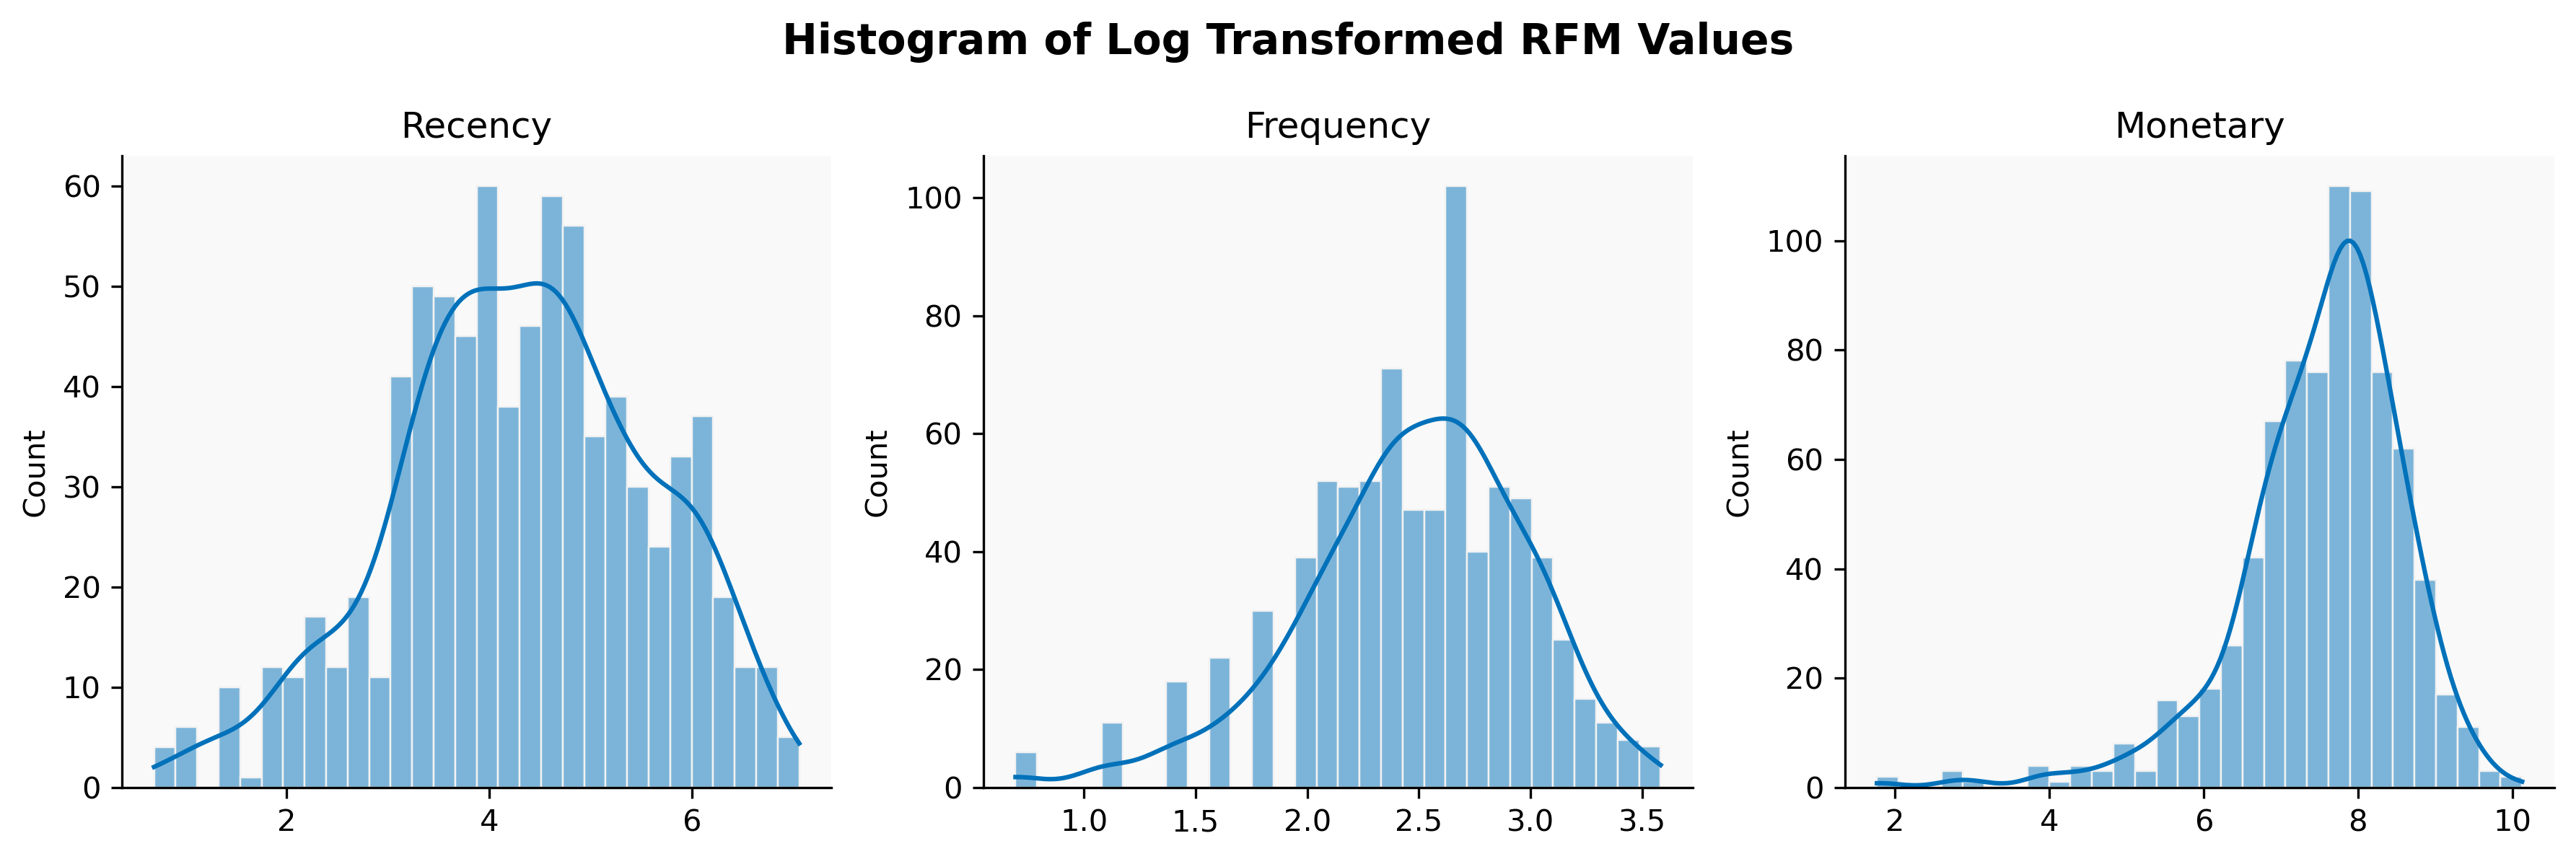

In [46]:
rfm_df_transformed = rfm_df.copy()
numerical = ['Recency', 'Frequency', 'Monetary']
rfm_df_transformed[numerical] = np.log1p(rfm_df_transformed[numerical])

plot_numeric_histograms(rfm_df_transformed, 'Histogram of Log Transformed RFM Values', '#0171BA')

> After the RFM was engineered, its histogram was examined. It was found that the RFM values exhibits a skewed distribution in the plot, meaning it is not symmetrically distributed around the mean and may affect analysis. Thus, it was log transformed to help the data become more normally distributed. Reducing skewness allows for the application of various models and statistical techniques.

In [47]:
from matplotlib.colors import LinearSegmentedColormap

def plot_correlation_heatmap(data, title, color):
    numerical = ['Recency', 'Frequency', 'Monetary']
    correlation_matrix = data[numerical].corr()
    colors = ['#fbffea', color]
    cmap = LinearSegmentedColormap.from_list("Custom", colors, N=256)

    plt.figure(figsize=(12, 4), dpi=300)
    ax = sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5, square=True,
                     mask=np.triu(correlation_matrix, k=1),
                     cbar_kws={'label': 'Correlation'}, xticklabels=numerical, yticklabels=numerical)
    ax.set_title(title, loc='center', fontweight='bold', fontsize=8)
    
    ax.tick_params(axis='x', labelsize=5)
    ax.tick_params(axis='y', labelsize=5)
    ax.set_facecolor('#F9F9F9')

    plt.show()

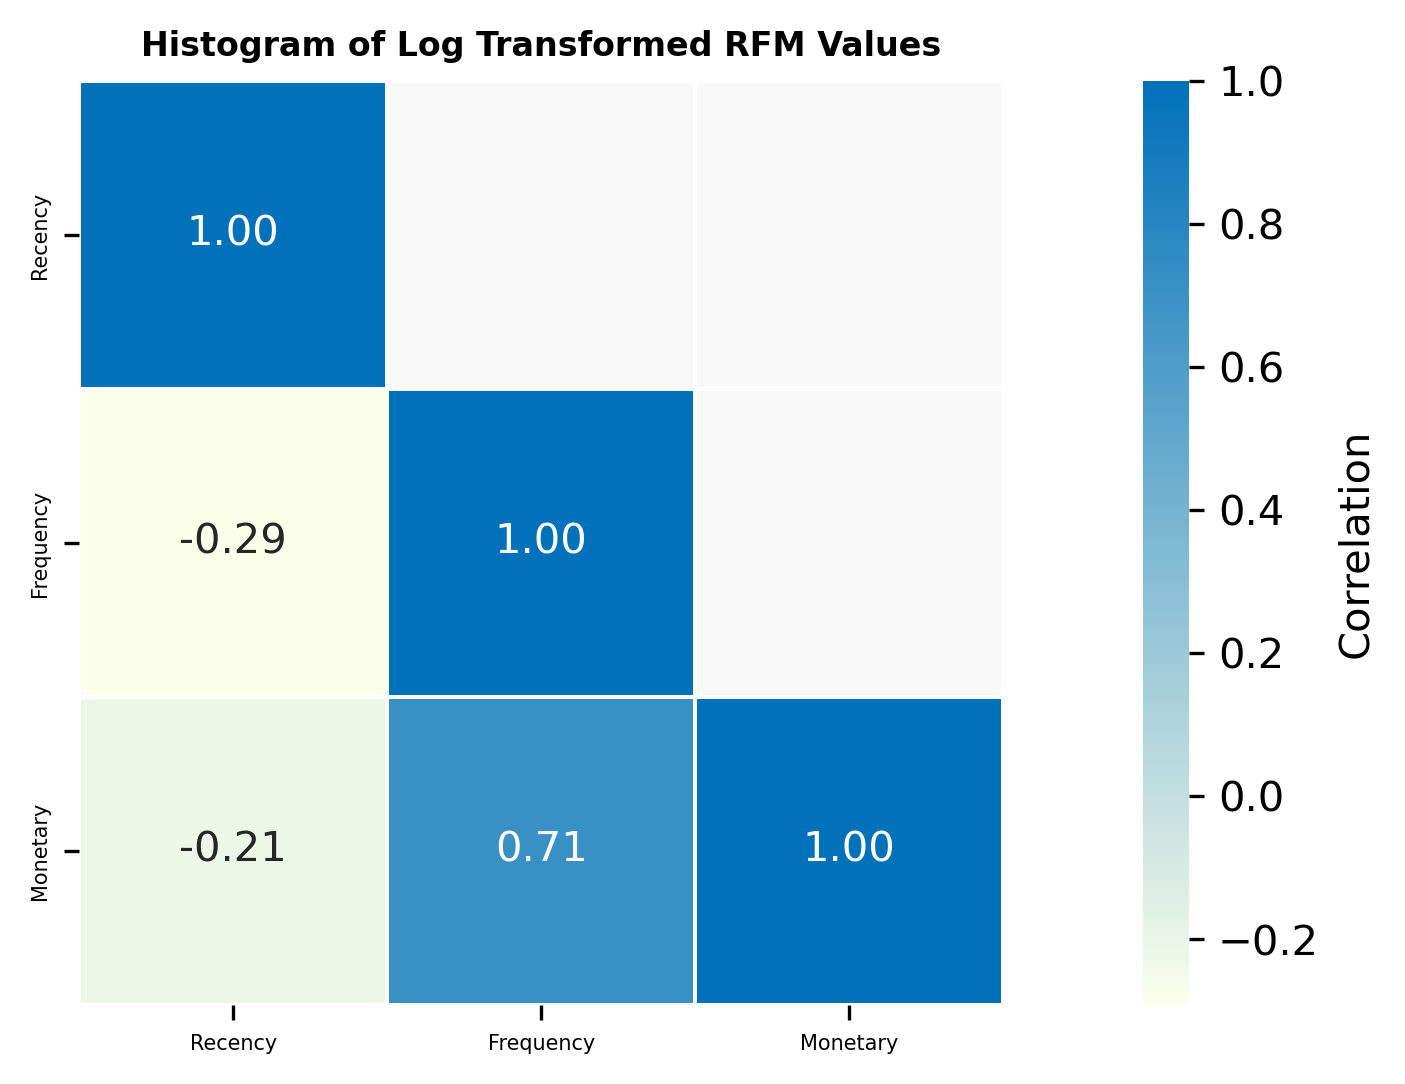

In [48]:
plot_correlation_heatmap(rfm_df_transformed, 'Histogram of Log Transformed RFM Values', '#0171BA')

> The correlation map of RFM components reveals that there are no redundant data. This conclusion is based on the fact that none of the pairwise correlations among these components exceeds the threshold of 0.80.

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_df_standardized = rfm_df_transformed.copy()
numerical = ['Recency', 'Frequency', 'Monetary']
rfm_df_standardized[numerical] = scaler.fit_transform(rfm_df_standardized[numerical])

rfm_df_standardized

Customer ID   Recency  Frequency  Monetary
0      WB-21850 -0.968898   2.196691  1.110014
1      MA-17560 -0.099782   2.140757  0.778603
2      PP-18955  0.220983   2.140757  1.267178
3      JL-15835 -0.933732   2.083201  1.526863
4      CK-12205 -0.476413   2.023927  0.489490
..          ...       ...        ...       ...
788    SC-20845  1.356663  -3.542227 -4.501908
789    LD-16855  1.583298  -3.542227 -5.318904
790    JR-15700 -0.053233  -3.542227 -0.720086
791    RE-19405  2.125197  -3.542227 -3.395843
792    CJ-11875  1.257520  -3.542227 -4.363746

[793 rows x 4 columns]

## a. K-Means Clustering

In [50]:
rfm_df_cluster = rfm_df_standardized.drop(['Customer ID'], axis = 1)
rfm_df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    793 non-null    float64
 1   Frequency  793 non-null    float64
 2   Monetary   793 non-null    float64
dtypes: float64(3)
memory usage: 18.7 KB


### Elbow Method

In [51]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(rfm_df_cluster)
    inertia_val = kmeans.inertia_
    inertia.append(inertia_val)
    print(f"For k = {k}, Inertia = {inertia_val}")

For k = 1, Inertia = 2379.0
For k = 2, Inertia = 1468.4311438561099
For k = 3, Inertia = 1153.1374470901442
For k = 4, Inertia = 958.2250051724177
For k = 5, Inertia = 804.25342160325
For k = 6, Inertia = 723.0021374377227
For k = 7, Inertia = 650.3909066824988
For k = 8, Inertia = 586.4017965546777
For k = 9, Inertia = 554.686375300811
For k = 10, Inertia = 511.09999275362065


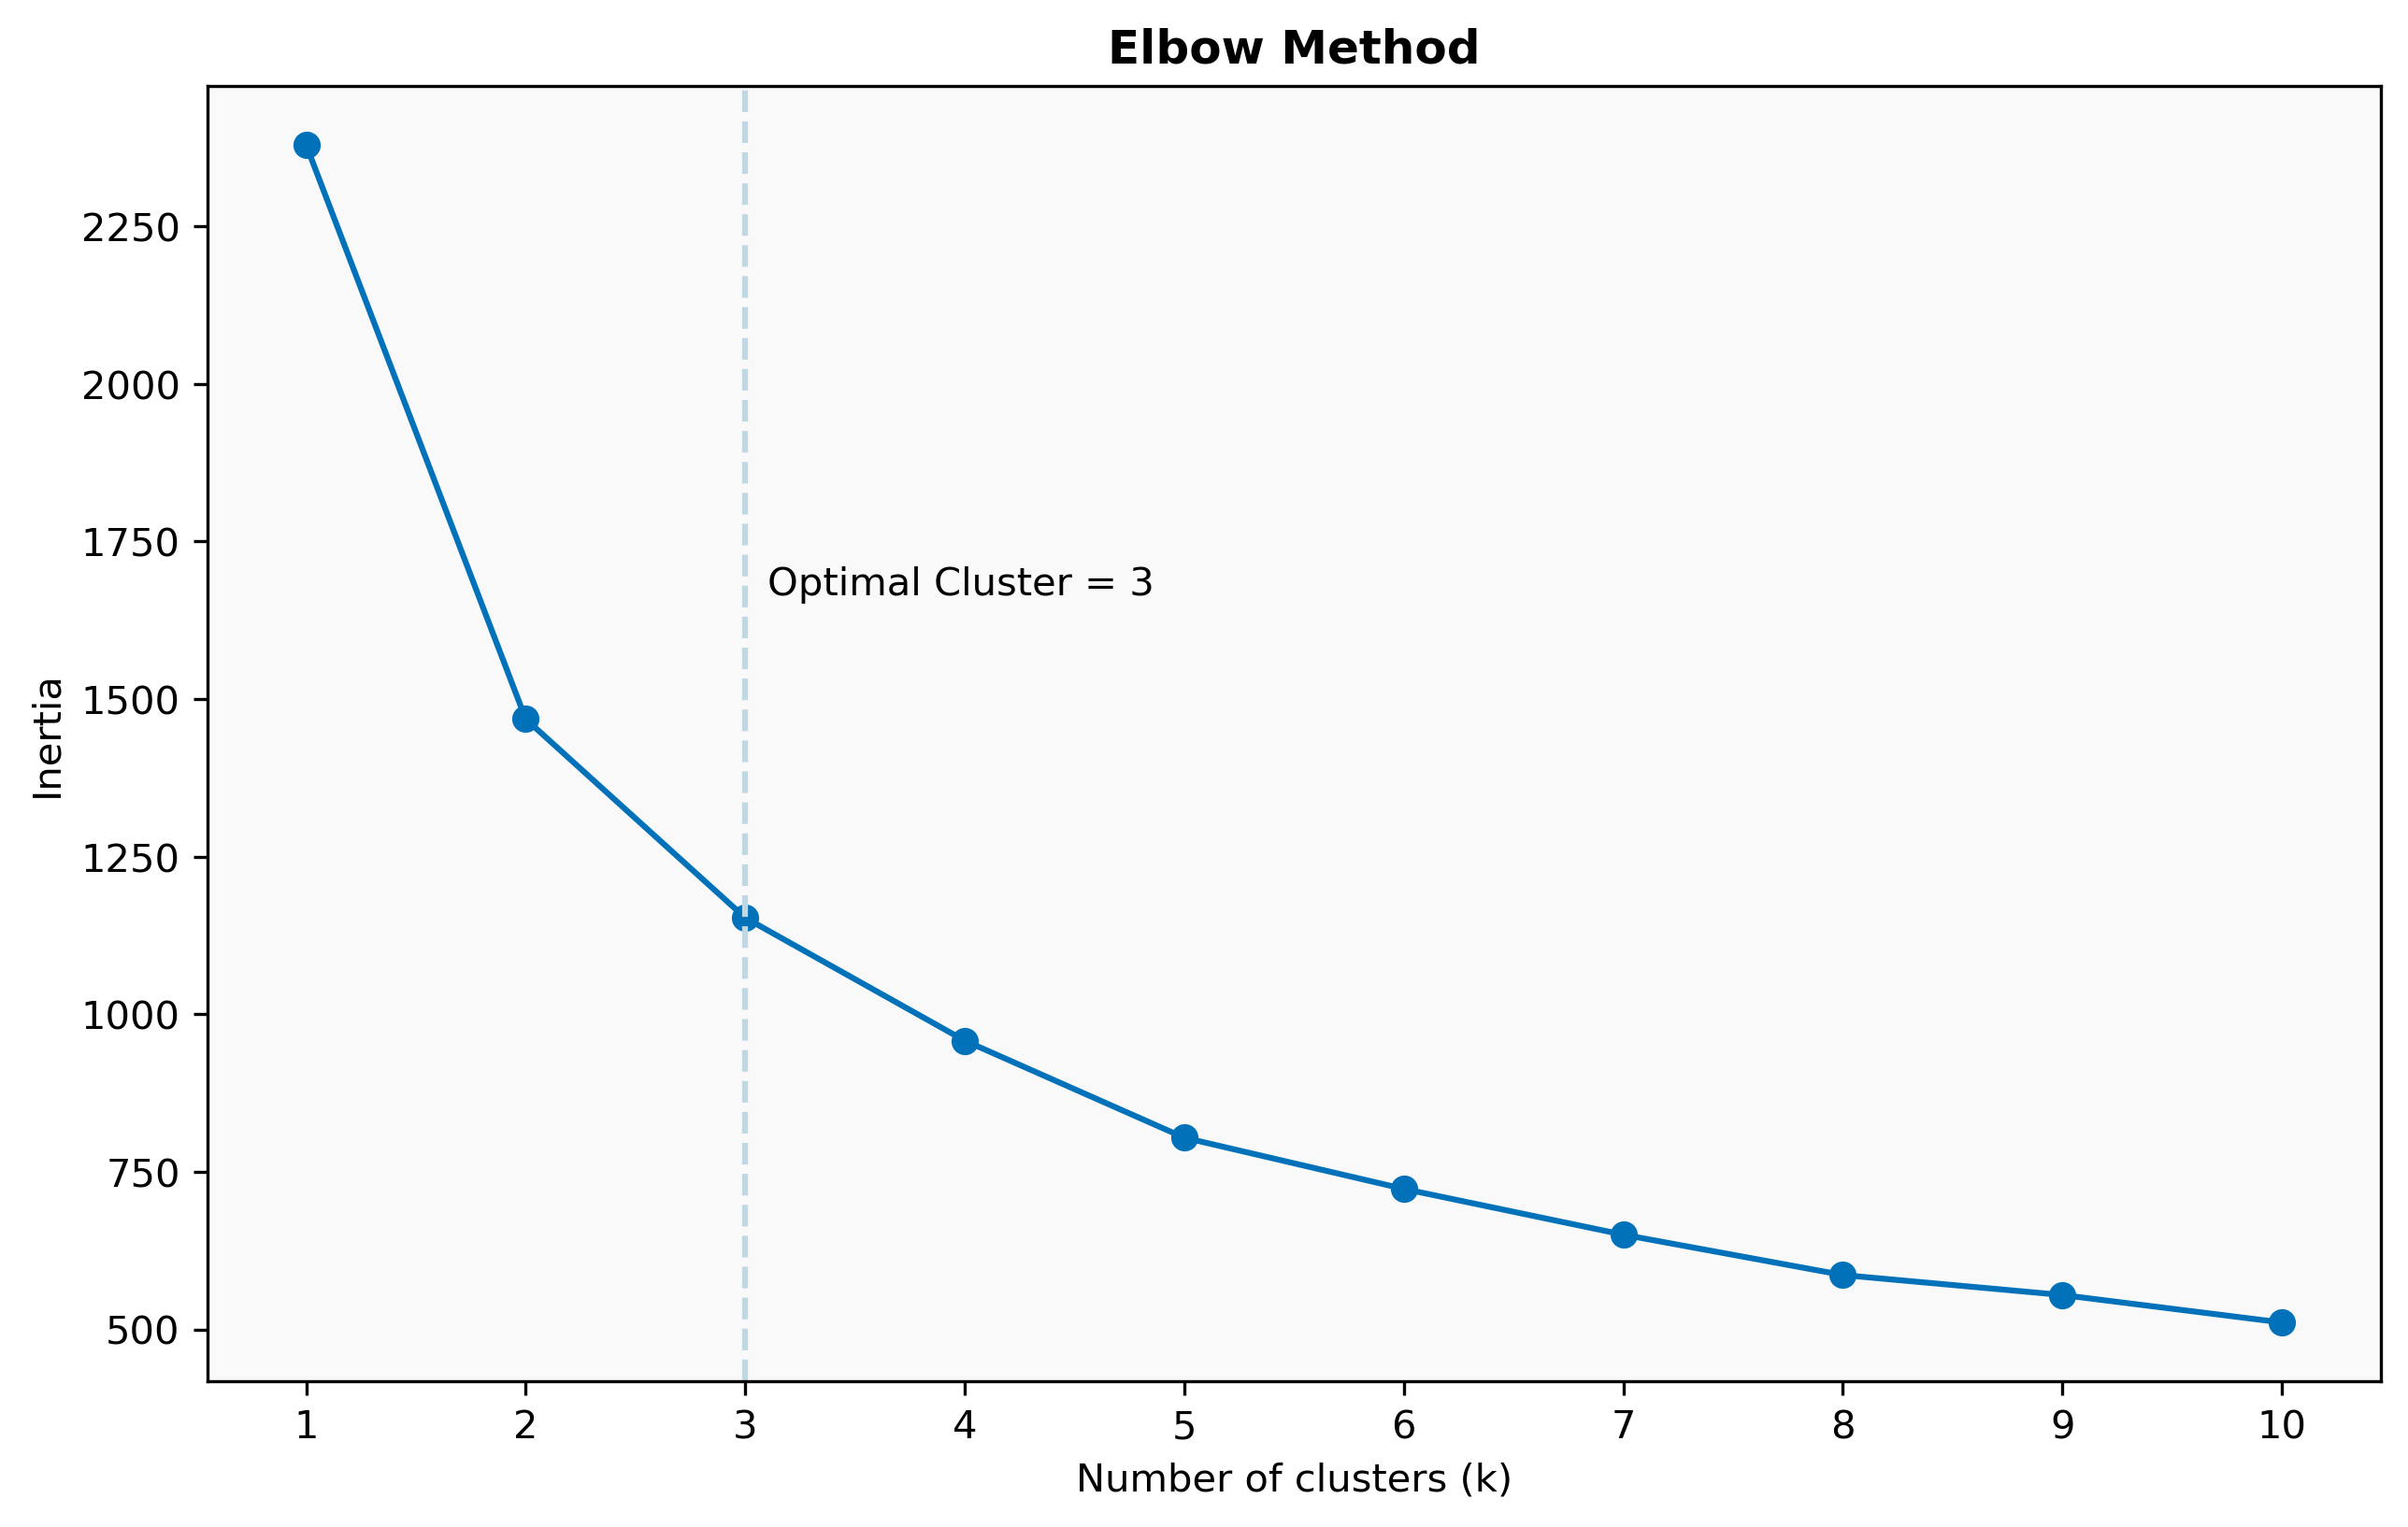

In [52]:
def plot_elbow(inertia, optimal_k):
    plt.figure(figsize=(10, 6), dpi=300)
    plt.plot(range(1, len(inertia) + 1), inertia, marker='o', linestyle='-', color='#0171BA')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method', fontweight='bold')
    plt.xticks(range(1, len(inertia) + 1))
    plt.gca().set_facecolor('#F9F9F9')

    plt.axvline(x=optimal_k, linestyle='--', color='#C0D7E4')
    plt.text(optimal_k + 0.1, max(inertia) * 0.7, f"Optimal Cluster = {optimal_k}", fontsize=10)
    
    plt.show()


plot_elbow(inertia, 3)

> For the K-Means Clustering, the graph above represents the Elbow Method in K-means clustering. As k increases, inertia decreases, but the rate of decrease changes at an “elbow point.” In this graph, the elbow point is at k=3 with an inertia of approximately 1500, indicating that three is the optimal number of clusters for this dataset. This optimal number was used to fit the K-Means algorithm.

### Fitting K-Means

In [53]:
rfm_df_cluster.values

array([[-0.96889786,  2.19669114,  1.11001418],
       [-0.09978201,  2.14075703,  0.77860326],
       [ 0.22098279,  2.14075703,  1.26717818],
       ...,
       [-0.05323309, -3.54222734, -0.72008649],
       [ 2.1251971 , -3.54222734, -3.39584302],
       [ 1.25751961, -3.54222734, -4.36374573]])

In [54]:
np.random.seed(1234)

kmeans = KMeans(n_clusters=3, max_iter=50)
clusters_fit = kmeans.fit_predict(rfm_df_cluster)
centroids = kmeans.cluster_centers_

In [55]:
rfm_df_kmeans = rfm_df_cluster.copy()
rfm_df_kmeans['Cluster'] = clusters_fit

In [56]:
rfm_df_kmeans['Cluster'].value_counts()

2    298
0    294
1    201
Name: Cluster, dtype: int64

### Principal Component Analysis

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(rfm_df_cluster)
pca_result

array([[-2.5410335 ,  0.06337179],
       [-1.95748343, -0.61361122],
       [-2.14892769, -1.07146841],
       ...,
       [ 2.78956984,  1.02659536],
       [ 5.34676432, -0.08419376],
       [ 5.63699764,  1.03637699]])

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cluster_visualization(clusters, title):
    cluster_colors = {
        0: '#0171BA',
        1: '#B21117',
        2: '#E6A532',
    }
    
    plt.figure(figsize=(10, 6), dpi=300)
    for cluster in np.unique(clusters):
        mask = (clusters == cluster)
        plt.scatter(pca_result[mask, 0], pca_result[mask, 1], alpha=0.8, label=cluster,
                    color=cluster_colors[cluster], s=50)  
    
    plt.legend(title='Cluster')
    plt.title(title, fontweight='bold')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    
    plt.gca().set_facecolor('#F9F9F9')
    plt.grid(False)
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.7)
    
    plt.show()

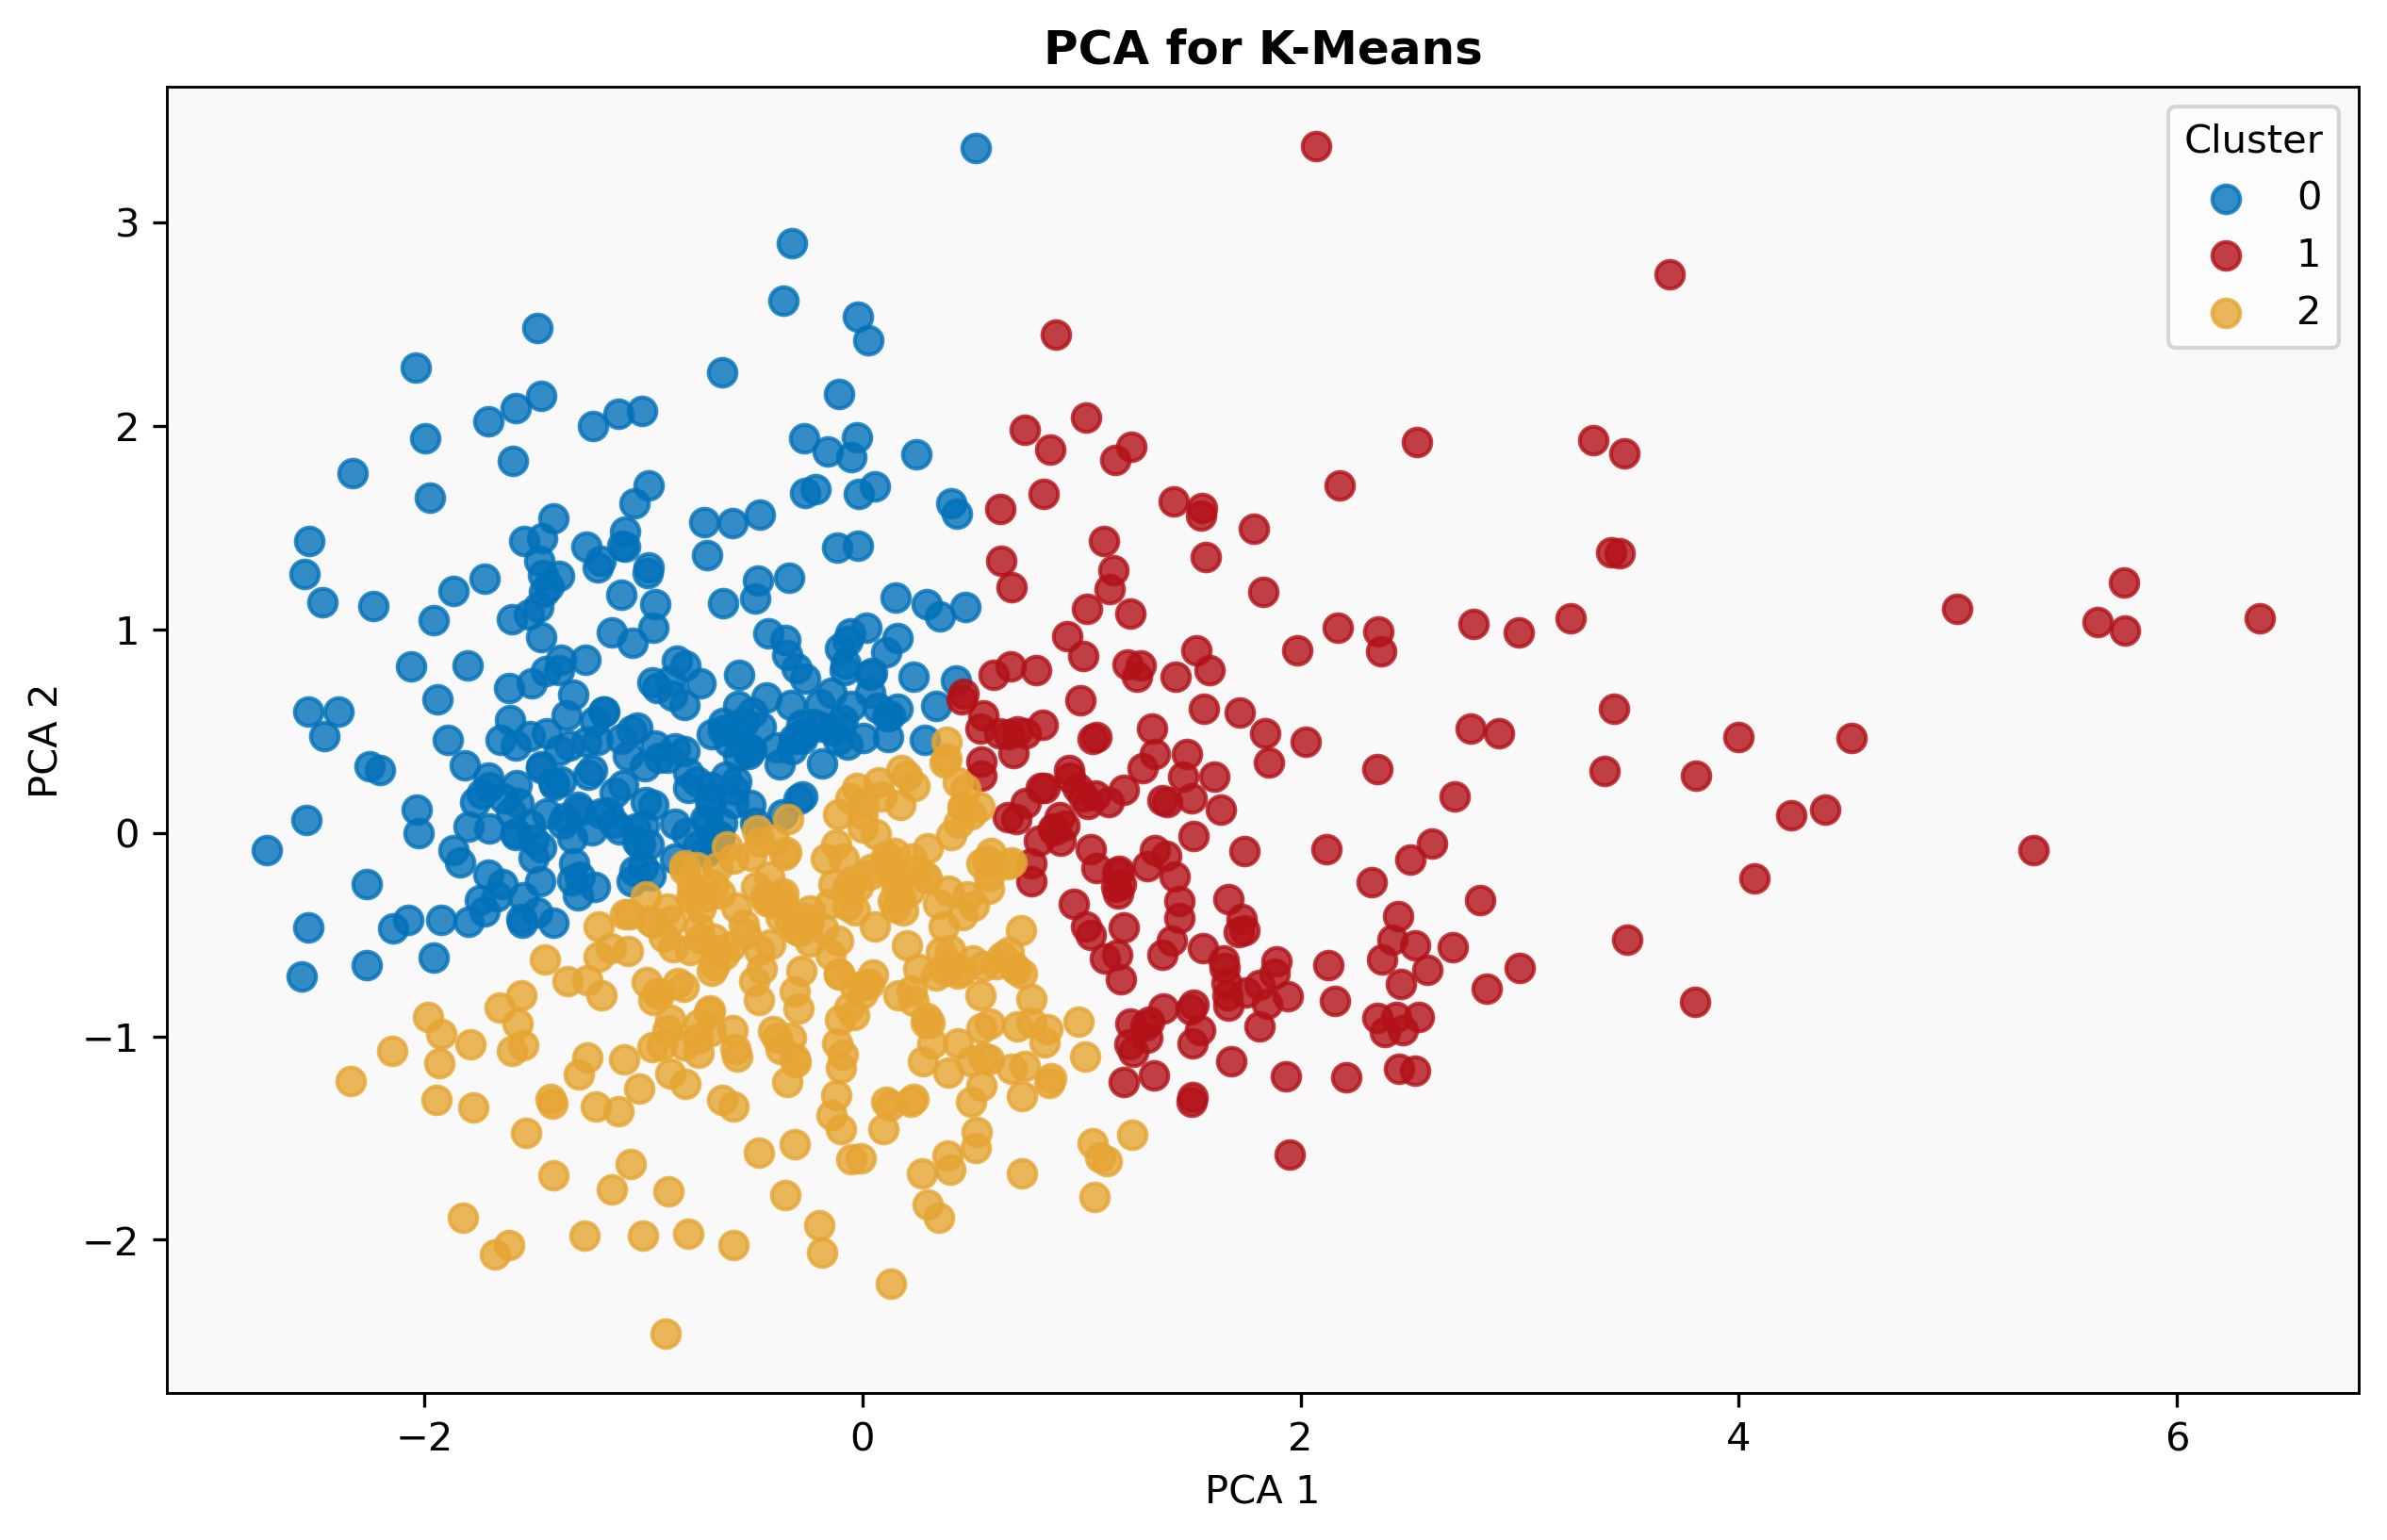

In [59]:
plot_cluster_visualization(clusters_fit, title = 'PCA for K-Means')

> PCA was used to visualize the clusters formed by K-Means. As observed in plot above, there are three distinct clusters of data points represented in blue, yellow, and red colors. Each color corresponds to a different cluster (0, 1, or 2). 

In [60]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

rfm_df_sil_kmeans = rfm_df_kmeans.drop(['Cluster'], axis = 1)
silhouette_kmeans = silhouette_score(rfm_df_sil_kmeans, rfm_df_kmeans['Cluster'].values)

db_index_kmeans = davies_bouldin_score(rfm_df_sil_kmeans, rfm_df_kmeans['Cluster'].values)

print('K-Means Clustering Evaluation Metrics \n')
print("Silhouette Score:", silhouette_kmeans)
print("Davies-Bouldin Index:", db_index_kmeans)

K-Means Clustering Evaluation Metrics 

Silhouette Score: 0.2663968328879911
Davies-Bouldin Index: 1.1910351921364866


## b. Hierchical Clustering

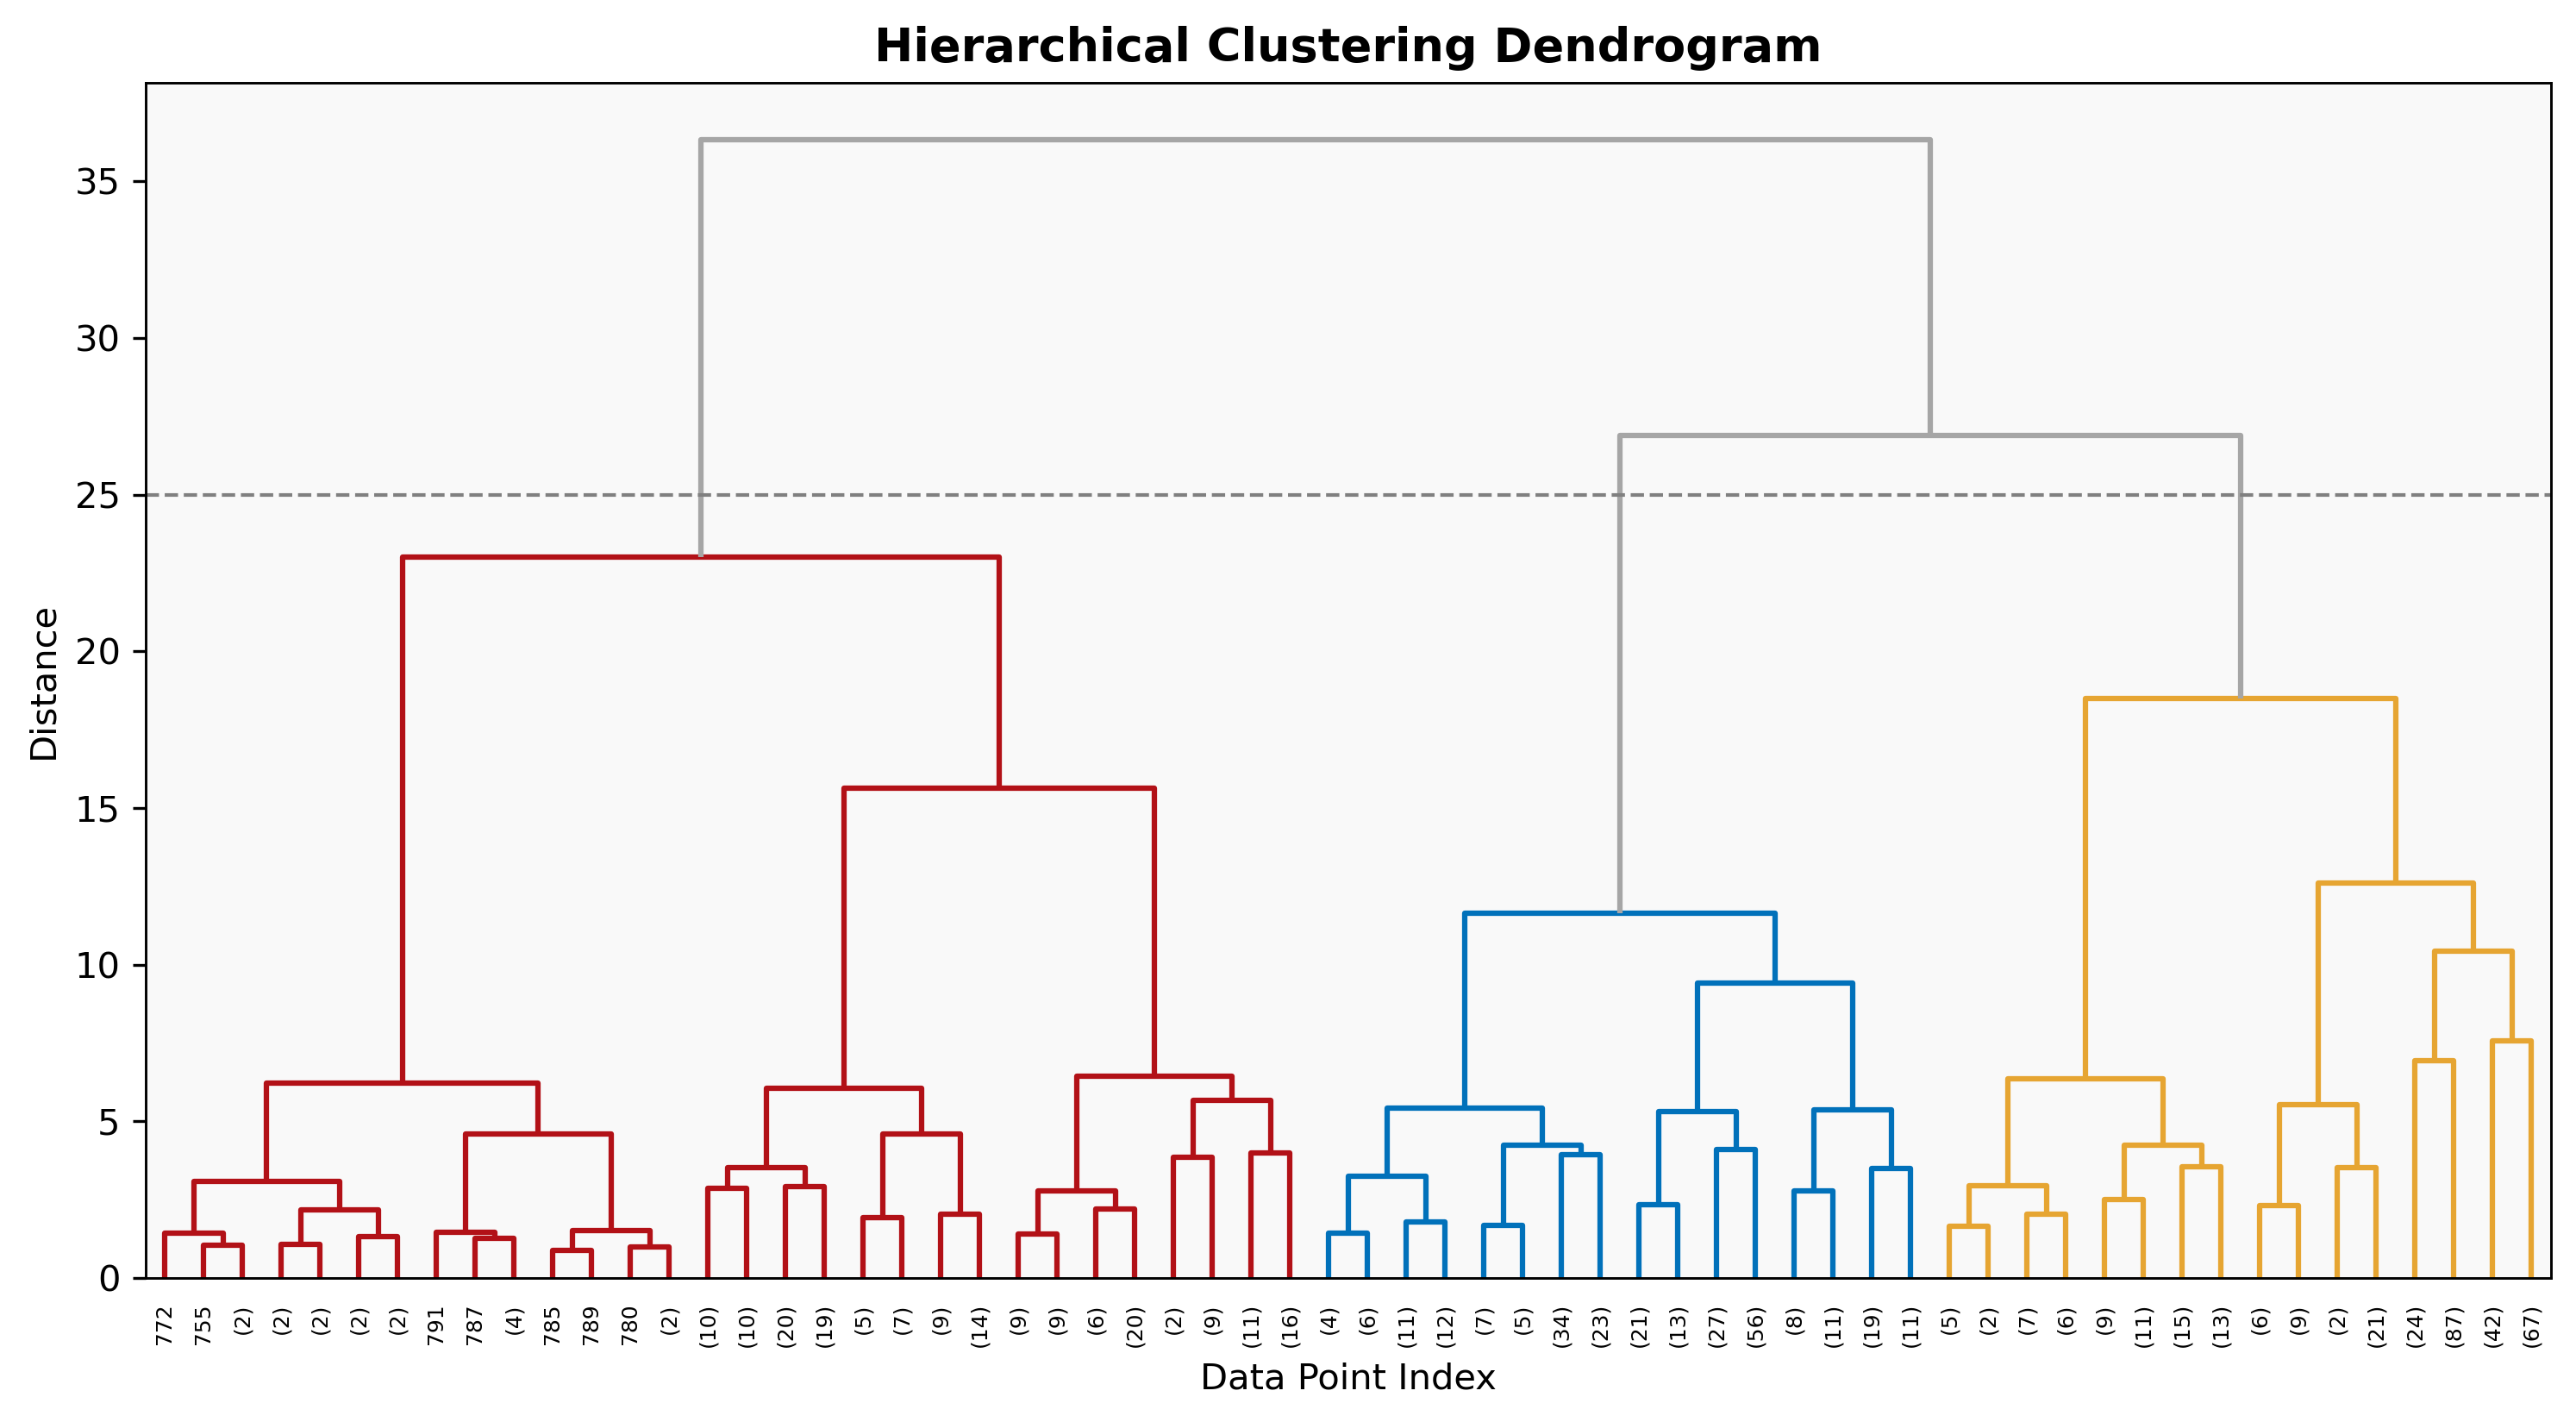

In [61]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

cluster_colors = ['#B21117', '#0171BA', '#E6A532']  
linkage_matrix = linkage(rfm_df_cluster, method='ward')
hierarchy.set_link_color_palette(cluster_colors)

plt.figure(figsize=(12, 6), dpi=300)
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=25, above_threshold_color='#A6A6A6')  
plt.title('Hierarchical Clustering Dendrogram', fontweight = 'bold', fontsize = 13)
plt.xlabel('Data Point Index')
plt.ylabel('Distance')

plt.grid(False)
plt.gca().set_facecolor('#F9F9F9')

for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(0.7)
    
plt.axhline(y=25, c='grey', lw=1, linestyle='--')

plt.show()

> For the Hierarchical clustering, the dendrogram in the above plot help determine the optimal number of clusters. The distance along the y-axis which increases drastically is around 25. This distance can be used as the optimal number of clusters which is 3 as it intersects three (3) vertical lines. This method of choosing the number of clusters is known as the inconsistency method.

In [62]:
from scipy.cluster.hierarchy import fcluster

rfm_df_hierarchy = rfm_df_cluster.copy()
rfm_df_hierarchy.head()

threshold_distance = 25  
cluster_labels_hierarchy = fcluster(linkage_matrix, threshold_distance, criterion='distance')

rfm_df_hierarchy['Cluster'] = cluster_labels_hierarchy
rfm_df_hierarchy['Cluster'] = rfm_df_hierarchy['Cluster'].replace({2: 0, 1: 1, 3: 2})

In [63]:
rfm_df_hierarchy['Cluster'].value_counts()

2    326
0    268
1    199
Name: Cluster, dtype: int64

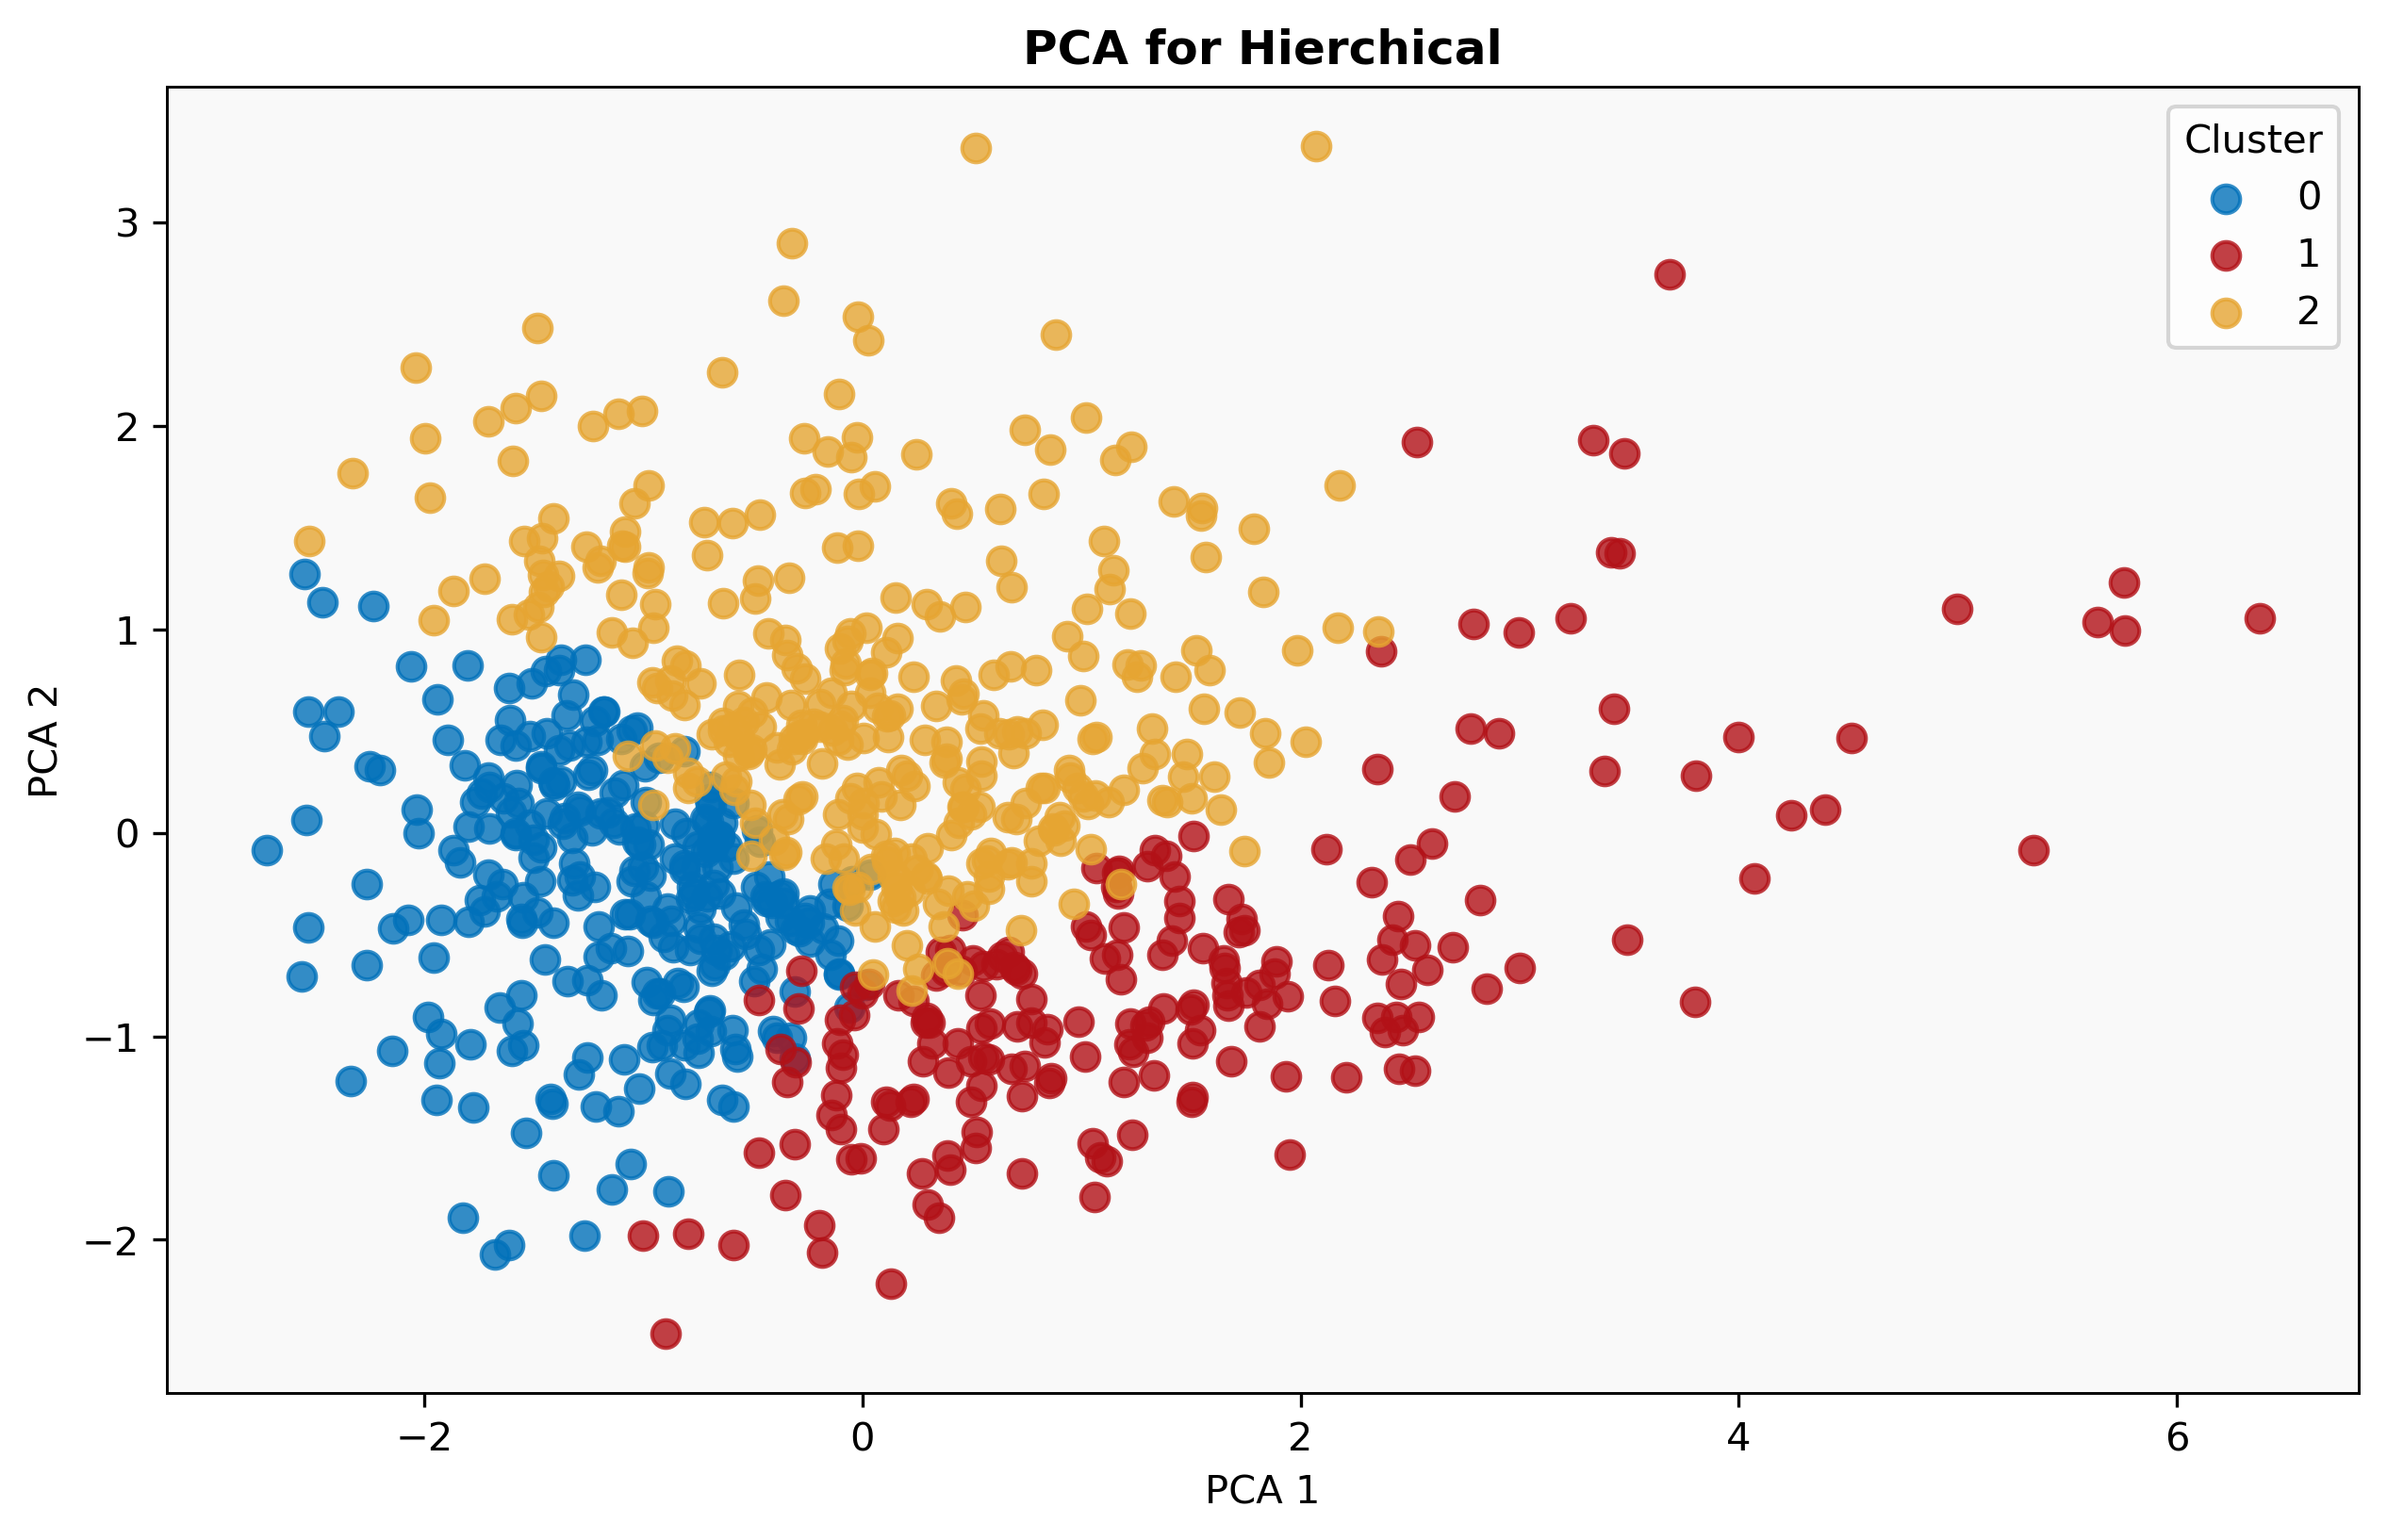

In [64]:
plot_cluster_visualization(rfm_df_hierarchy['Cluster'].values, title = 'PCA for Hierchical')

> The above graph help visually assess how well the Hierarchical Clustering separated the data into 3 distinct clusters space. Similar to the K-Means, PCA was used to provide insights into the distribution and separation of data points among clusters, facilitating cluster analysis and interpretation. The specific information on each cluster can be found in Table 3.

In [65]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

rfm_df_sil_hier = rfm_df_hierarchy.drop(['Cluster'], axis = 1)
silhouette_hierarchical = silhouette_score(rfm_df_sil_hier, rfm_df_hierarchy['Cluster'].values)
db_index_hierarchical = davies_bouldin_score(rfm_df_sil_hier, rfm_df_hierarchy['Cluster'].values)

print('Hierarchical Clustering Evaluation Metrics \n')
print("Silhouette Score:", silhouette_hierarchical)
print("Davies-Bouldin Index:", db_index_hierarchical)

Hierarchical Clustering Evaluation Metrics 

Silhouette Score: 0.22418235099889622
Davies-Bouldin Index: 1.3293196739076498


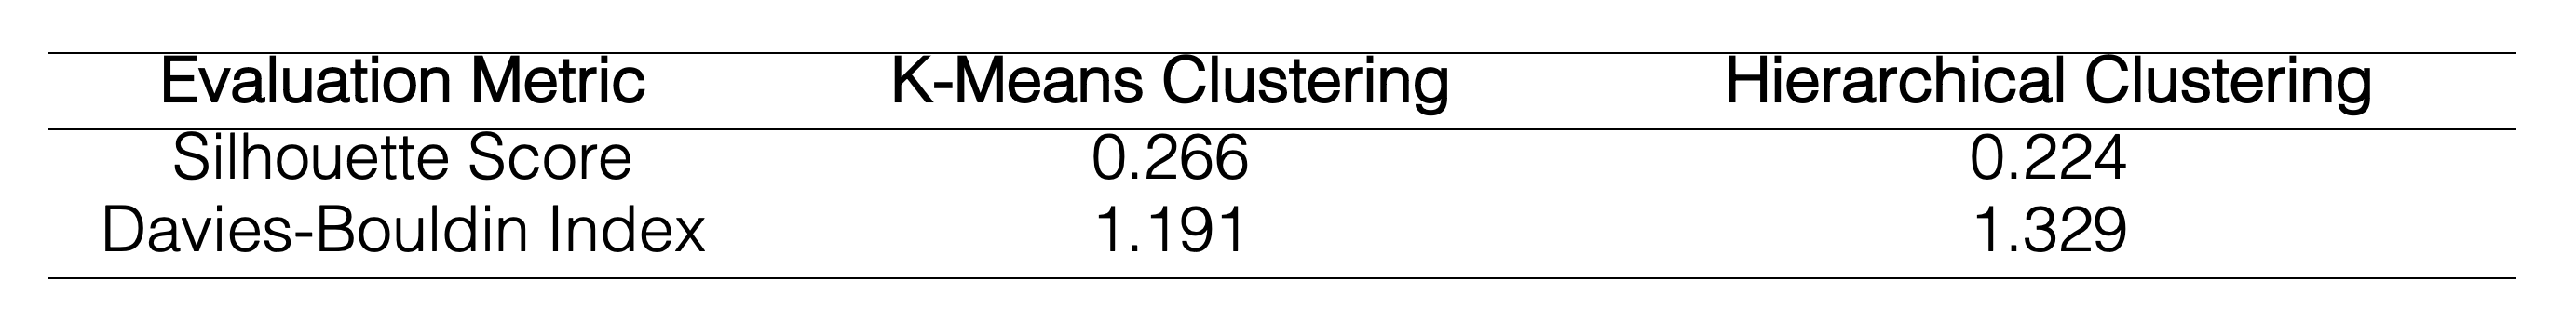

> By comparing the two (2) clustering algorithms, it can be concluded that the K-Means Clustering generated better clustering results considering that it has higher silhouette score of 0.266 compared to the Hierarchical of 0.224. Moreover, based on Davies-Bouldin Index, since lower values indicate better clustering, and K-Means is lower than Hierarchical, it also performed better based on this metric. The cluster results of the K-Means will be characterized and analyzed for suggested actions. 

## Cluster Summary and Analysis

In [66]:
rfm_df_kmeans['Customer ID'] = rfm_df['Customer ID']

rfm_df_kmeans.groupby('Cluster').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean','min', 'max', 'count' ]})

Recency                     Frequency                      Monetary  \
             mean       min       max      mean       min       max      mean   
Cluster                                                                         
0       -0.954993 -2.865881 -0.099782  0.523647 -1.360900  2.196691  0.420134   
1        0.534173 -2.317530  2.172692 -1.236900 -3.542227  0.174291 -1.189696   
2        0.581877 -0.288390  2.078495  0.317667 -1.360900  2.140757  0.387952   

                                   
              min       max count  
Cluster                            
0       -1.694205  1.912786   294  
1       -5.391467  0.965965   201  
2       -1.060537  2.425092   298

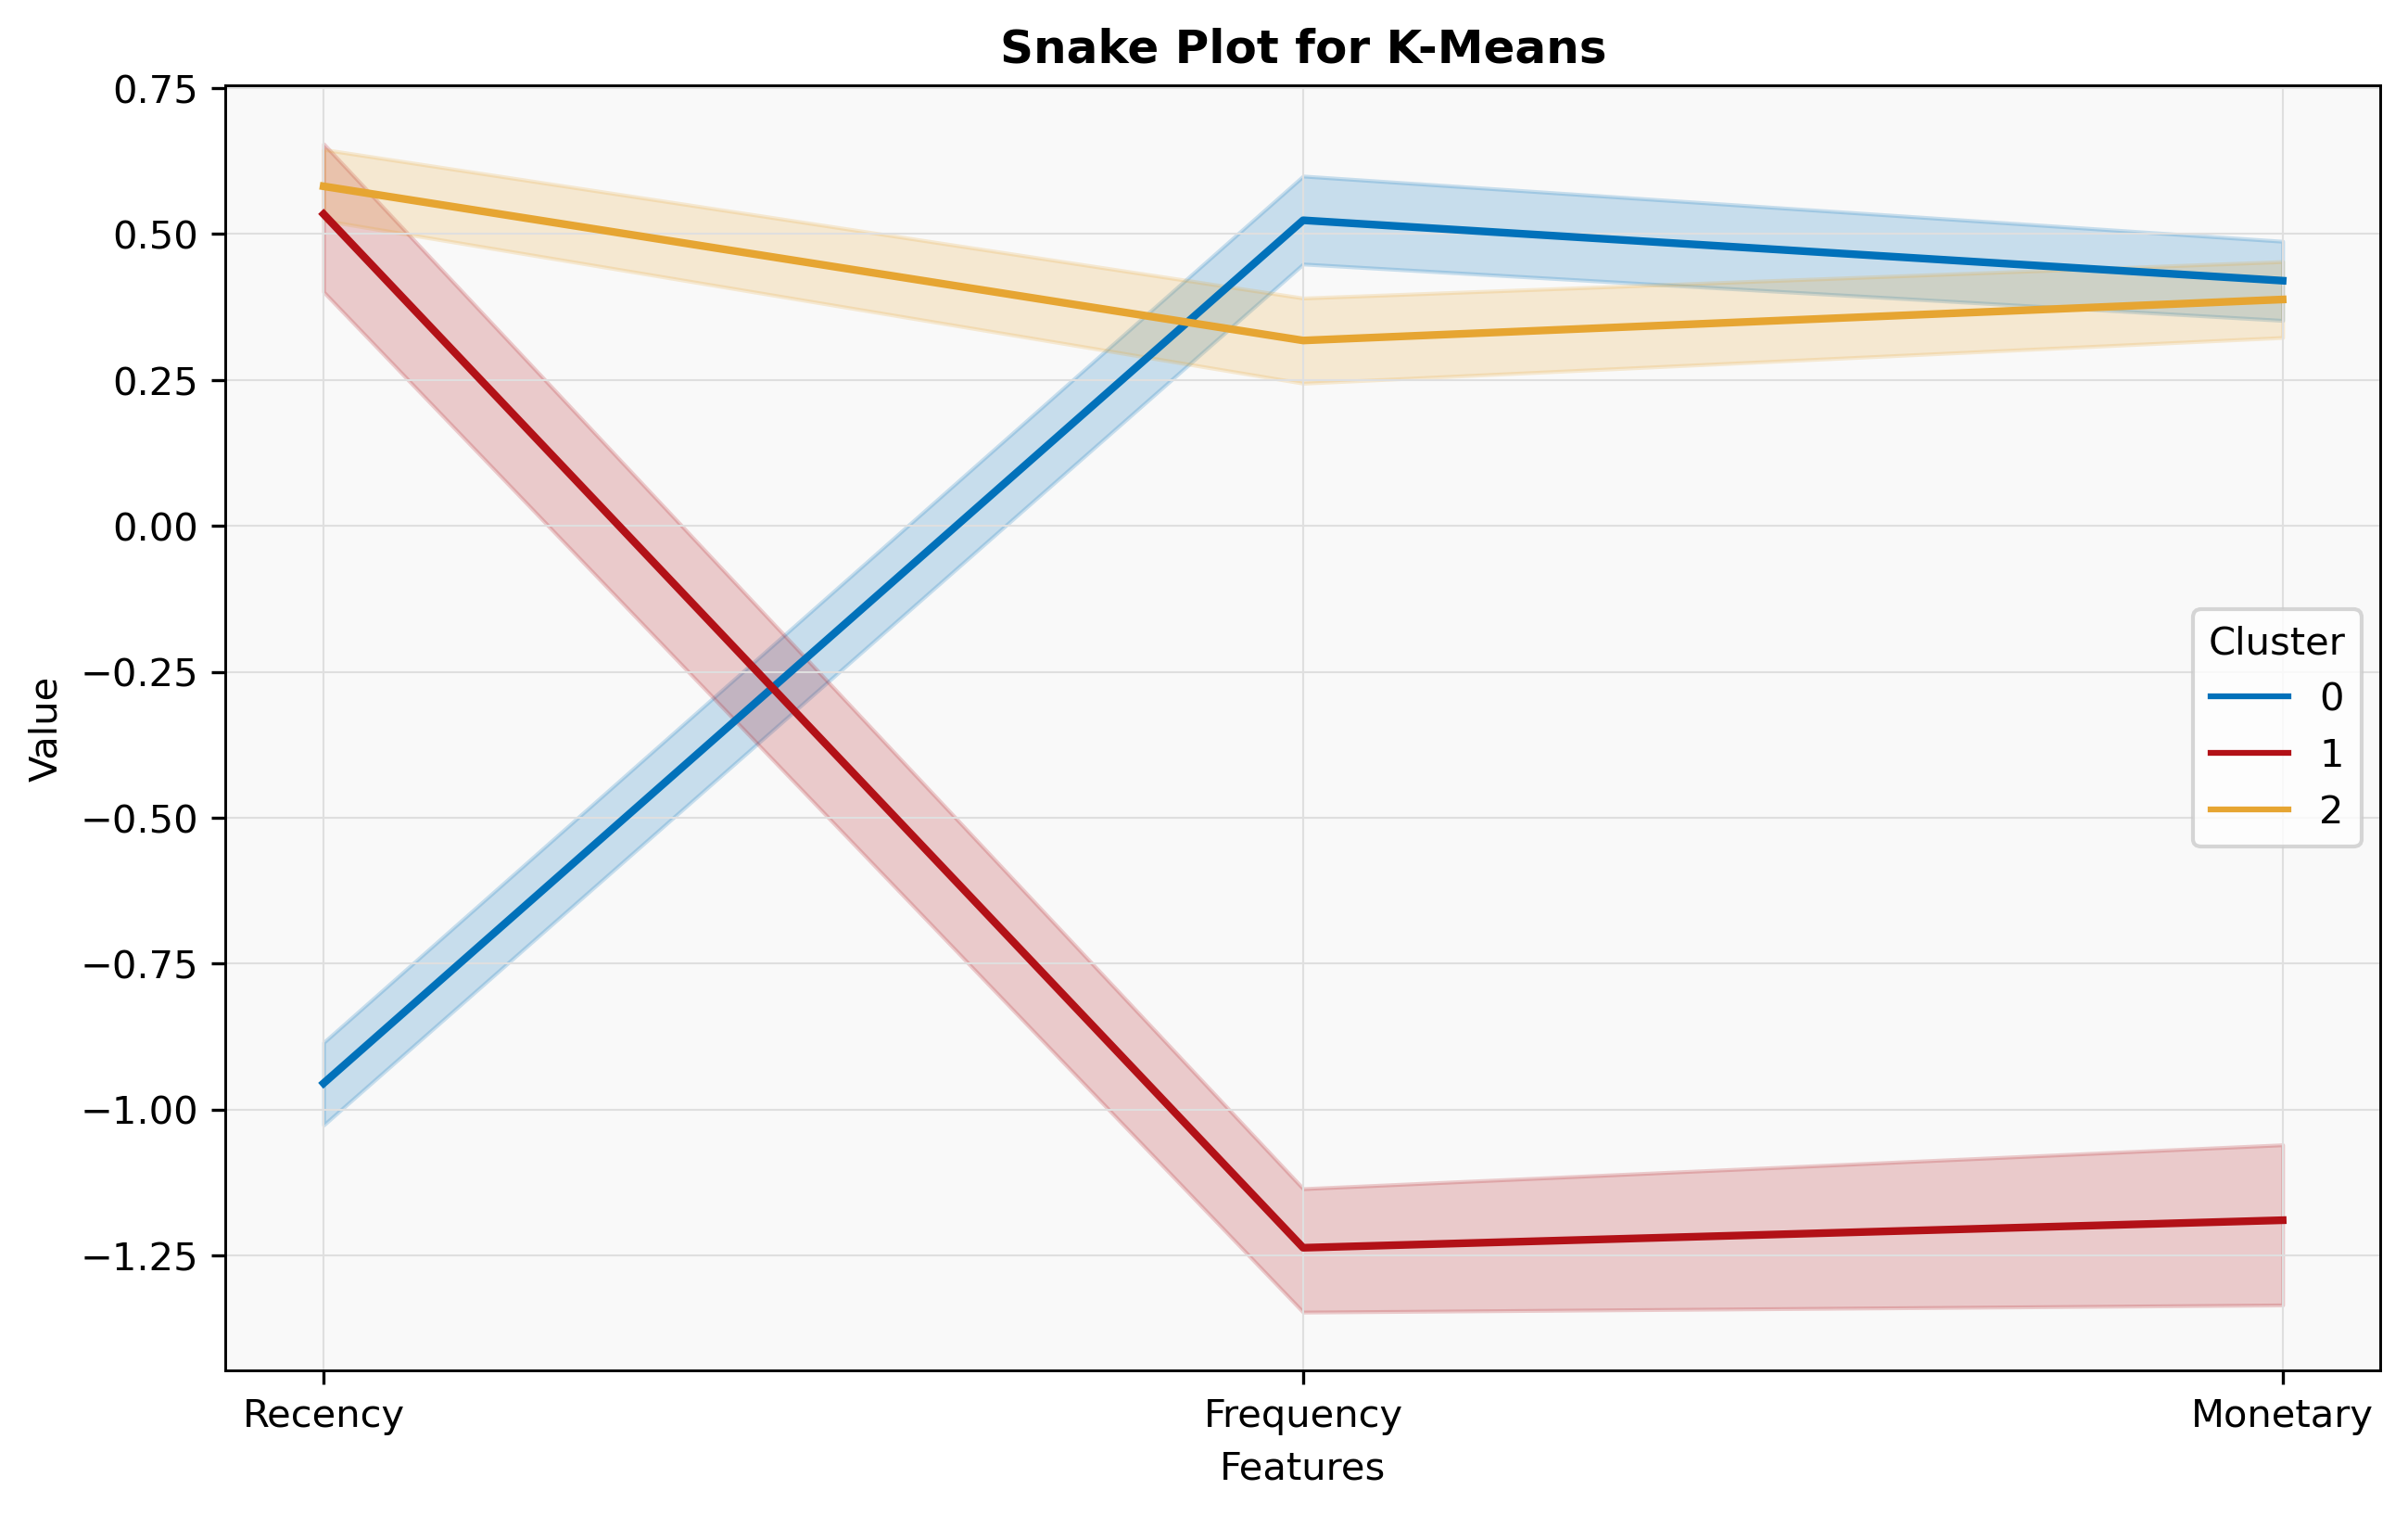

In [67]:
def plot_snake_plot(df, title):
    cluster_colors = {
        0: '#0171BA',
        1: '#B21117',
        2: '#E6A532',
    }
    
    melted_rfm = pd.melt(df.reset_index(),
                         id_vars=['Customer ID', 'Cluster'],
                         value_vars=['Recency', 'Frequency', 'Monetary'],
                         var_name='Features',
                         value_name='Value')

    plt.figure(figsize=(10, 6), dpi=300)
    sns.lineplot(x='Features', y='Value', hue='Cluster', data=melted_rfm, palette=cluster_colors, linewidth=2)

    plt.grid(True, color='#DFDFDF', linewidth=0.5)
    plt.legend(loc='center right', title='Cluster')
    plt.title(title, fontsize=12, fontweight='bold')
    plt.gca().set_facecolor('#F9F9F9')

    for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.7)

    plt.show()

plot_snake_plot(rfm_df_kmeans, title = 'Snake Plot for K-Means')

> The plot above can be used to characterized each of the clusters formed for K-Means.  Cluster 0 represents low recency but high frequency and monetary values. These are loyal customers who make frequent purchases and spend a lot. For Cluster 1, these customers obtained high recency, low frequency, and low monetary value. They may have recently interacted with the business but do not do so frequently and do not spend much. Lastly for Cluster 2, are those who have high recency, frequency, and monetary values, representing customers who are currently active, making frequent purchases, and spending a lot.

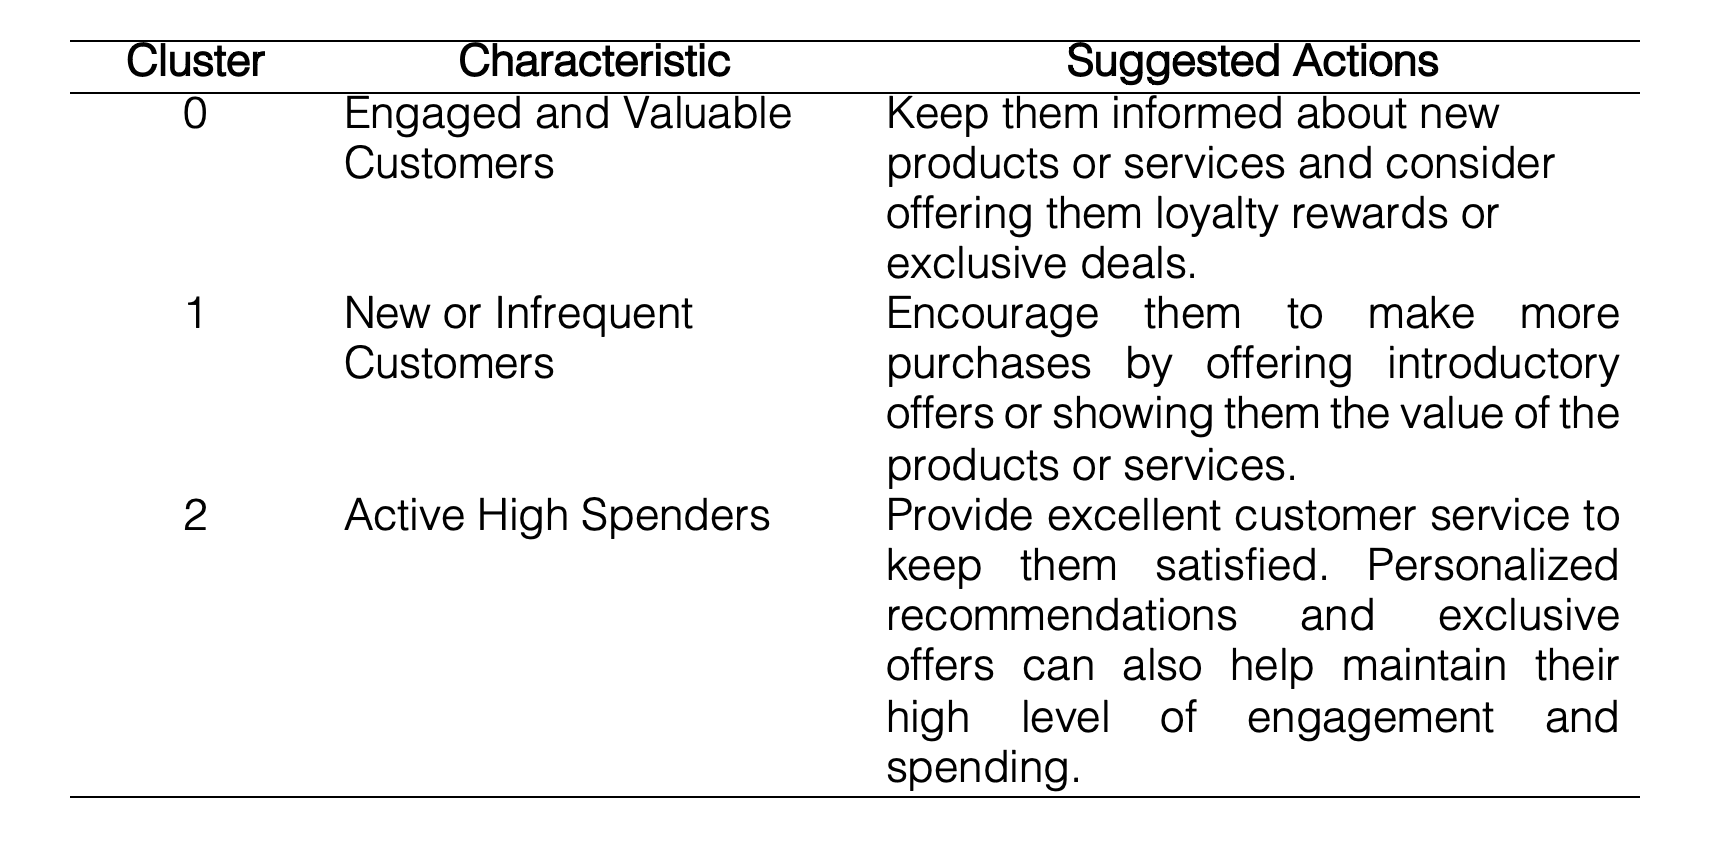

> Moreover, it can be depicted in table above the actions that can be conducted by the business for each cluster to improve customer relationship management. For example, for Cluster 0, the Engaged and Valuable customers, it is recommended to keep them informed about new products or services and consider offering them loyalty rewards or exclusive deals. Through these, the personalized strategies presented in Table 3 could aid in optimizing the business’ efforts to maximize customer satisfaction, retention, and overall profitability.

***

# DISCUSSION

Time series techniques enable retailers to analyze historical sales data to discern patterns, trends, and seasonality, facilitating demand forecasting and inventory management. Methods like ARIMA and SARIMA are commonly utilized for this purpose. This study observed SARIMA outperforming ARIMA in capturing and predicting seasonal patterns and fluctuations inherent in retail sales data, achieving an RMSE value of 12737.96. Its forecasted sales also exhibited a continuation of the upward seasonal trend. By leveraging SARIMA, retailers can not only identify patterns, trends, and seasonality but also enhance demand forecasting and inventory management practices.

Moreover, besides forecasting future sales, customer segmentation is also vital for the retail industry. This study compared K-Means and Hierarchical Clustering for segmenting customers based on RFM values. The findings indicate that K-means generated better clustering results with a Silhouette Score of 0.266 and Davies-Bouldin Index of 1.191. K-Means yielded three distinct clusters, each with unique characteristics and recommended strategies. The retail industry can utilize these customer segments identified through K-means to comprehend the distinct traits and behaviors of different customer groups. By doing so, retailers can create personalized offers and promotions personalized to each cluster, thereby enhancing engagement, and driving sales.

By combining sales forecasting with customer segmentation, retailers can identify opportunities to enhance customer value. For example, if a sales forecast predicts increased spending in a certain product category or area, retailers can target customers who have previously shown interest in similar products and encourage them to make purchases in that area. By promoting relevant products to the right customers at the right time, retailers can increase the likelihood of upselling, cross-selling, and moving customers to higher monetary value segments. Moreover, by utilizing the sales forecasts and customer segmentation insights, retailers can optimize inventory management strategies to minimize stockouts, reduce excess inventory, and improve inventory turnover rates.

Although this study produced good results, there are still areas for improvement. While the study compared ARIMA and SARIMA models for sales forecasting, it did not explore other time series forecasting models or techniques. Including additional models such as LSTM or Prophet could provide a more comprehensive comparison and insights into the most suitable forecasting approach for the dataset. The study assumed that K-means clustering outperformed Hierarchical Clustering based solely on silhouette score and Davies-Bouldin Index. However, it's essential to validate these assumptions by considering the business context, cluster interpretability, and cluster stability through visualization and interpretation of the clusters.

***

# REFERENCES

[1]	Sahoo, R. (2021). Superstore Sales Dataset. Kaggle. https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting?resource=download